In [1]:
#实际利率
actual_dns_ytm_file = "./data/CN_DNS_Real_Yield.csv"
actual_afns_ytm_file = "./data/CN_DNS_Real_Yield.csv"

# 模型利率
model_dns_ytm_file = './data/CN_DNS_Model_Yield.csv'
model_afns_ytm_file = "./data/CN_AFNS_Model_Yield.csv"

#实际因子
actual_dns_file = "./data/dns_factor.csv"
actual_afns_file = "./data/CN_AFNS_Factor.csv"

# 统计预测因子
pred_stats_dns_file = "./data/Pred_DNS_Factor_6M.csv"
pred_stats_afns_file = "./data/Pred_AFNS_Factor_6M.csv"

# 机器学习预测因子
pred_ml_dns_file = "./data/ML_Pred_DNS_Factor_6M.csv"
pred_ml_afns_file = "./data/ML_Pred_AFNS_Factor_6M.csv"


# 预测利率
pred_stats_afns_ytm_file = "./data/CN_AFNS_Pred_Stats_Yield_6M.csv"
pred_ml_afns_ytm_file = "./data/CN_AFNS_Pred_ML_Yield_6M.csv"

In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import warnings


warnings.simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

%config InlineBackend.figure_format = 'retina'

## 1.分析因子的预测情况

In [4]:
# 真实DNS因子
actual_dns_df = pd.read_csv(actual_dns_file)
actual_dns_df['Date'] = pd.to_datetime(actual_dns_df['Date'] )

# 真实AFNS因子
actual_afns_df = pd.read_csv(actual_afns_file)
actual_afns_df['Date'] = pd.to_datetime(actual_afns_df['Date'])

# 预测DNS因子-统计方法
pred_stats_dns_df = pd.read_csv(pred_stats_dns_file)
pred_stats_dns_df['Date'] = pd.to_datetime(pred_stats_dns_df['Date'])

# 预测AFNS因子-统计方法
pred_stats_afns_df = pd.read_csv(pred_stats_afns_file)
pred_stats_afns_df['Date'] = pd.to_datetime(pred_stats_afns_df['Date'])

# 预测DNS因子-机器学习
pred_ml_dns_df = pd.read_csv(pred_ml_dns_file)
pred_ml_dns_df['Date'] = pd.to_datetime(pred_ml_dns_df['Date'])

# 预测AFNS因子-机器学习
pred_ml_afns_df = pd.read_csv(pred_ml_afns_file)
pred_ml_afns_df['Date'] = pd.to_datetime(pred_ml_afns_df['Date'])


print(actual_dns_df.shape, actual_afns_df.shape)
print(pred_stats_dns_df.shape, pred_stats_afns_df.shape)
print(pred_ml_dns_df.shape, pred_ml_afns_df.shape)

(2744, 5) (2744, 4)
(524, 4) (524, 4)
(524, 5) (524, 4)


In [5]:
actual_dns_df['Tau'].unique()[0]

0.3857110541000885

In [6]:
# 对其数据
datetime_df = pred_stats_dns_df[['Date']]
new_actual_dns_df = datetime_df.merge(actual_dns_df, on ='Date')
new_actual_dns_df

new_actual_afns_df = datetime_df.merge(actual_afns_df, on ='Date')
new_actual_afns_df

,Date,Level,Slope,Curvature
0,2020-11-27,7.667266,-4.944337,-2.720878
1,2020-11-30,7.674452,-5.033804,-2.718138
2,2020-12-01,7.677864,-5.036227,-2.720984
3,2020-12-02,7.679479,-4.995420,-2.732786
4,2020-12-03,7.682141,-4.979254,-2.747765
...,...,...,...,...
519,2022-12-26,6.438232,-4.513261,-0.991240
520,2022-12-27,6.437766,-4.473574,-1.001645
521,2022-12-28,6.437606,-4.462218,-1.000916
522,2022-12-29,6.438723,-4.498705,-0.991197


In [7]:
# 因子预测分析： 计算MAE(平均绝对误差), MAPE(平均绝对百分比误差)， RMSE(均方根误差)的值
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [8]:
# 计算MAPE:平均绝对百分比误差
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [9]:
# 均方根误差
import math
def rmse(y_true, y_pred):
    MSE = np.square(np.subtract(y_true,y_pred)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE

In [10]:
# DNS  - 统计学

def cal_indicator(y_true, y_pred):
    mae_value = mae(y_true, y_pred)
    mape_value = mape(y_true, y_pred)
    rmse_value = rmse(y_true, y_pred)
    return [mae_value, mape_value, rmse_value]



### 1.1 统计模型分析

statistical model

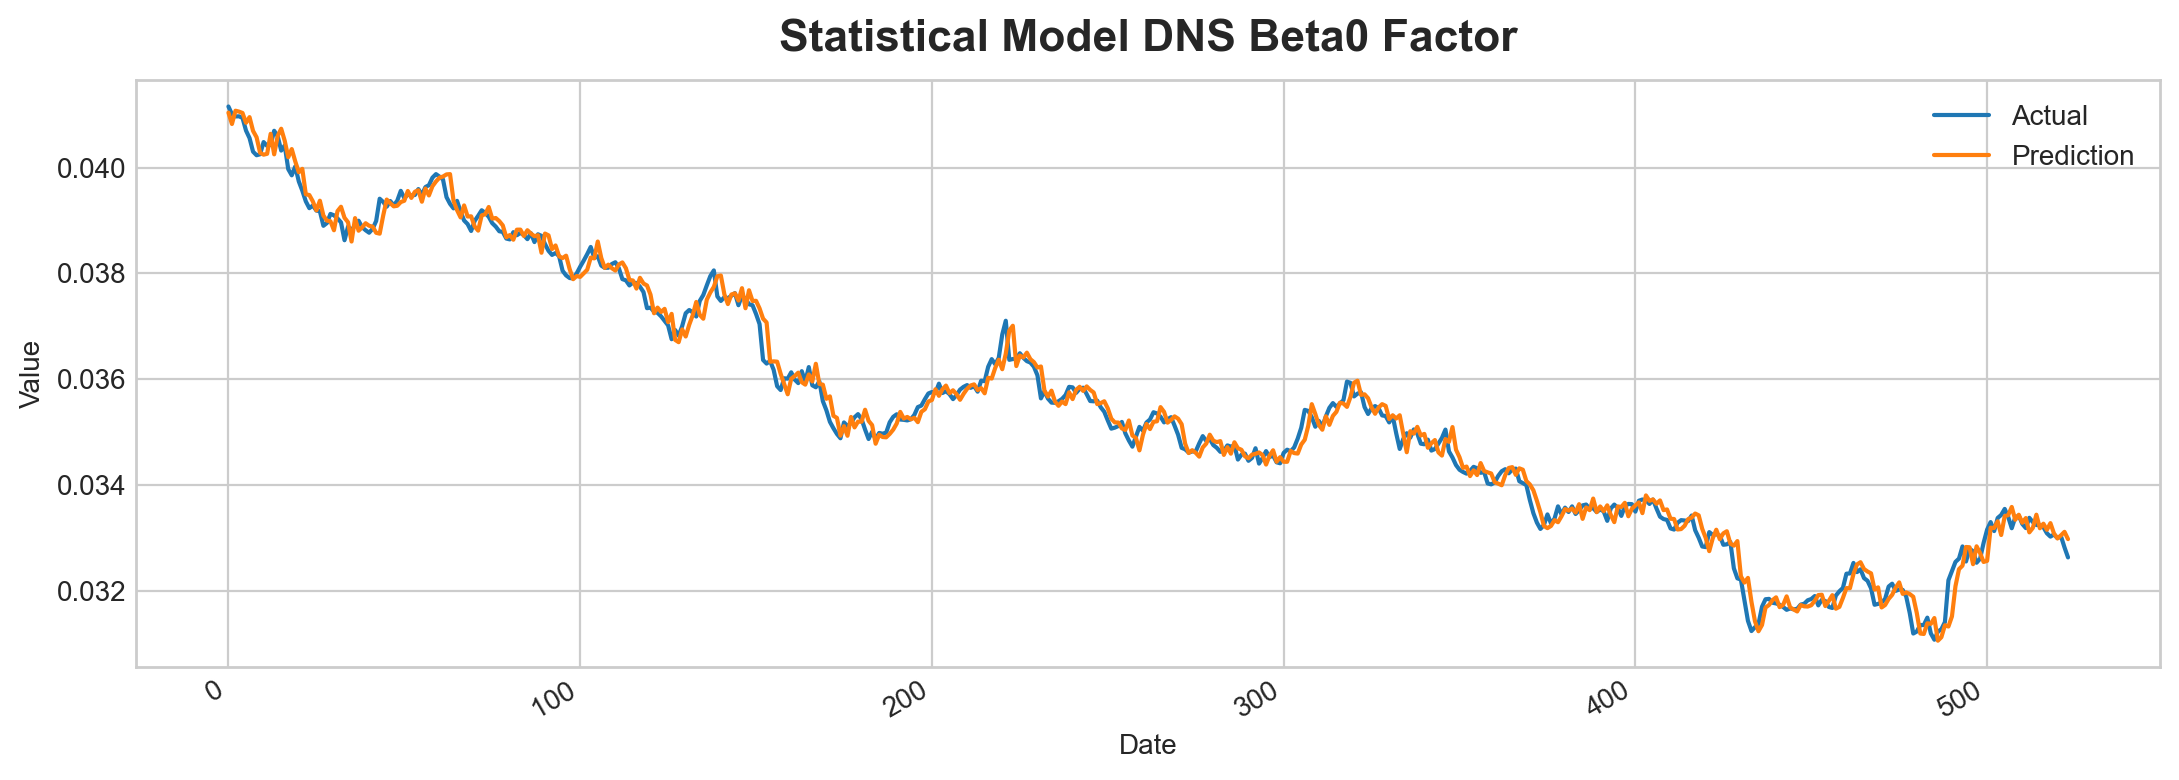

In [11]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta0'], label="Actual")
ax.plot(pred_stats_dns_df['Beta0'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model DNS Beta0 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [12]:
dns_stats_beta0_indicator_list = cal_indicator(new_actual_dns_df['Beta0'], pred_stats_dns_df['Beta0'])
dns_stats_beta0_indicator_list

[0.00017583880587913867, 0.4987799477431802, 0.00023056594804798822]

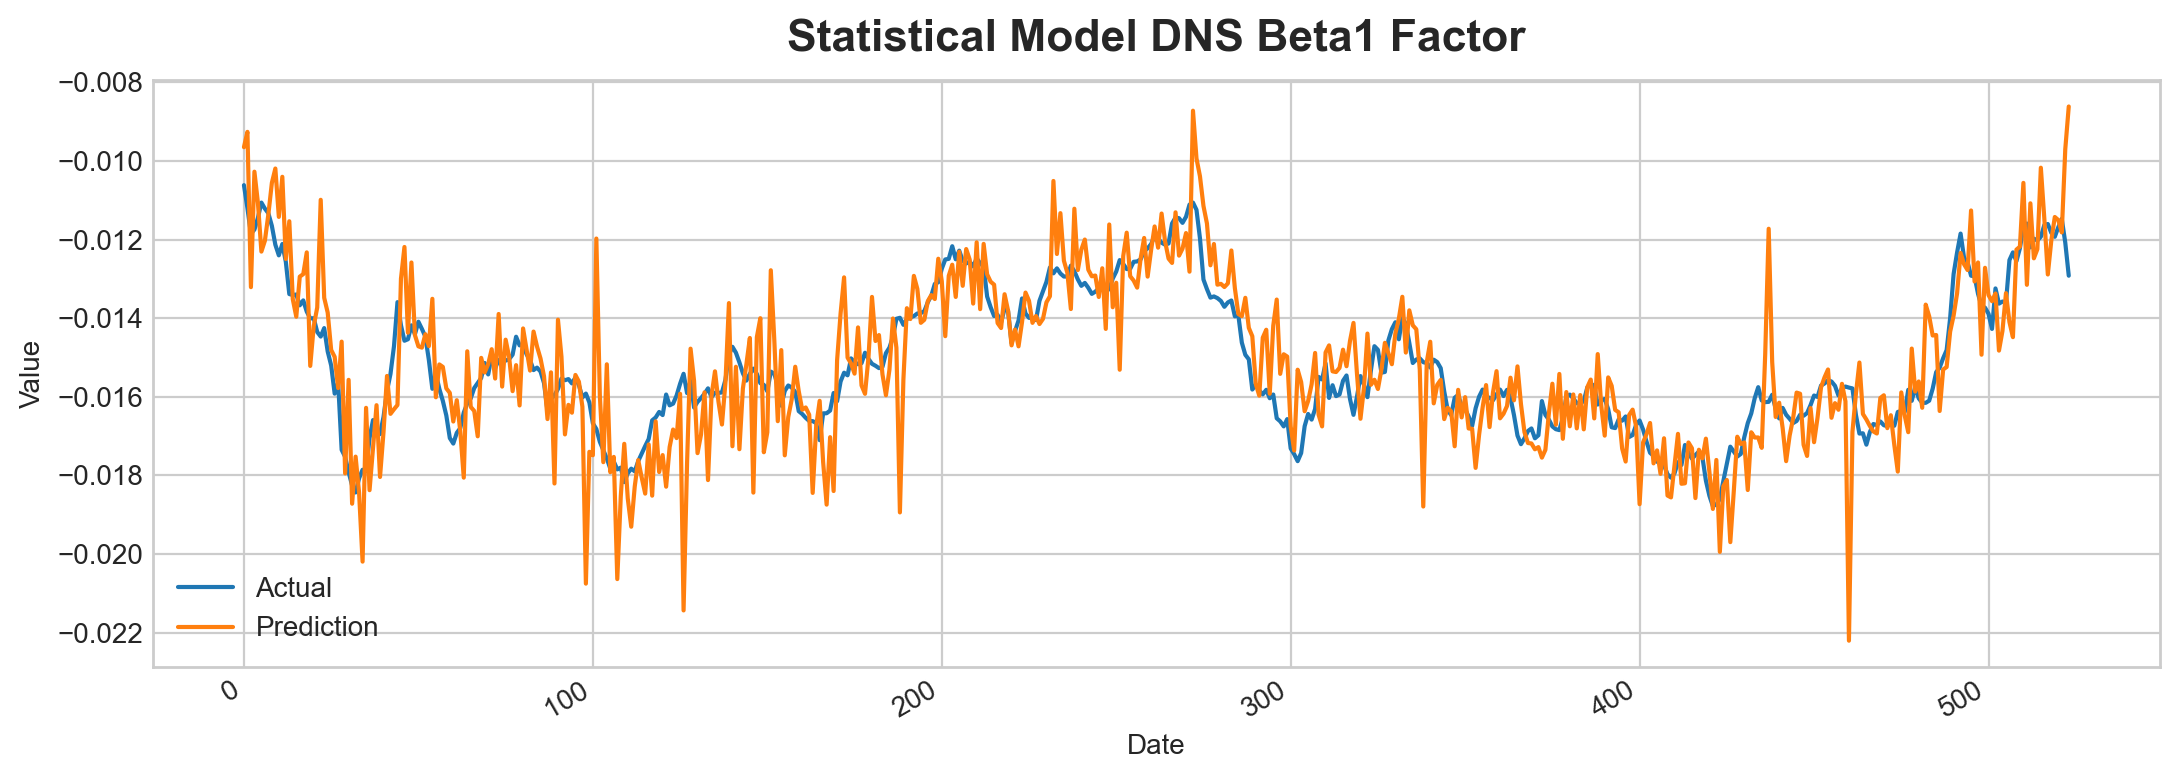

In [13]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta1'], label="Actual")
ax.plot(pred_stats_dns_df['Beta1'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model DNS Beta1 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [14]:
dns_stats_beta1_indicator_list = cal_indicator(new_actual_dns_df['Beta1'], pred_stats_dns_df['Beta1'])
dns_stats_beta1_indicator_list

[0.0008481724618096586, 5.677173192452494, 0.0011835528357989848]

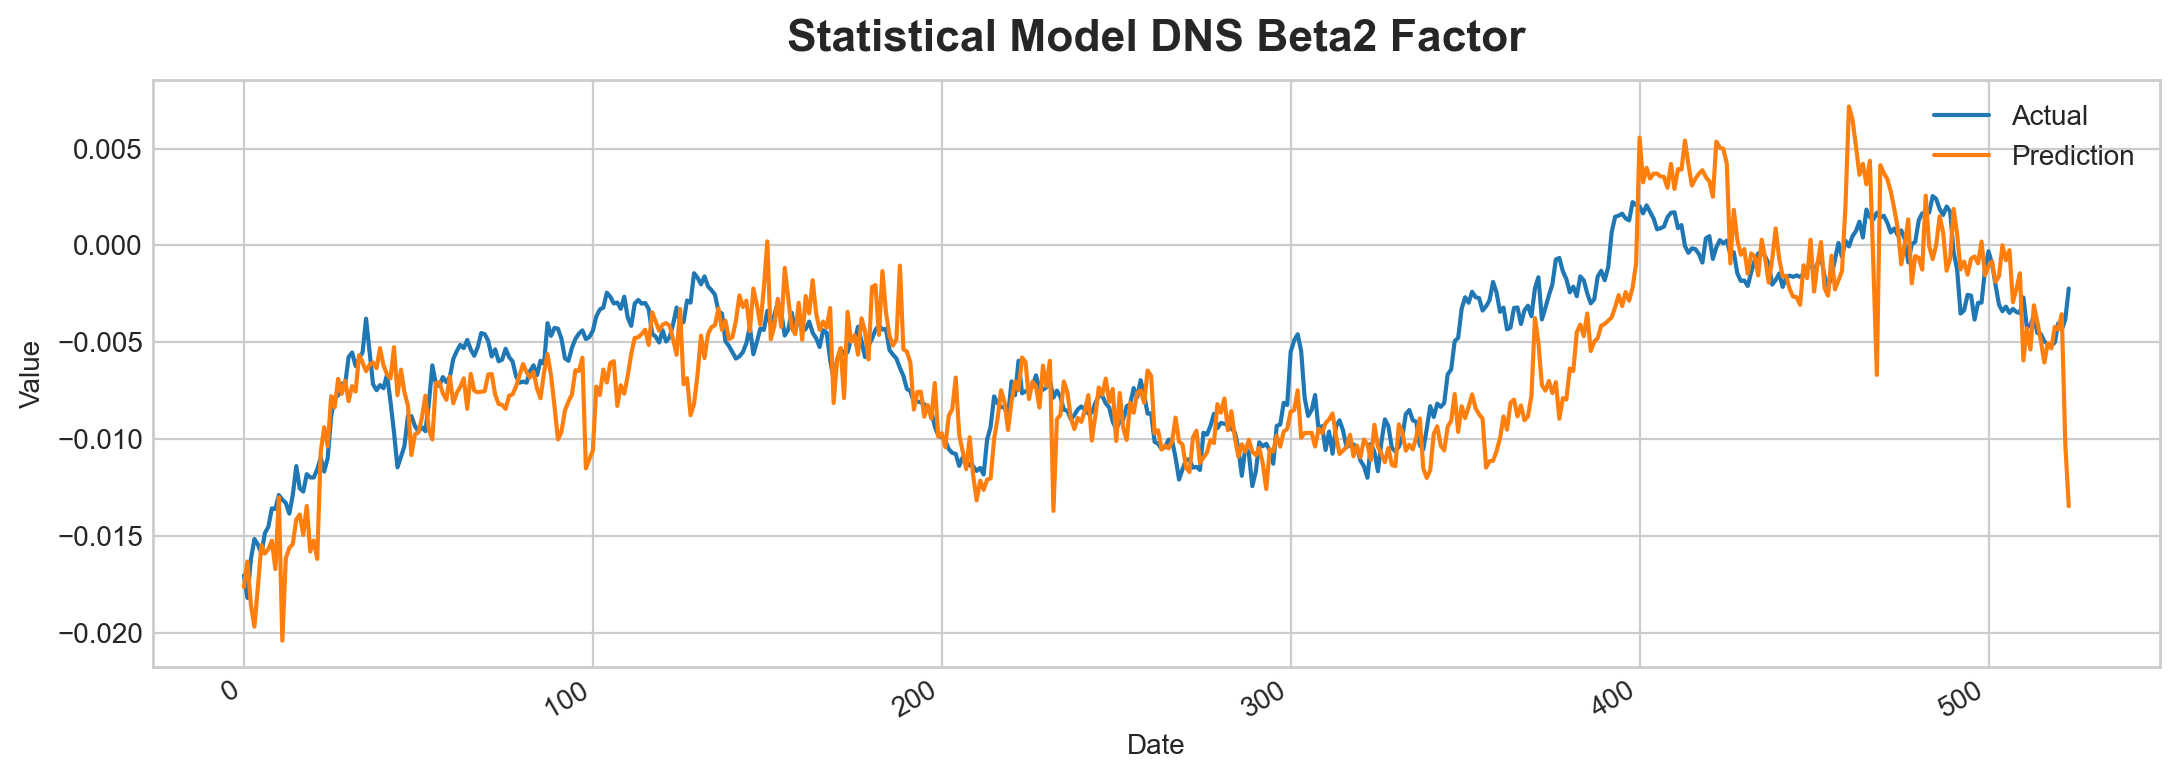

In [15]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta2'], label="Actual")
ax.plot(pred_stats_dns_df['Beta2'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model DNS Beta2 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [16]:
dns_stats_beta2_indicator_list = cal_indicator(new_actual_dns_df['Beta2'], pred_stats_dns_df['Beta2'])
dns_stats_beta2_indicator_list

[0.002006350054569932, 186.82382580943792, 0.002677301565496257]

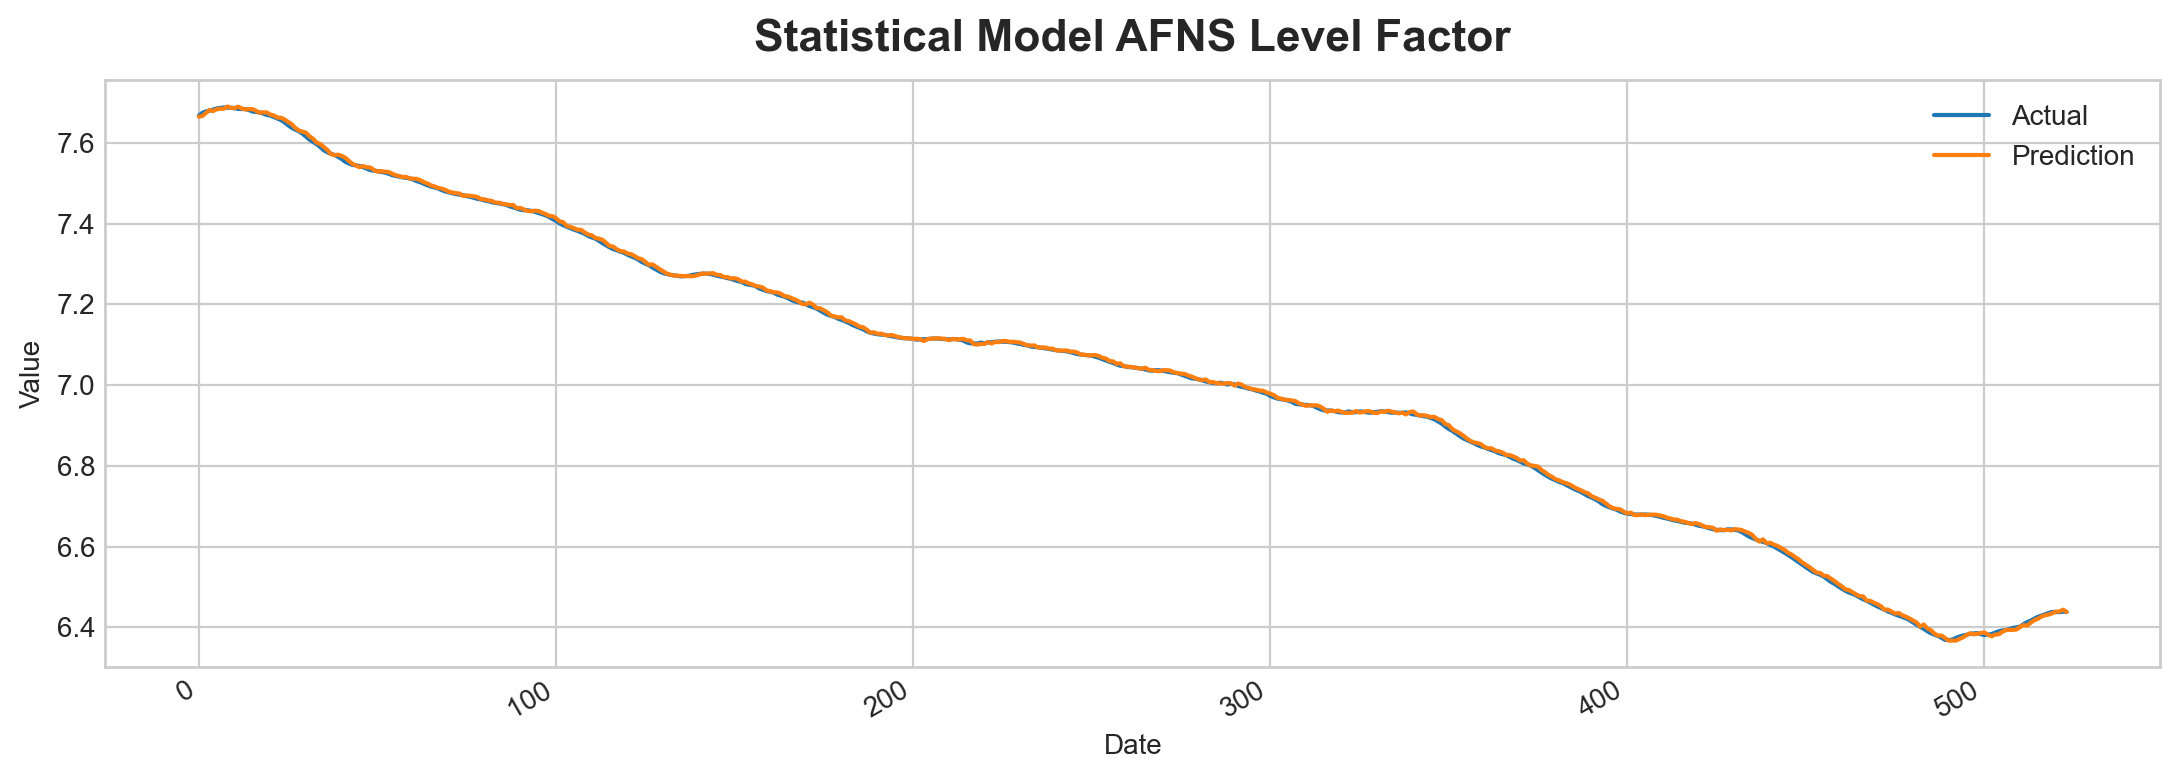

In [17]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Level'], label="Actual")
ax.plot(pred_stats_afns_df['Level'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model AFNS Level Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [18]:
afns_stats_level_indicator_list = cal_indicator(new_actual_afns_df['Level'], pred_stats_afns_df['Level'])
afns_stats_level_indicator_list

[0.0033020127305247254, 0.04729721376606112, 0.004005527173474548]

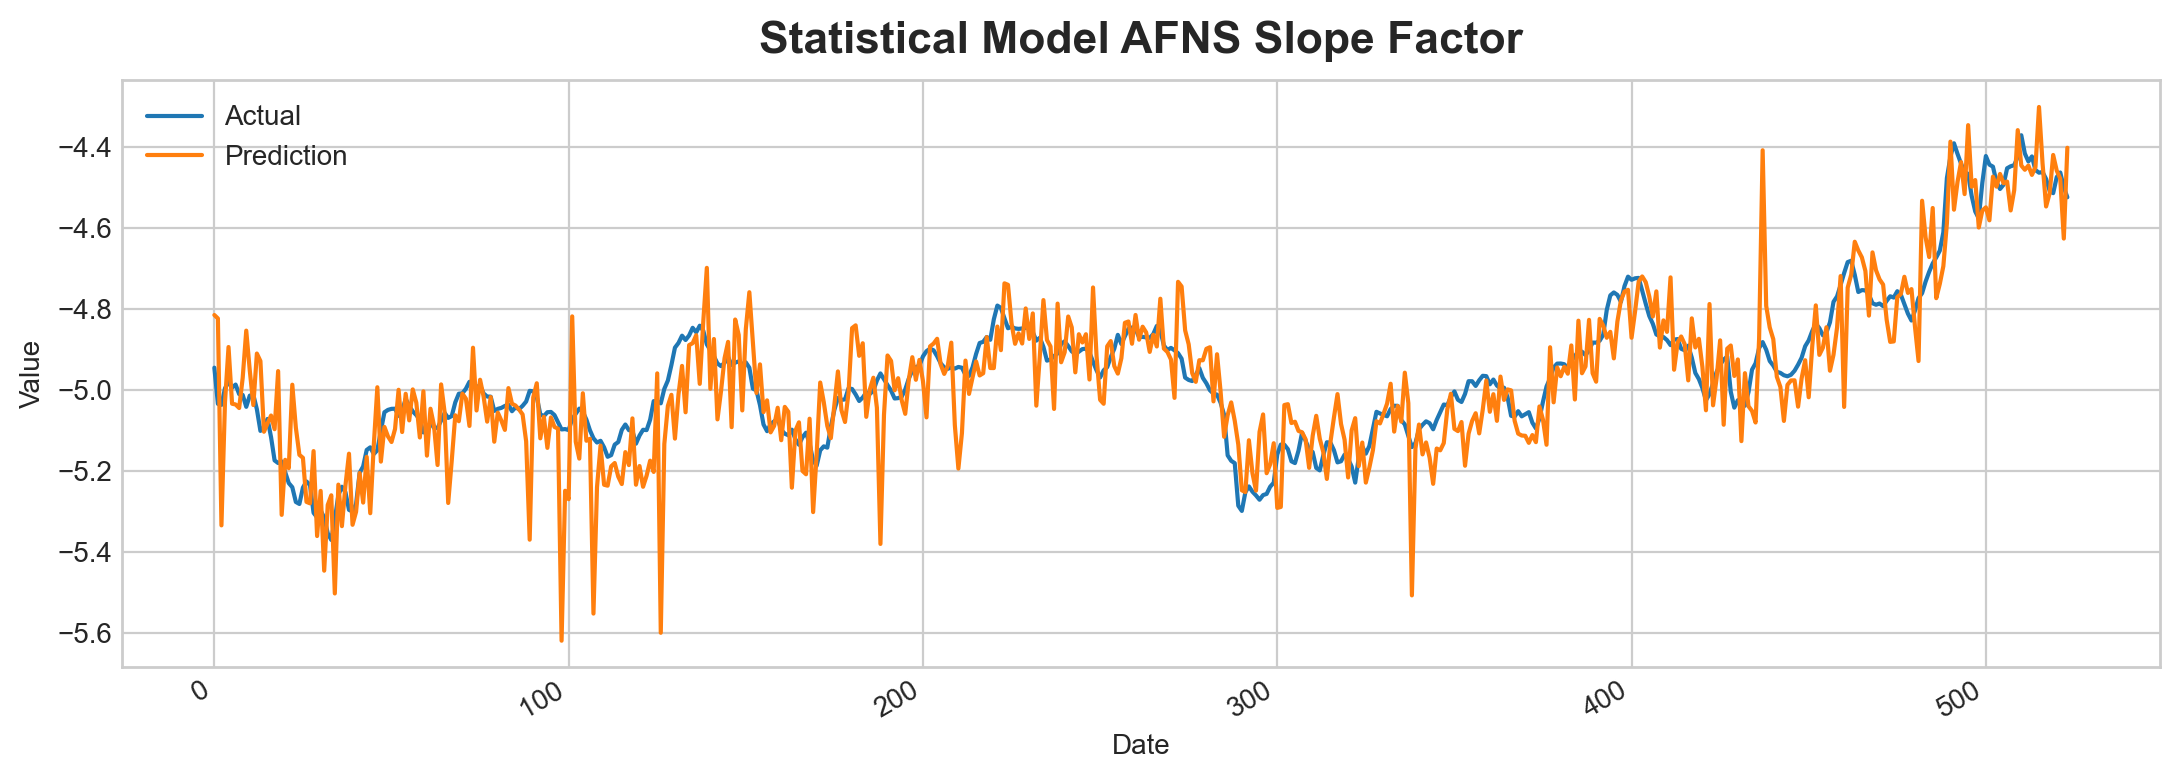

In [19]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Slope'], label="Actual")
ax.plot(pred_stats_afns_df['Slope'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model AFNS Slope Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [20]:
afns_stats_slope_indicator_list = cal_indicator(new_actual_afns_df['Slope'], pred_stats_afns_df['Slope'])
afns_stats_slope_indicator_list

[0.07429294922583514, 1.4957320461679733, 0.10159337466071011]

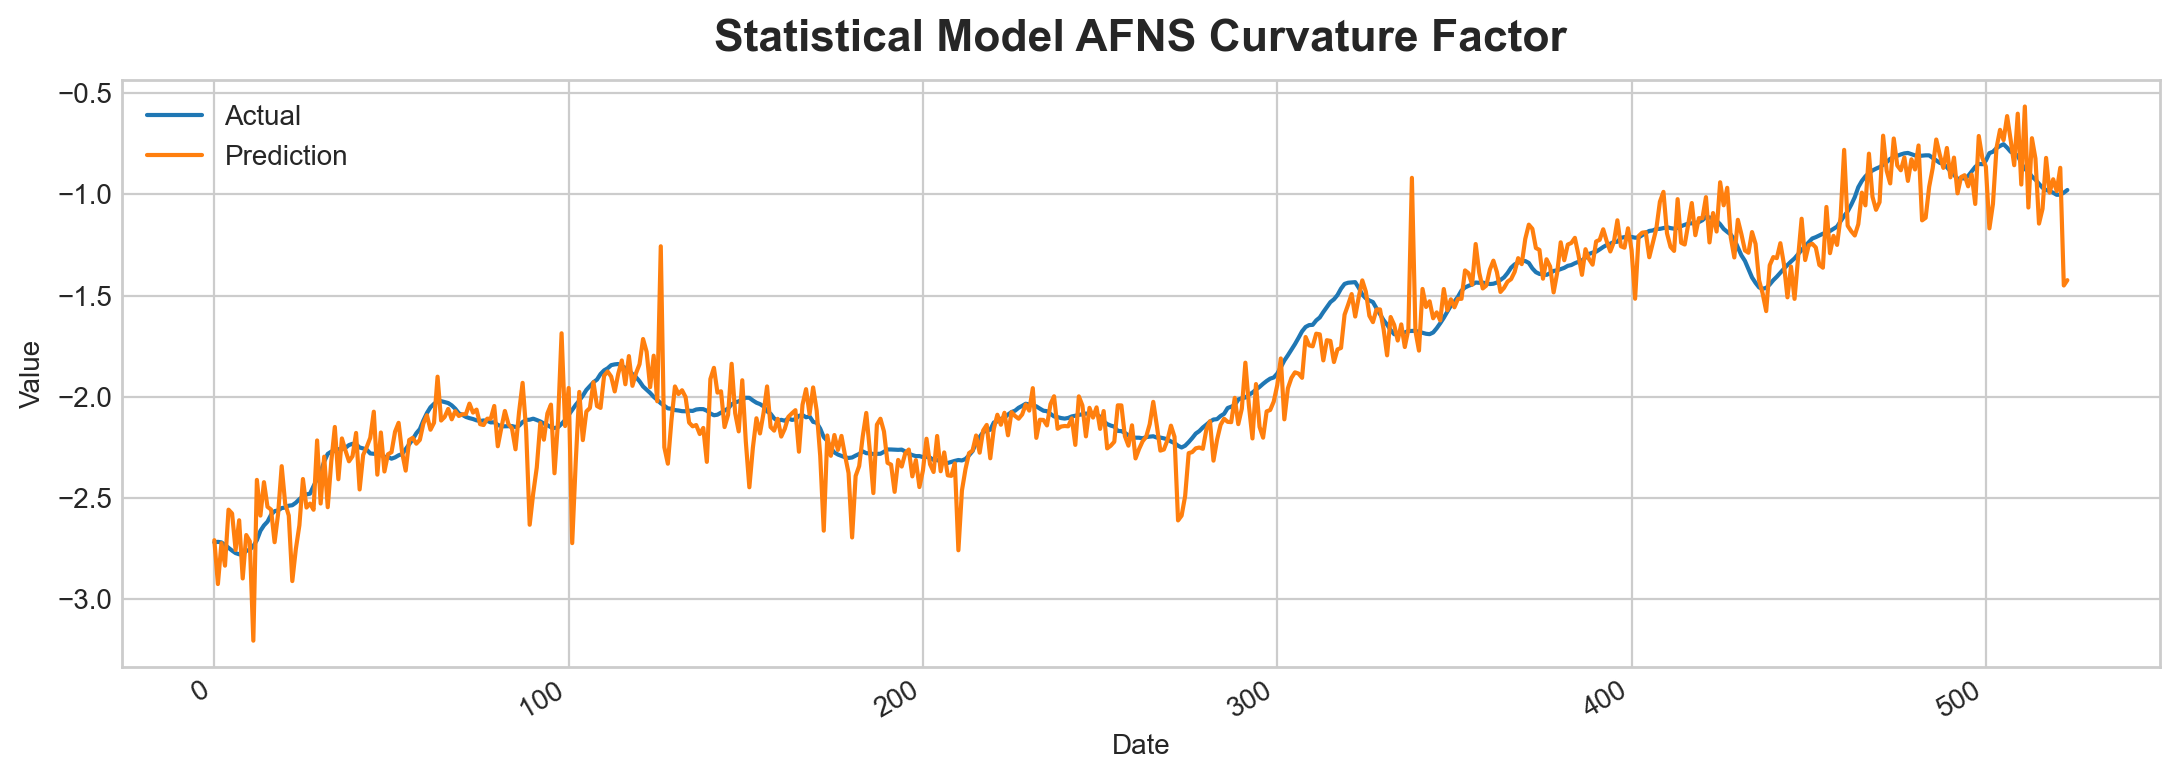

In [21]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Curvature'], label="Actual")
ax.plot(pred_stats_afns_df['Curvature'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model AFNS Curvature Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [22]:
afns_stats_curvature_indicator_list = cal_indicator(new_actual_afns_df['Curvature'], pred_stats_afns_df['Curvature'])
afns_stats_curvature_indicator_list

[0.10143393105861119, 6.40703382586162, 0.1423072343141251]

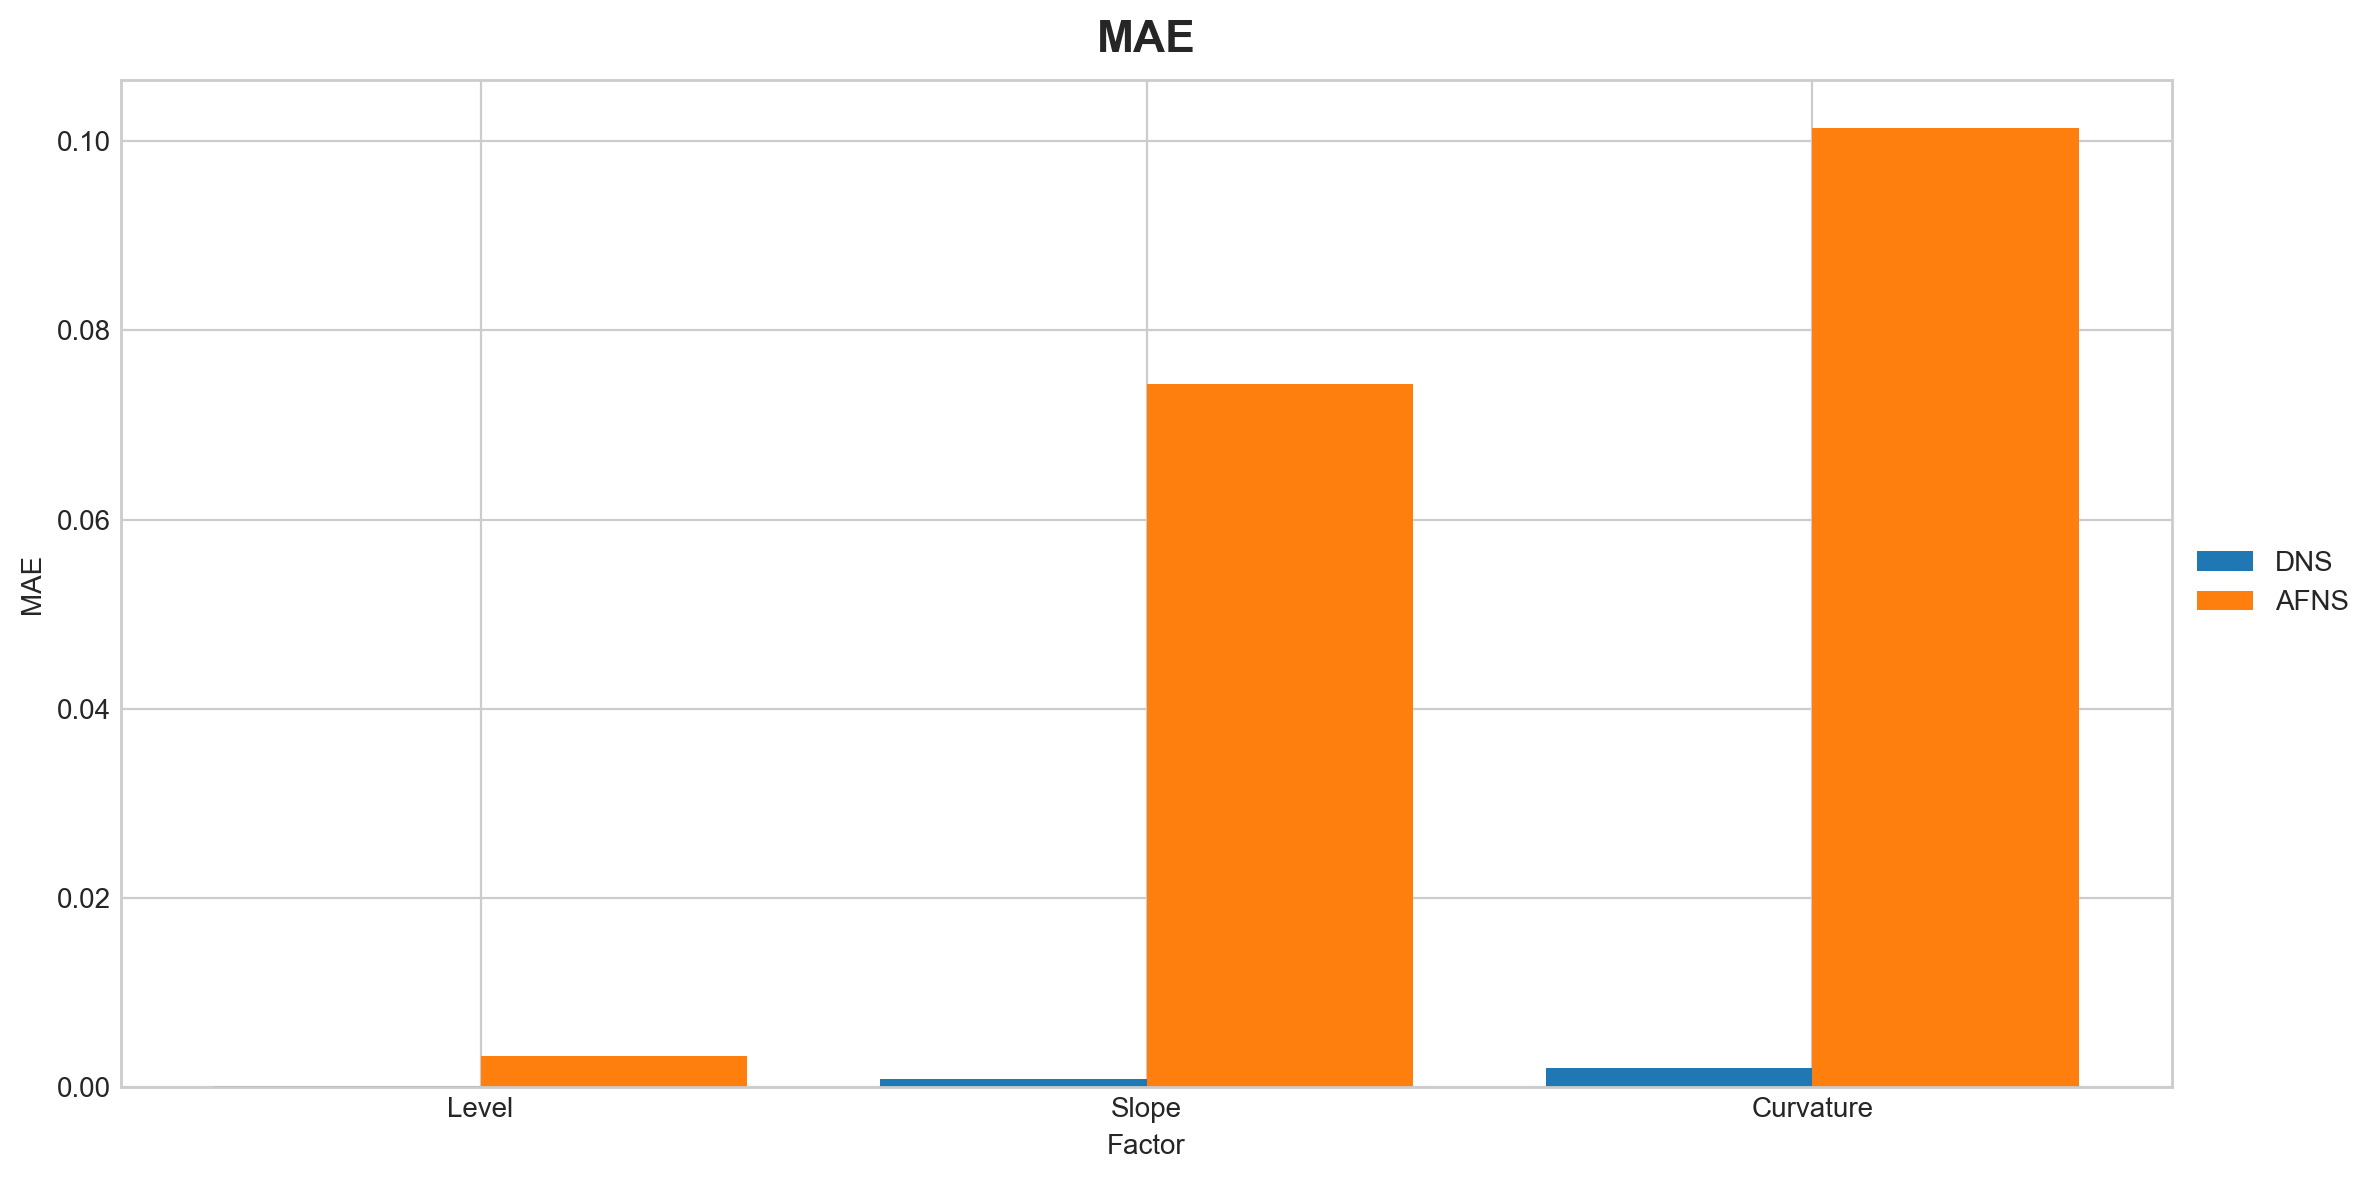

In [23]:
# MAE 可视化
# 

mae_dns_stats = [dns_stats_beta0_indicator_list[0], dns_stats_beta1_indicator_list[0], dns_stats_beta2_indicator_list[0]]
mae_afns_stats = [afns_stats_level_indicator_list[0], afns_stats_slope_indicator_list[0], afns_stats_curvature_indicator_list[0]]

def plot_indicator(dns_stats, mae_afns_stats, label_nums, label_name="MAE"):
    fig, ax = plt.subplots(figsize=(12, 6))

    label_list = ["Level", "Slope", "Curvature"]

    totalWidth=0.8 # 一组柱状体的宽度
    #labelNums=2 # 一组有两种类别
    barWidth=totalWidth/label_nums # 单个柱体的宽度
    seriesNums=len(label_list) # 一共有多少组

    ax.bar([x for x in range(seriesNums)], dns_stats, label="DNS", width=barWidth)
    ax.bar([x+1*barWidth for x in range(seriesNums)], mae_afns_stats, label="AFNS", width=barWidth)
    #ax.bar([x+2*barWidth for x in range(seriesNums)], anfs_error_df['MAPE'], label="AFNS", width=barWidth)

    plt.xticks([x+barWidth/2*(label_nums-1) for x in range(3)], label_list)
    plt.xlabel("Factor")
    plt.ylabel(label_name)
    plt.title(label_name)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
plot_indicator(mae_dns_stats, mae_afns_stats, 2)

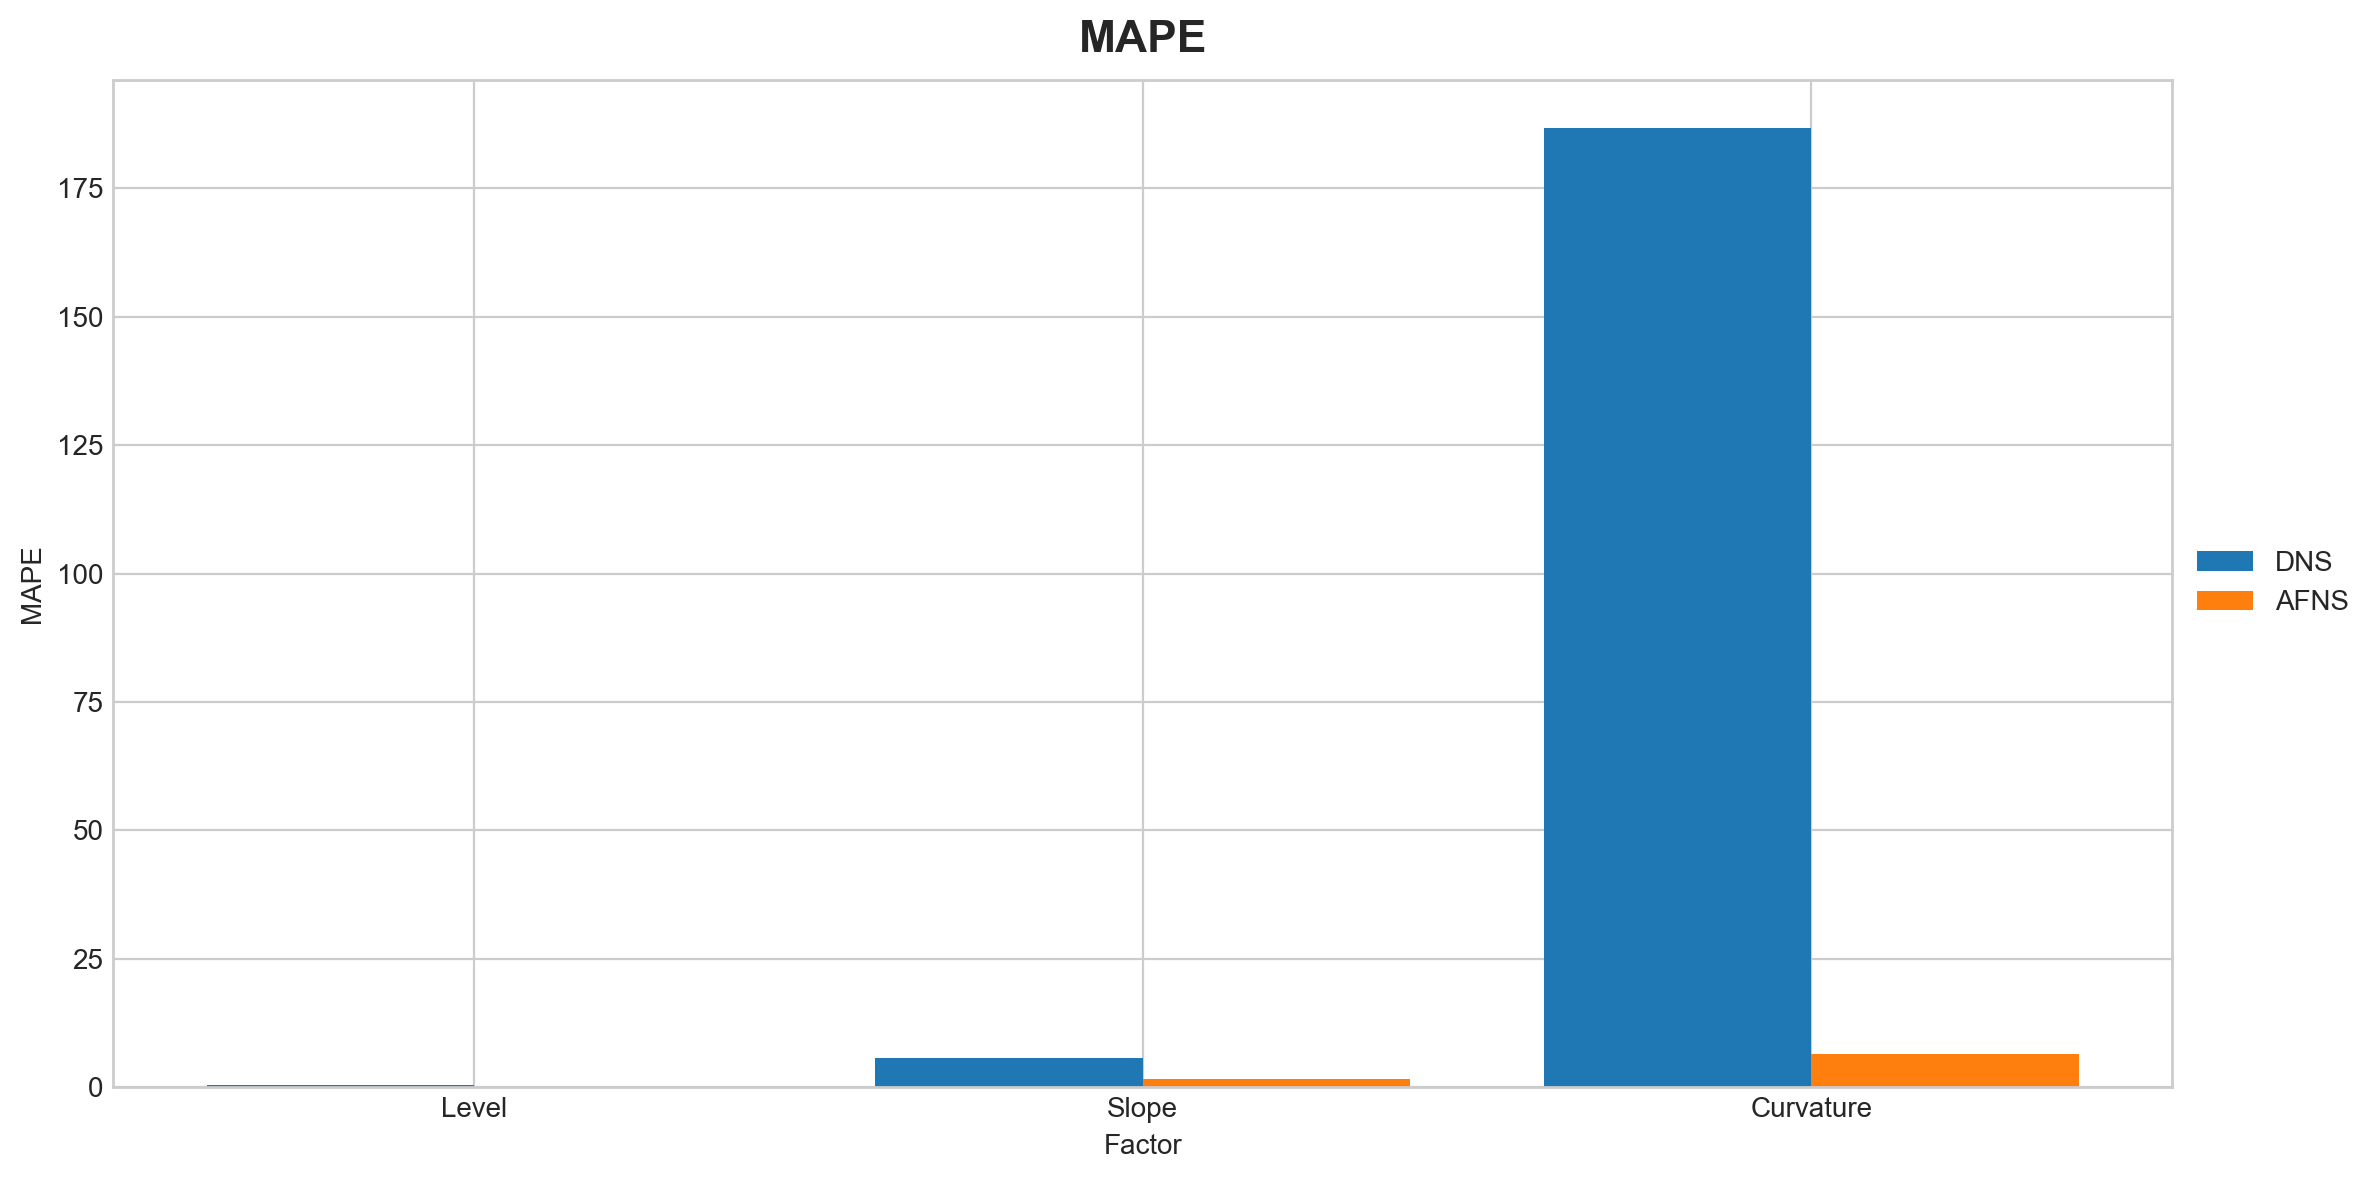

In [24]:
mape_dns_stats = [dns_stats_beta0_indicator_list[1], dns_stats_beta1_indicator_list[1], dns_stats_beta2_indicator_list[1]]
mape_afns_stats = [afns_stats_level_indicator_list[1], afns_stats_slope_indicator_list[1], afns_stats_curvature_indicator_list[1]]
plot_indicator(mape_dns_stats, mape_afns_stats, 2, "MAPE")

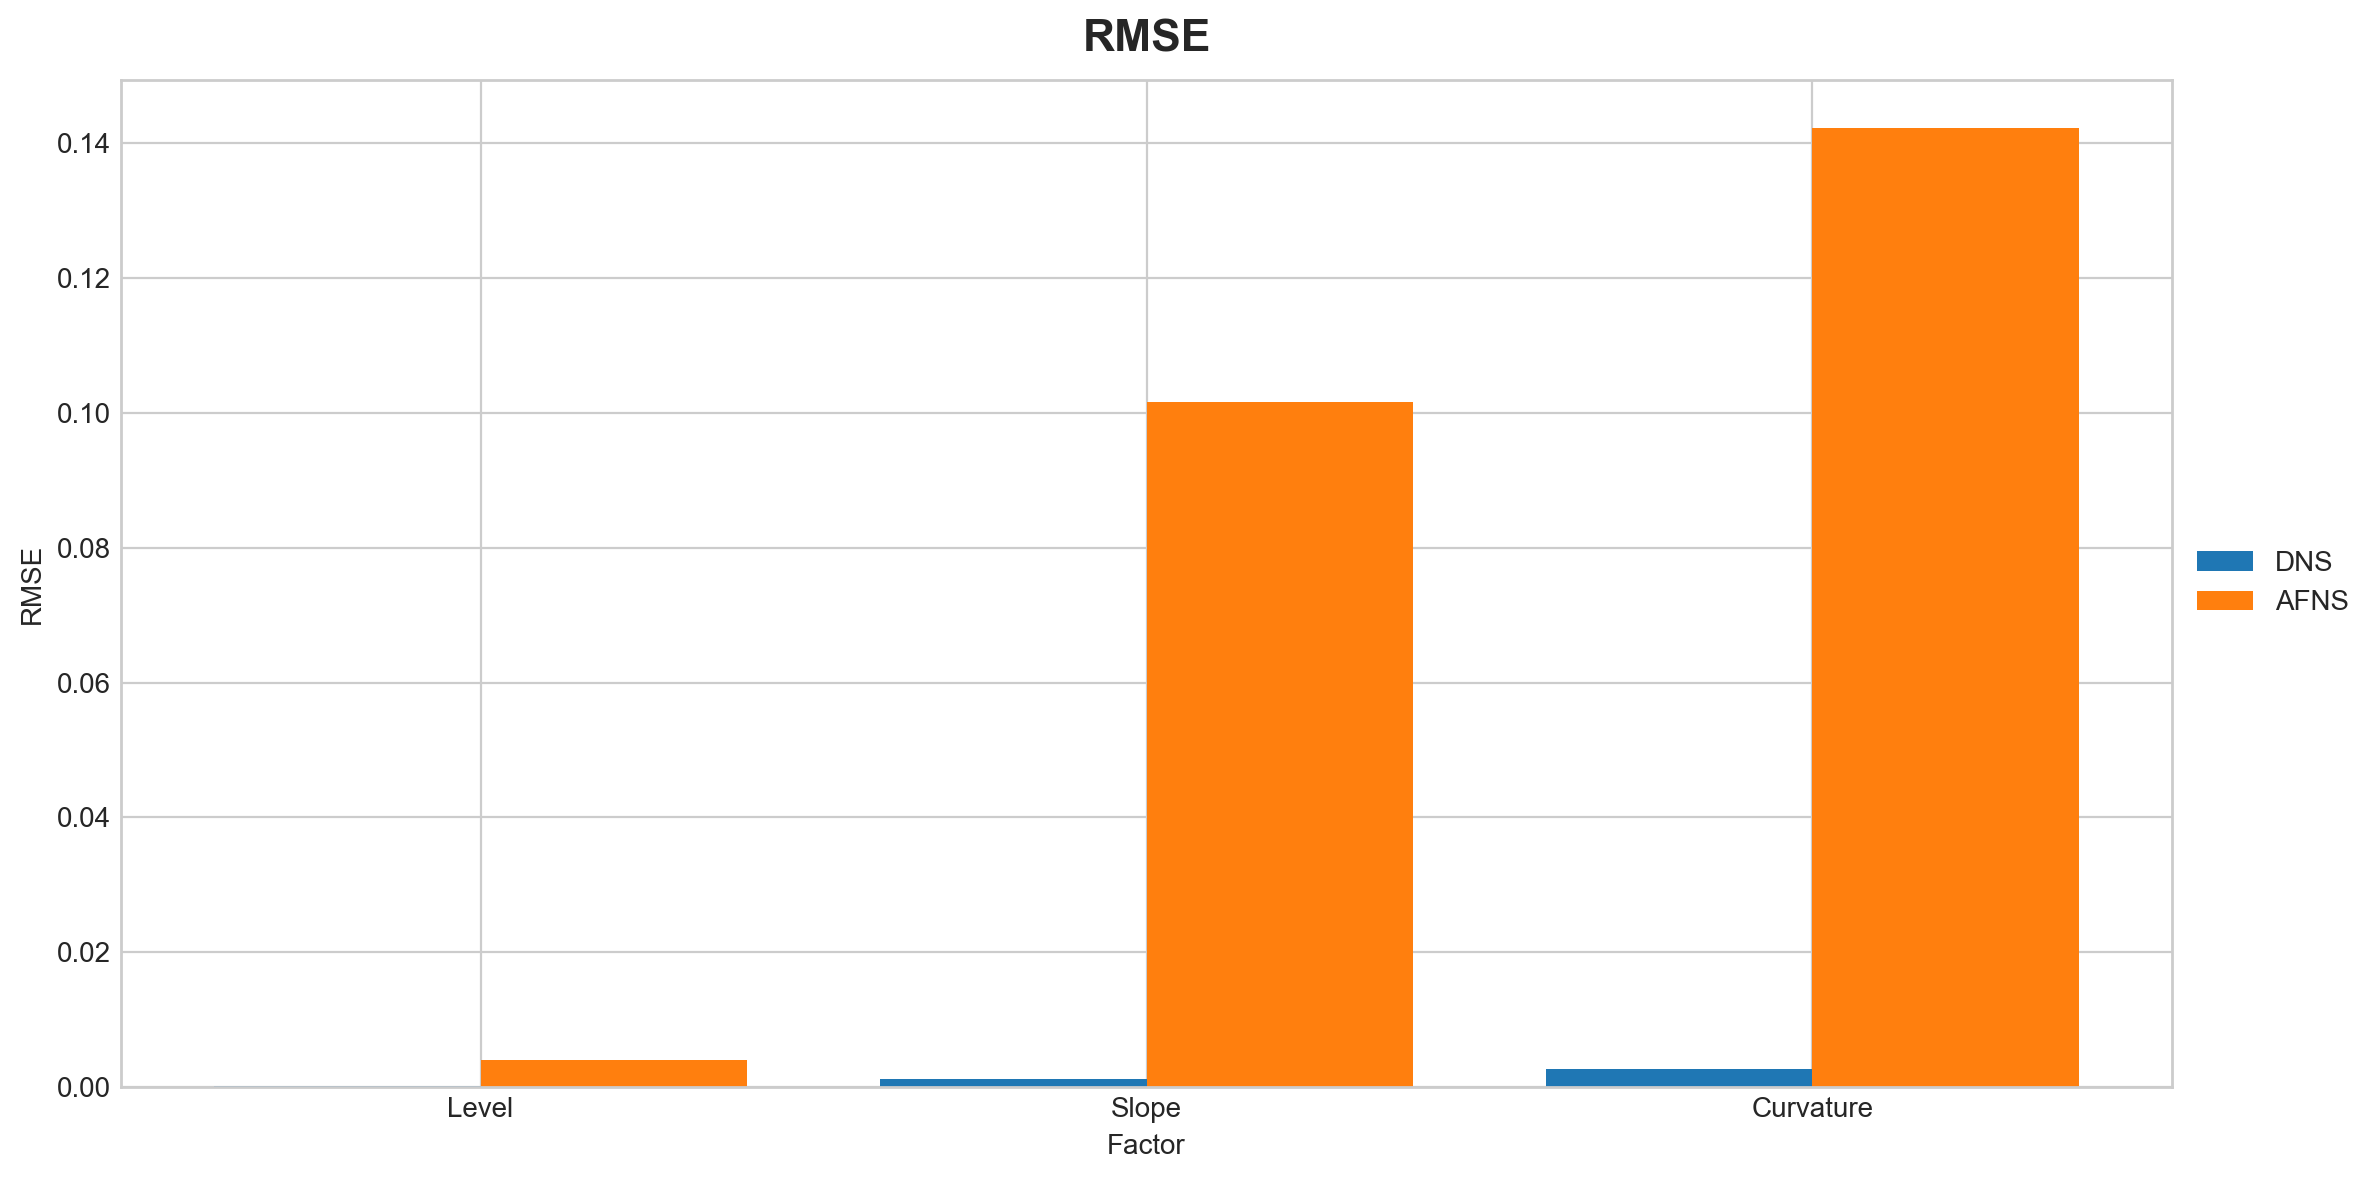

In [25]:
rmse_dns_stats = [dns_stats_beta0_indicator_list[2], dns_stats_beta1_indicator_list[2], dns_stats_beta2_indicator_list[2]]
rmse_afns_stats = [afns_stats_level_indicator_list[2], afns_stats_slope_indicator_list[2], afns_stats_curvature_indicator_list[2]]
plot_indicator(rmse_dns_stats, rmse_afns_stats, 2, "RMSE")

### 1.2 机器学习模型分析

machine learning model

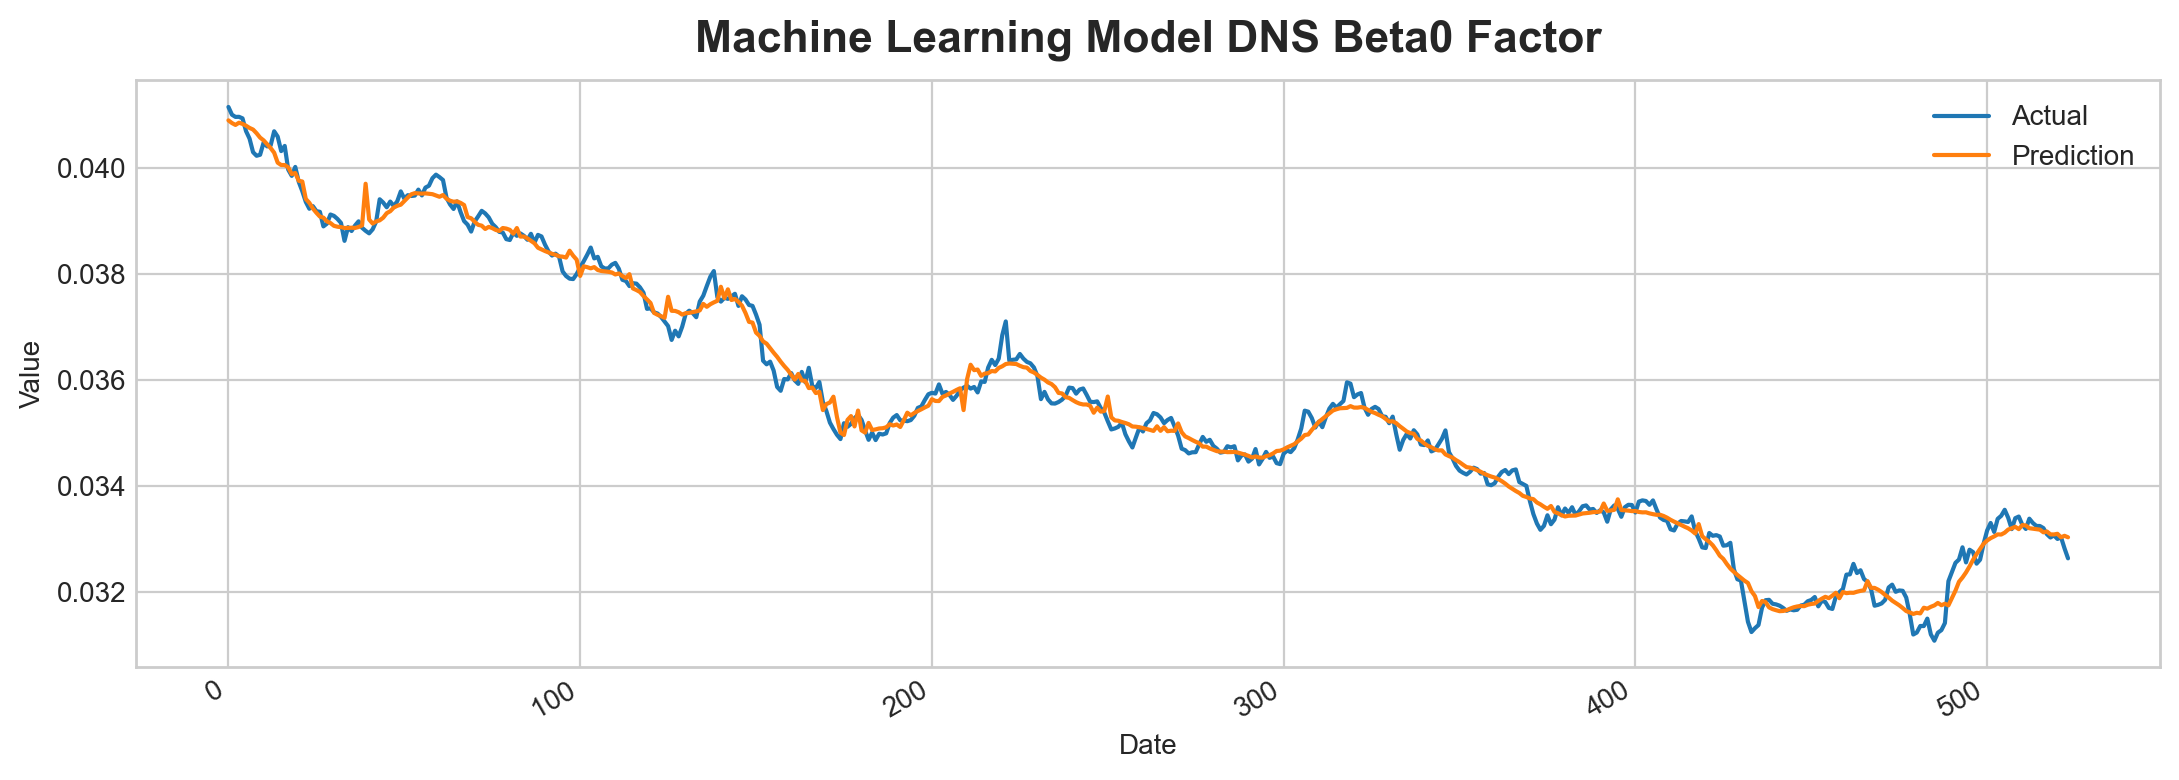

In [26]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta0'], label="Actual")
ax.plot(pred_ml_dns_df['Beta0'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model DNS Beta0 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [27]:
dns_ml_beta0_indicator_list = cal_indicator(new_actual_dns_df['Beta0'], pred_ml_dns_df['Beta0'])
dns_ml_beta0_indicator_list

[0.00017625943833410275, 0.5013160670955437, 0.00023056964082892903]

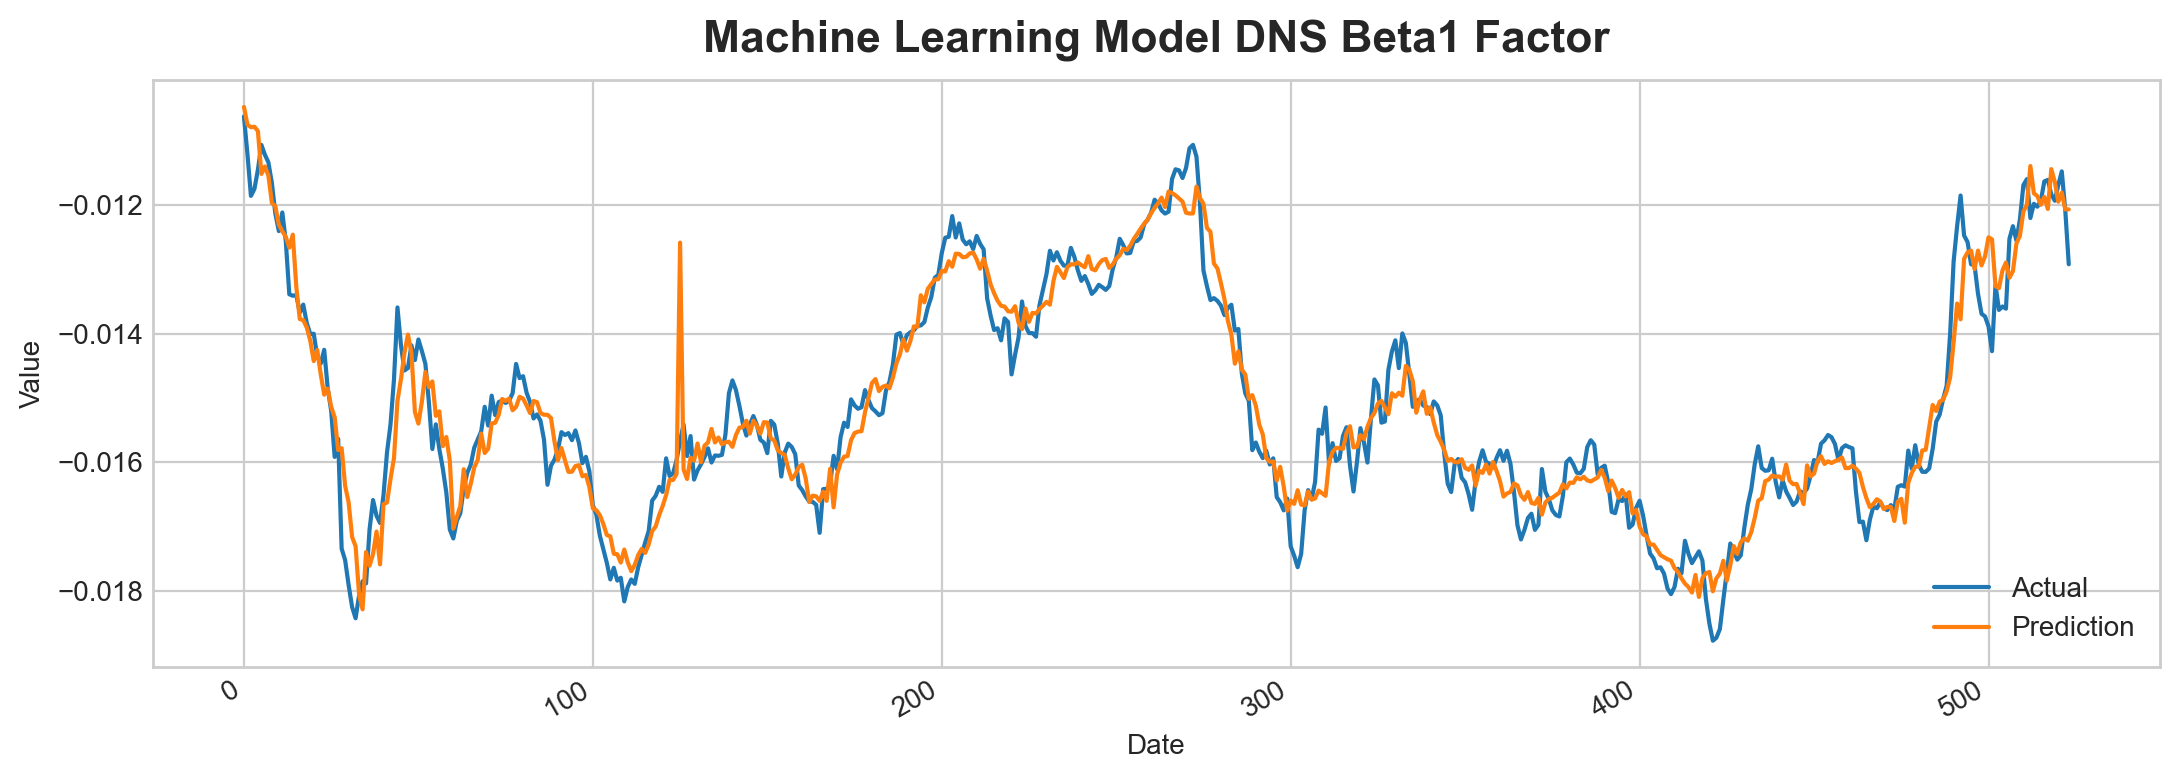

In [28]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta1'], label="Actual")
ax.plot(pred_ml_dns_df['Beta1'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model DNS Beta1 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [29]:
dns_ml_beta1_indicator_list = cal_indicator(new_actual_dns_df['Beta1'], pred_ml_dns_df['Beta1'])
dns_ml_beta1_indicator_list

[0.0003665021930543918, 2.4595528748487254, 0.0004902908343387021]

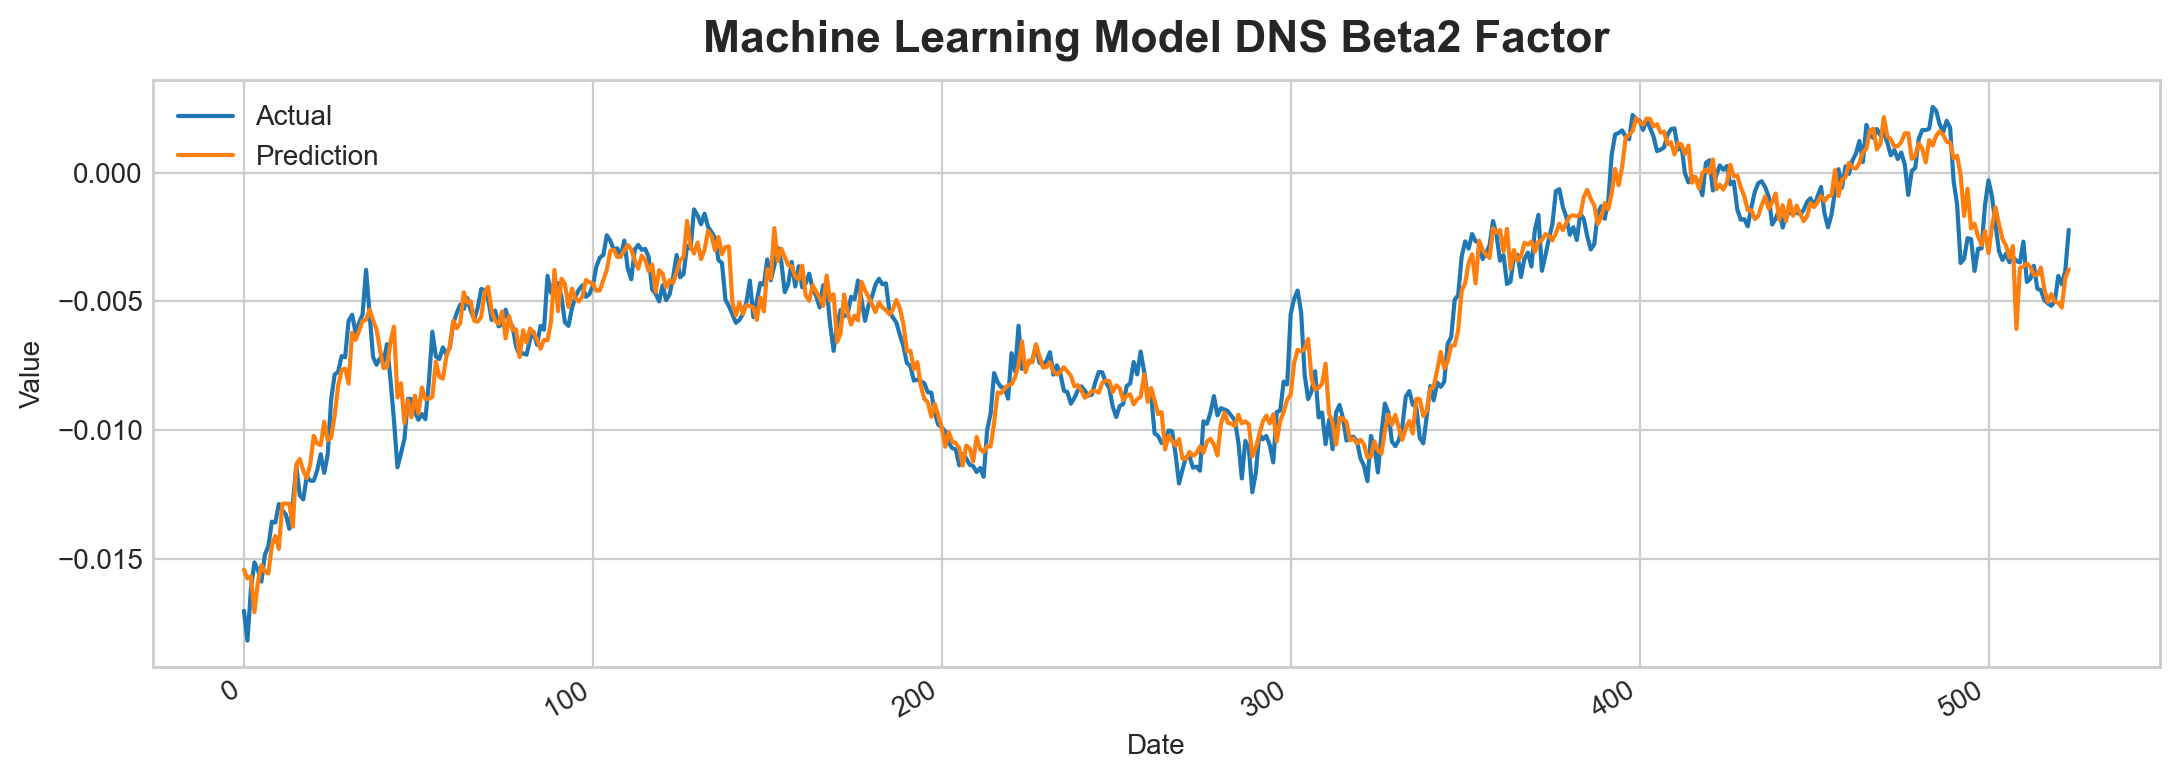

In [30]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta2'], label="Actual")
ax.plot(pred_ml_dns_df['Beta2'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model DNS Beta2 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [31]:
dns_ml_beta2_indicator_list = cal_indicator(new_actual_dns_df['Beta2'], pred_ml_dns_df['Beta2'])
dns_ml_beta2_indicator_list

[0.0007381088155786438, 40.22334448097727, 0.0009521521145865566]

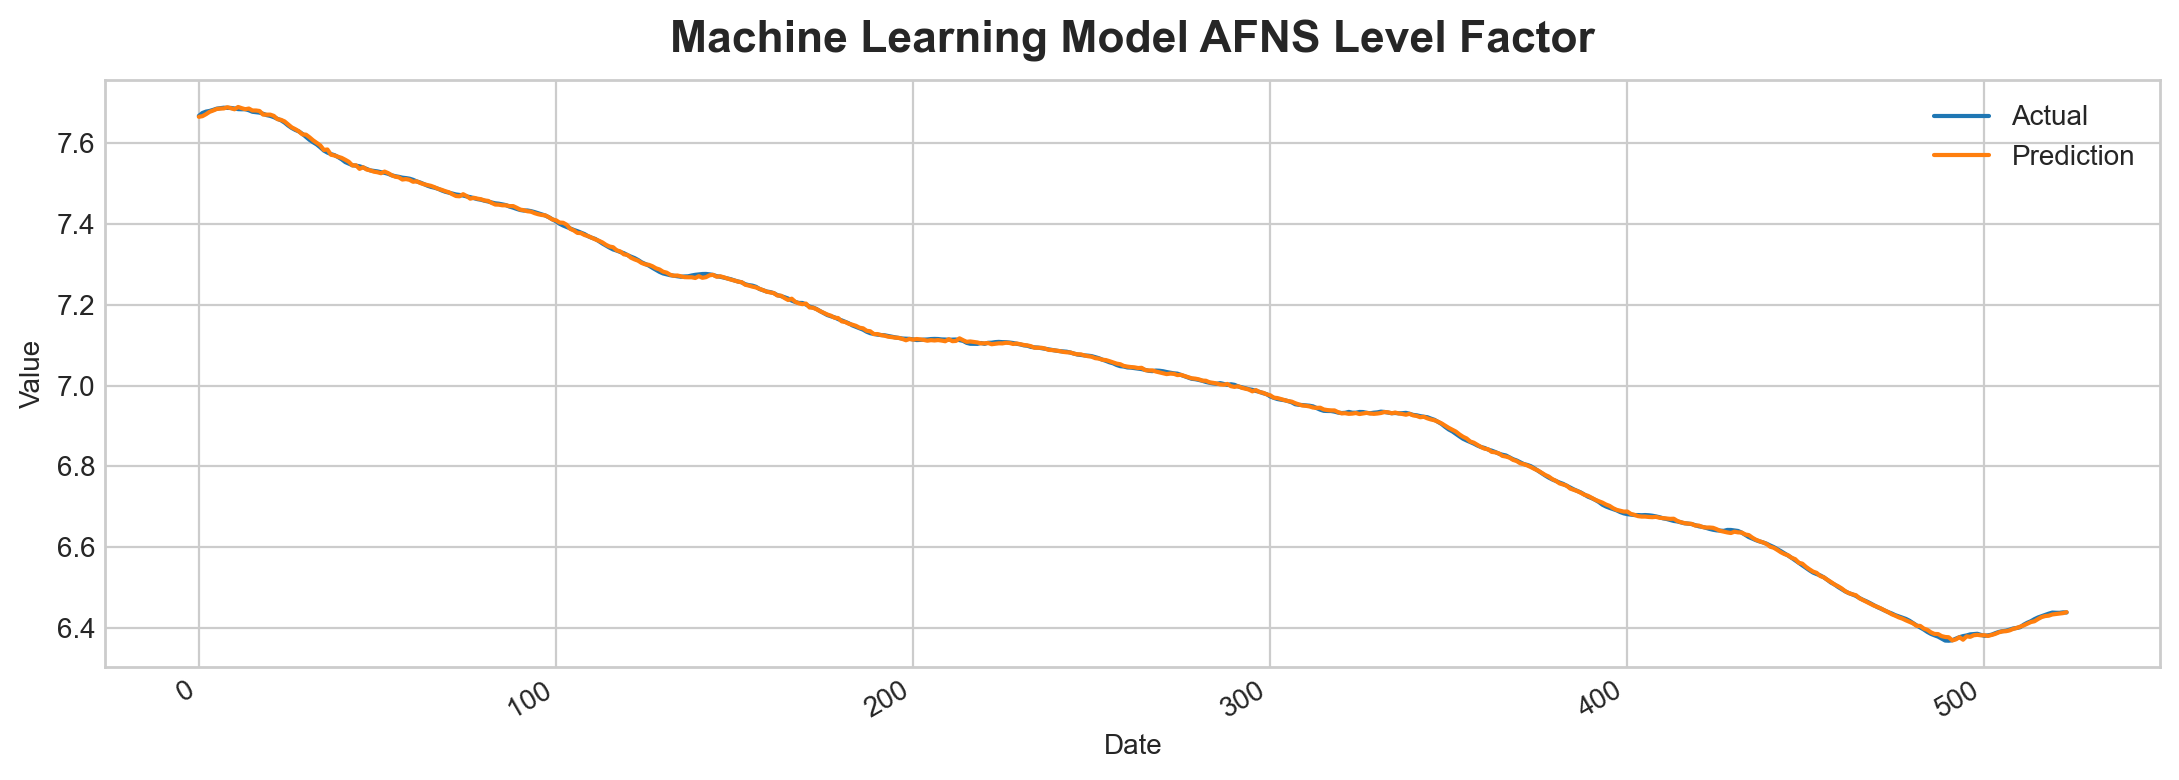

In [32]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Level'], label="Actual")
ax.plot(pred_ml_afns_df['Level'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model AFNS Level Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [33]:
afns_ml_level_indicator_list = cal_indicator(new_actual_afns_df['Level'], pred_ml_afns_df['Level'])
afns_ml_level_indicator_list

[0.0021074634359930684, 0.030076659548532024, 0.0027190390170128737]

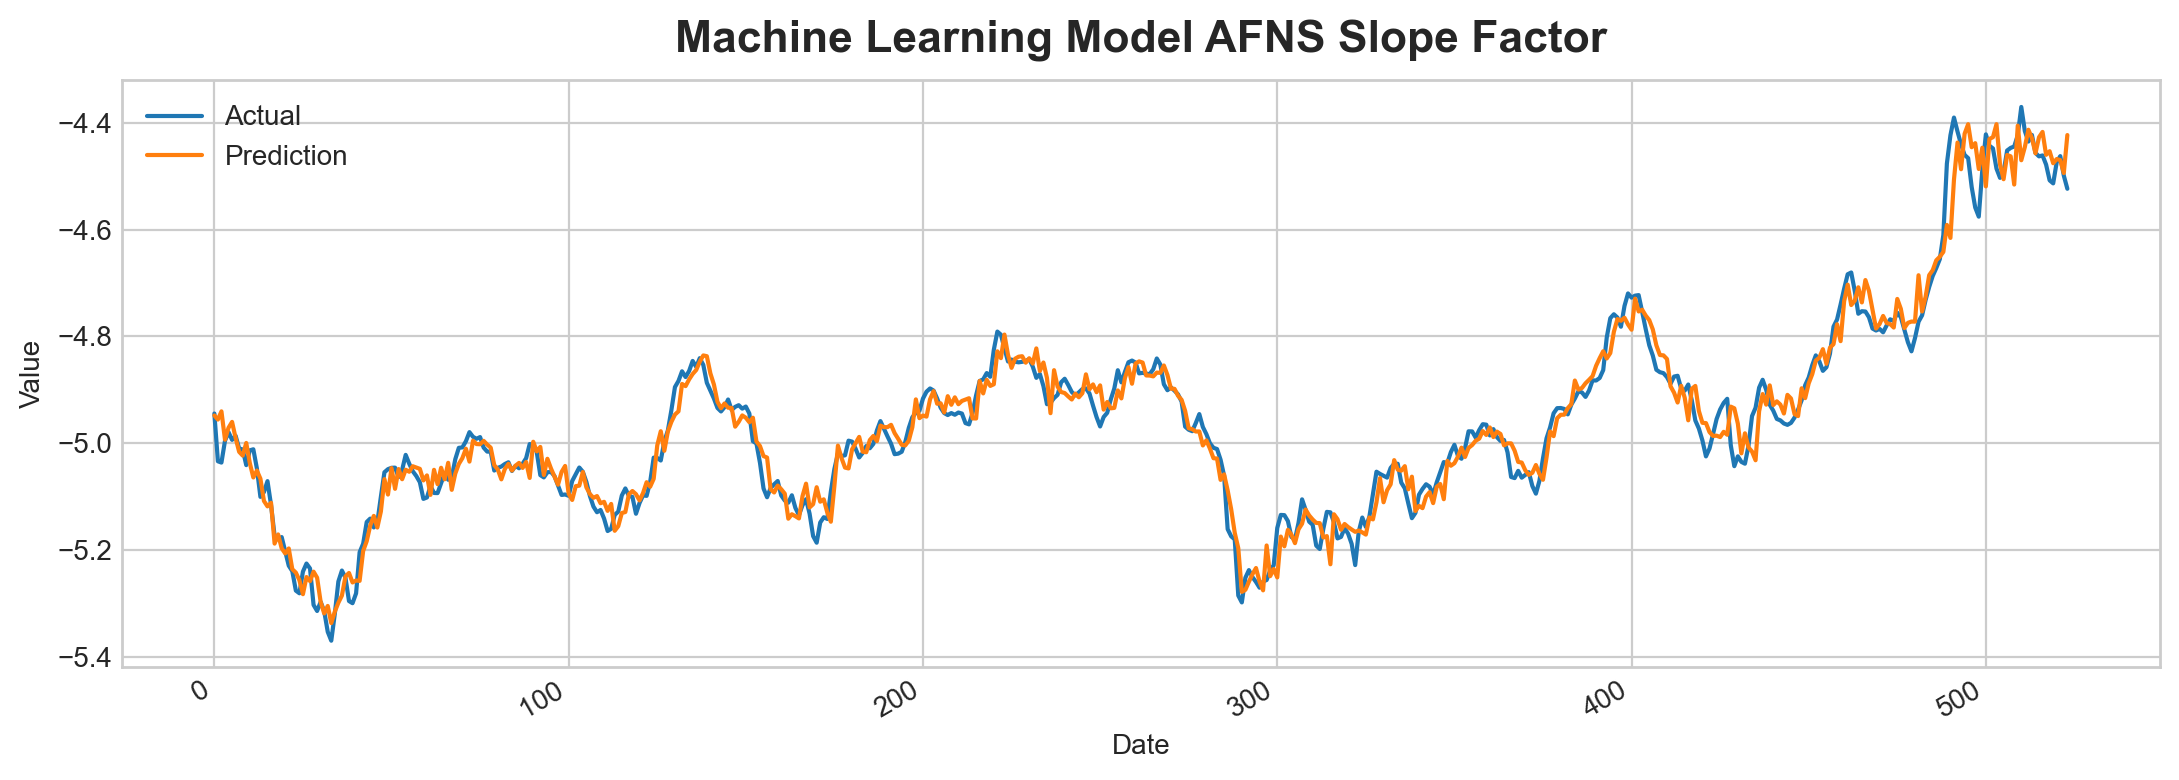

In [34]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Slope'], label="Actual")
ax.plot(pred_ml_afns_df['Slope'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model AFNS Slope Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [35]:
afns_ml_slope_indicator_list = cal_indicator(new_actual_afns_df['Slope'], pred_ml_afns_df['Slope'])
afns_ml_slope_indicator_list

[0.026874102058494265, 0.5455868452454338, 0.0356049860342594]

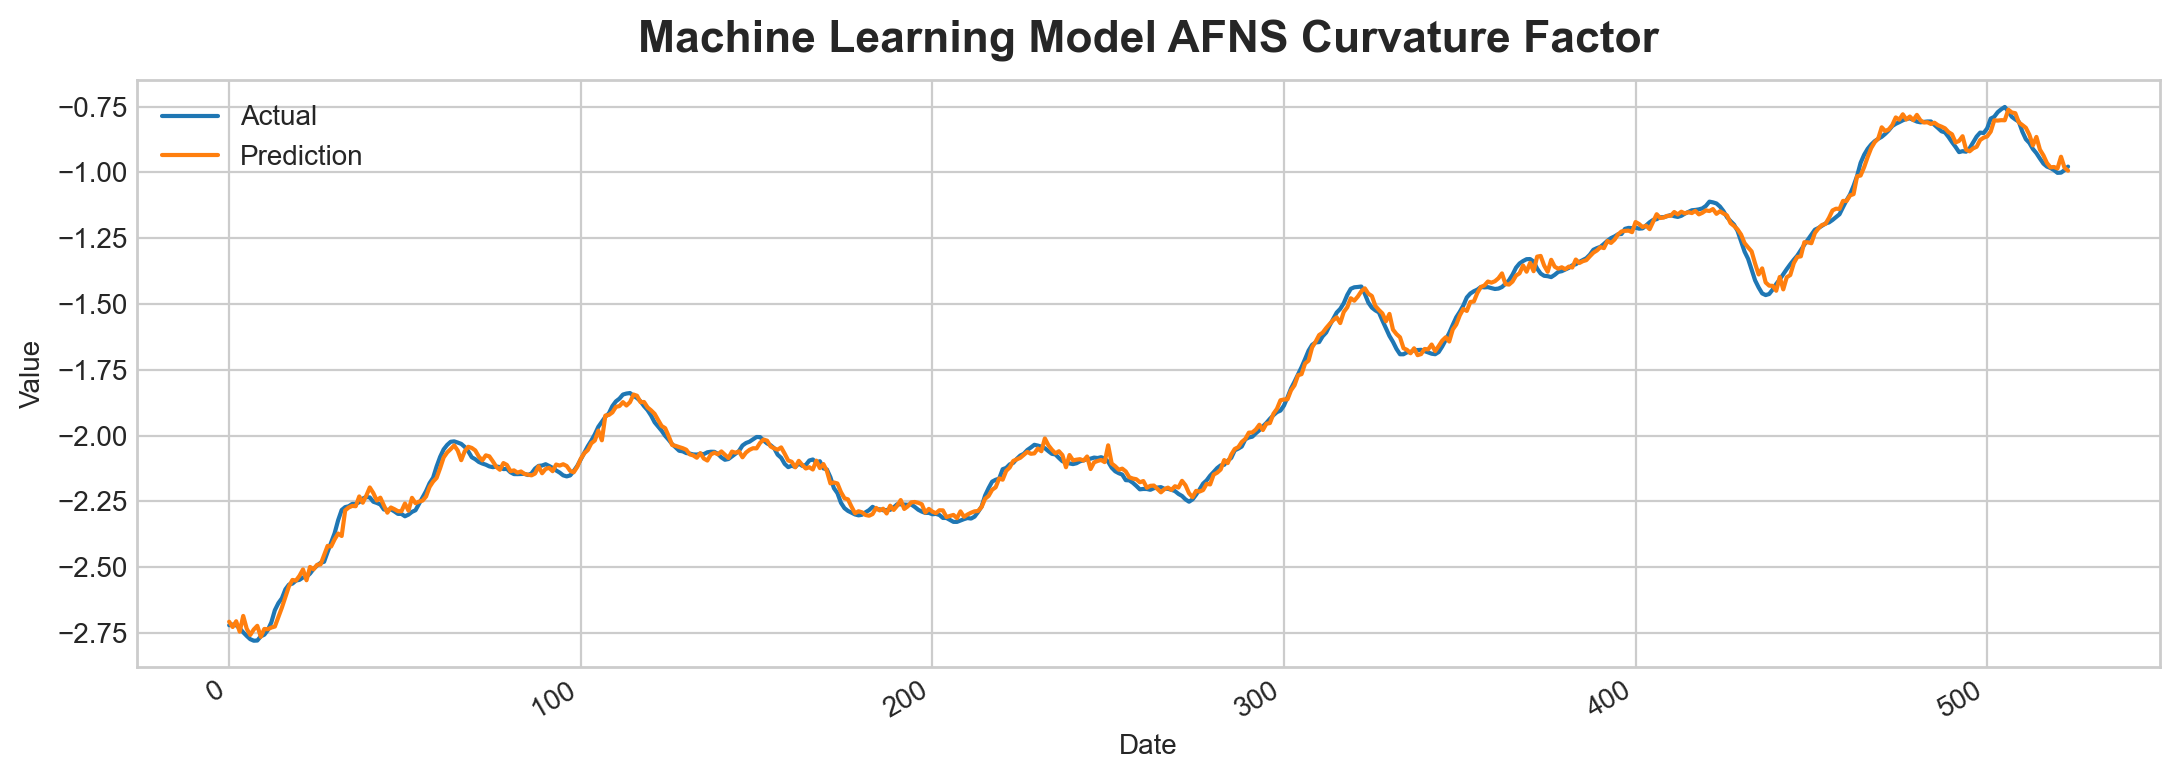

In [36]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Curvature'], label="Actual")
ax.plot(pred_ml_afns_df['Curvature'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model AFNS Curvature Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [37]:
afns_ml_curvature_indicator_list = cal_indicator(new_actual_afns_df['Curvature'], pred_ml_afns_df['Curvature'])
afns_ml_curvature_indicator_list

[0.019876169550063674, 1.254908917458924, 0.025443741635741934]

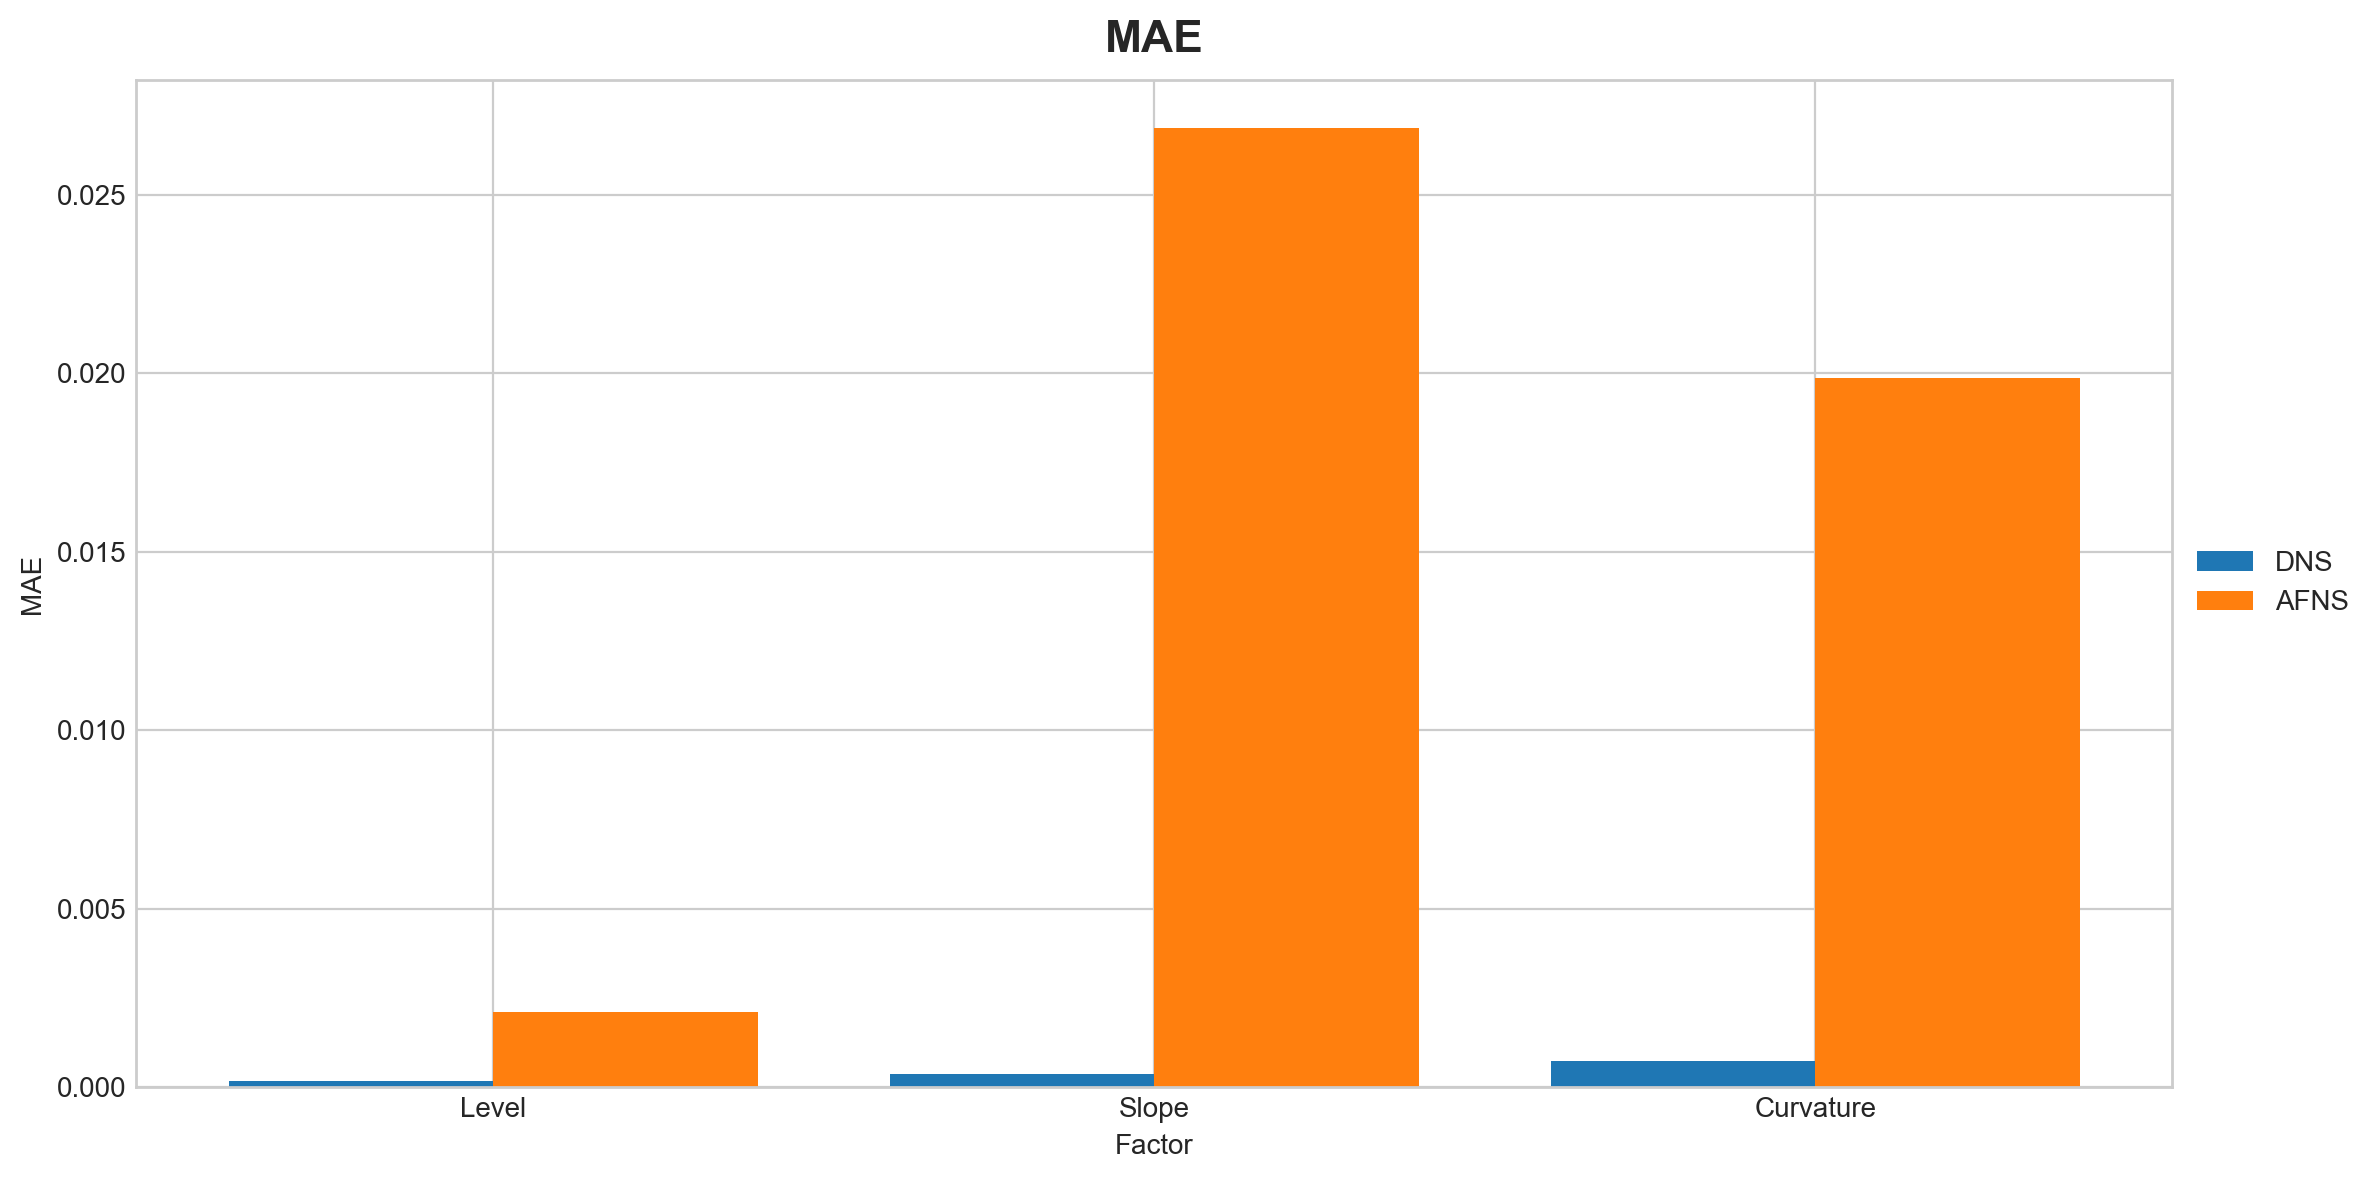

In [38]:
mae_dns_ml = [dns_ml_beta0_indicator_list[0], dns_ml_beta1_indicator_list[0], dns_ml_beta2_indicator_list[0]]
mae_afns_ml = [afns_ml_level_indicator_list[0], afns_ml_slope_indicator_list[0], afns_ml_curvature_indicator_list[0]]
plot_indicator(mae_dns_ml, mae_afns_ml, 2, "MAE")

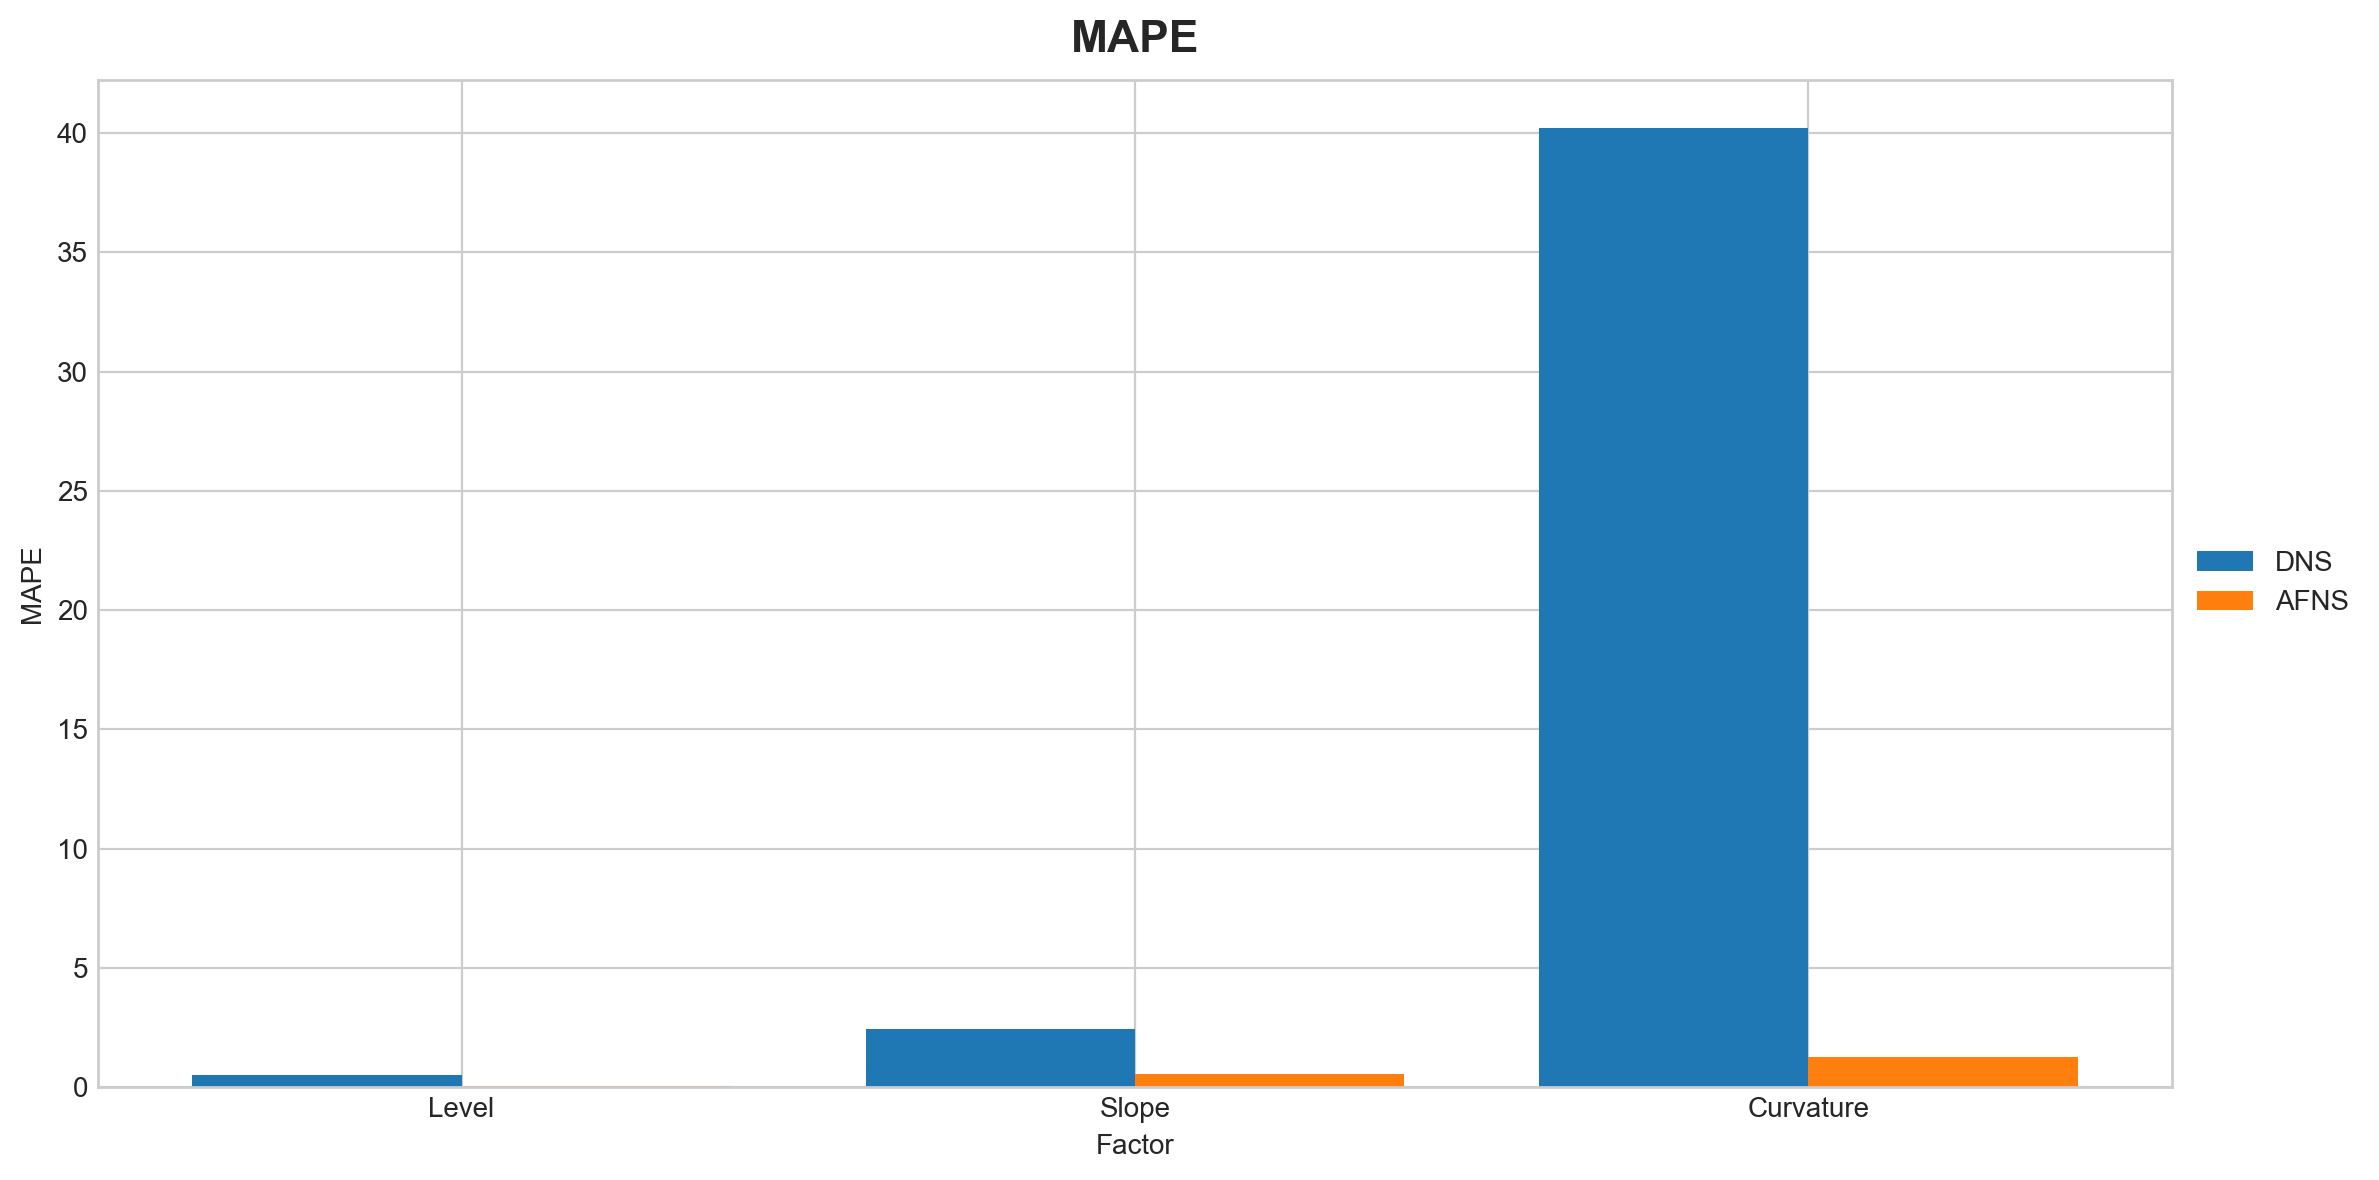

In [39]:
mape_dns_ml = [dns_ml_beta0_indicator_list[1], dns_ml_beta1_indicator_list[1], dns_ml_beta2_indicator_list[1]]
mape_afns_ml = [afns_ml_level_indicator_list[1], afns_ml_slope_indicator_list[1], afns_ml_curvature_indicator_list[1]]
plot_indicator(mape_dns_ml, mape_afns_ml, 2, "MAPE")

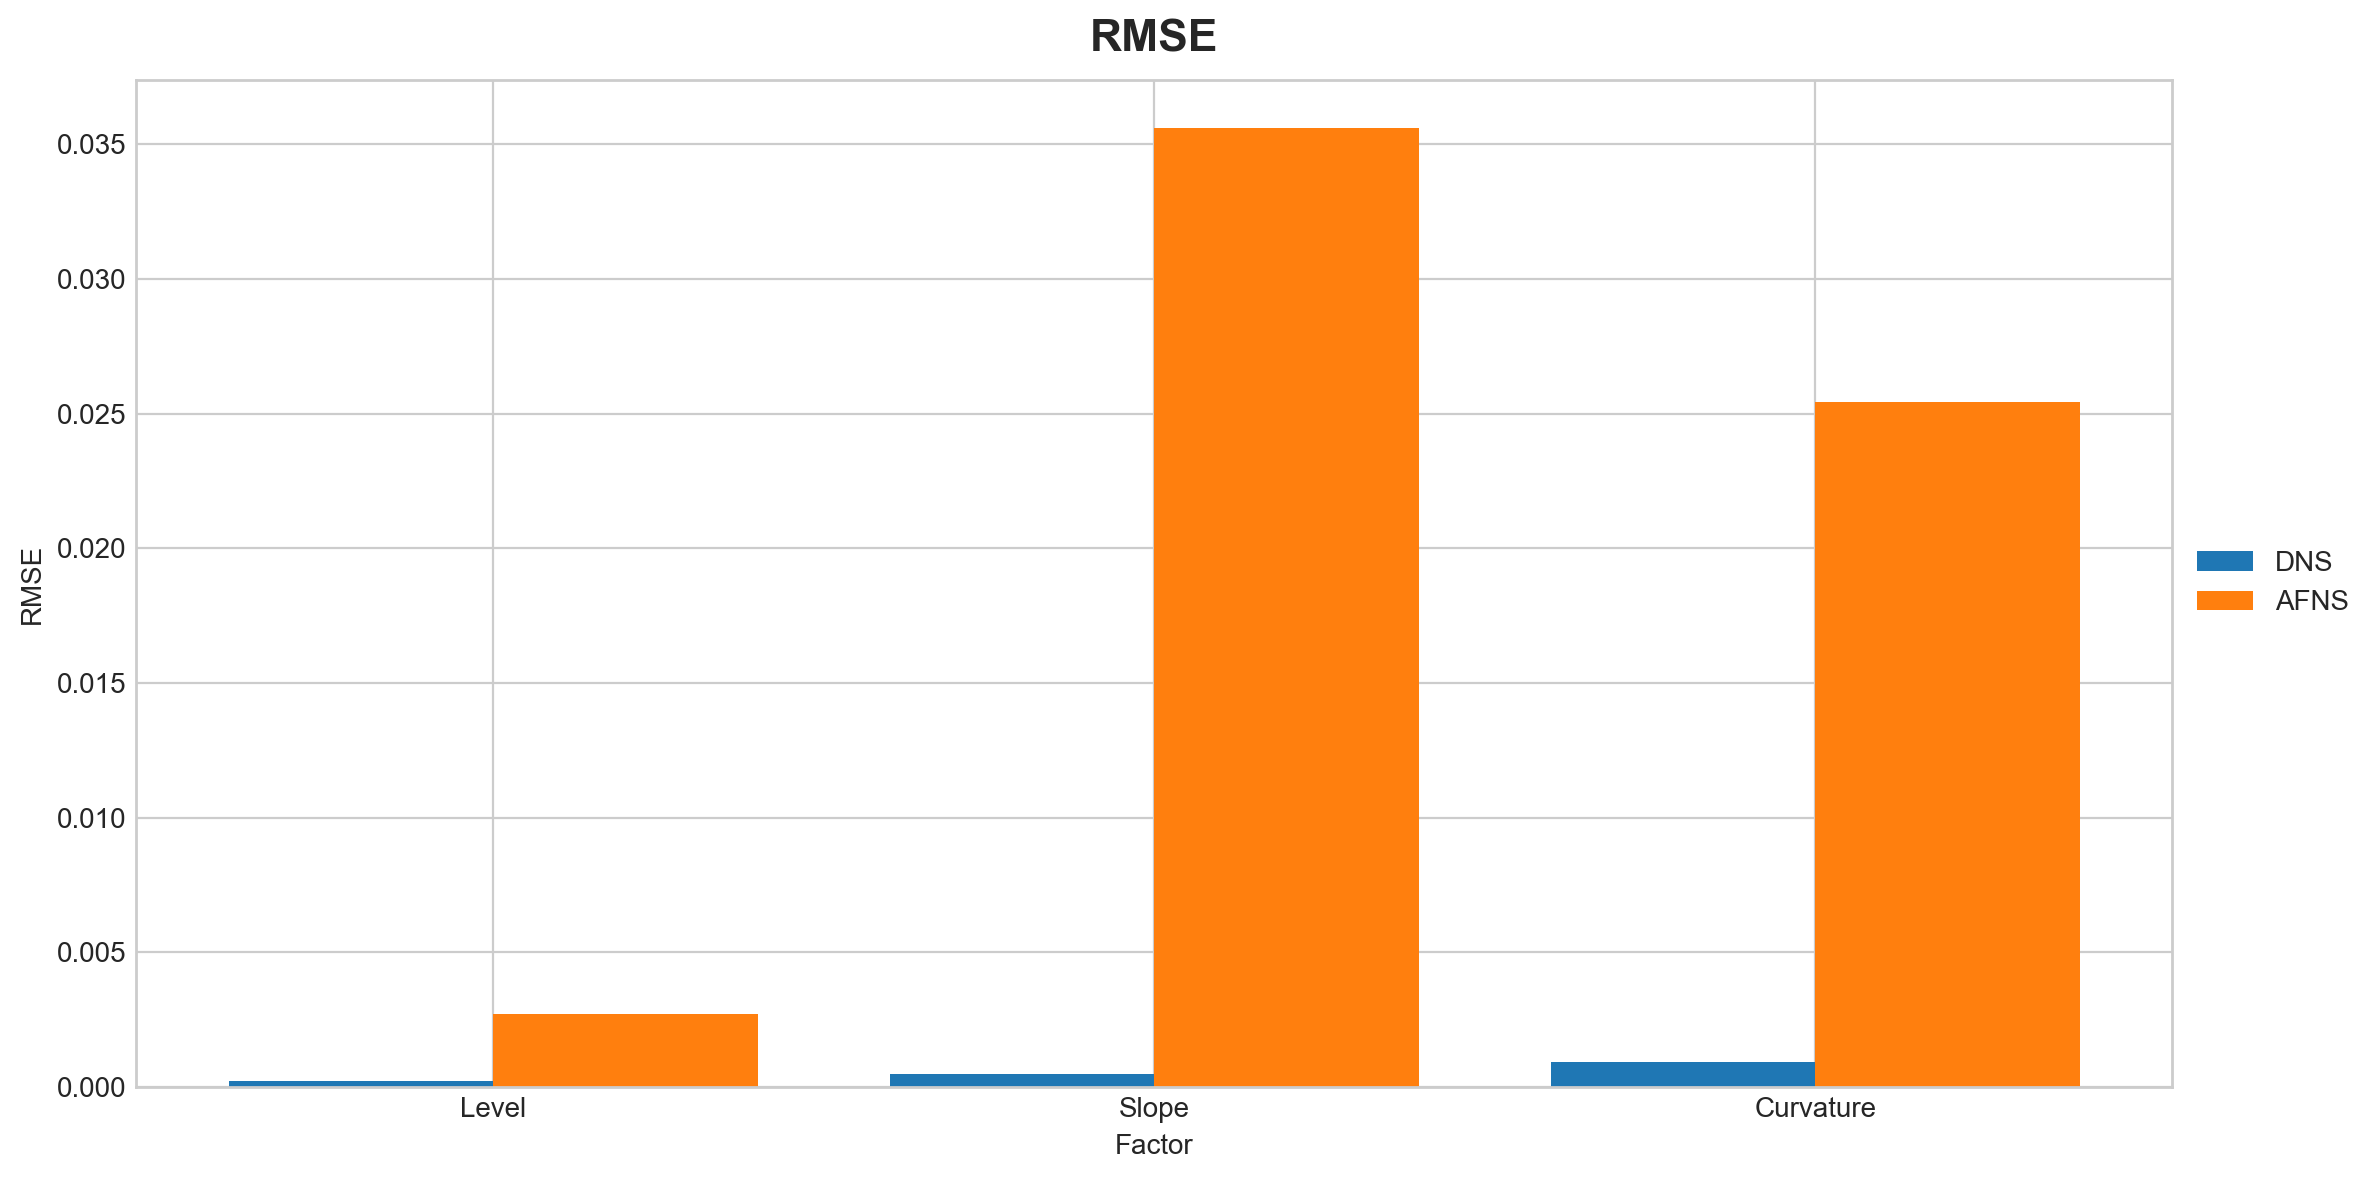

In [40]:
rmse_dns_ml = [dns_ml_beta0_indicator_list[2], dns_ml_beta1_indicator_list[2], dns_ml_beta2_indicator_list[2]]
rmse_afns_ml = [afns_ml_level_indicator_list[2], afns_ml_slope_indicator_list[2], afns_ml_curvature_indicator_list[2]]
plot_indicator(rmse_dns_ml, rmse_afns_ml, 2, "RMSE")

### 比较统计学模型跟机器学习模型

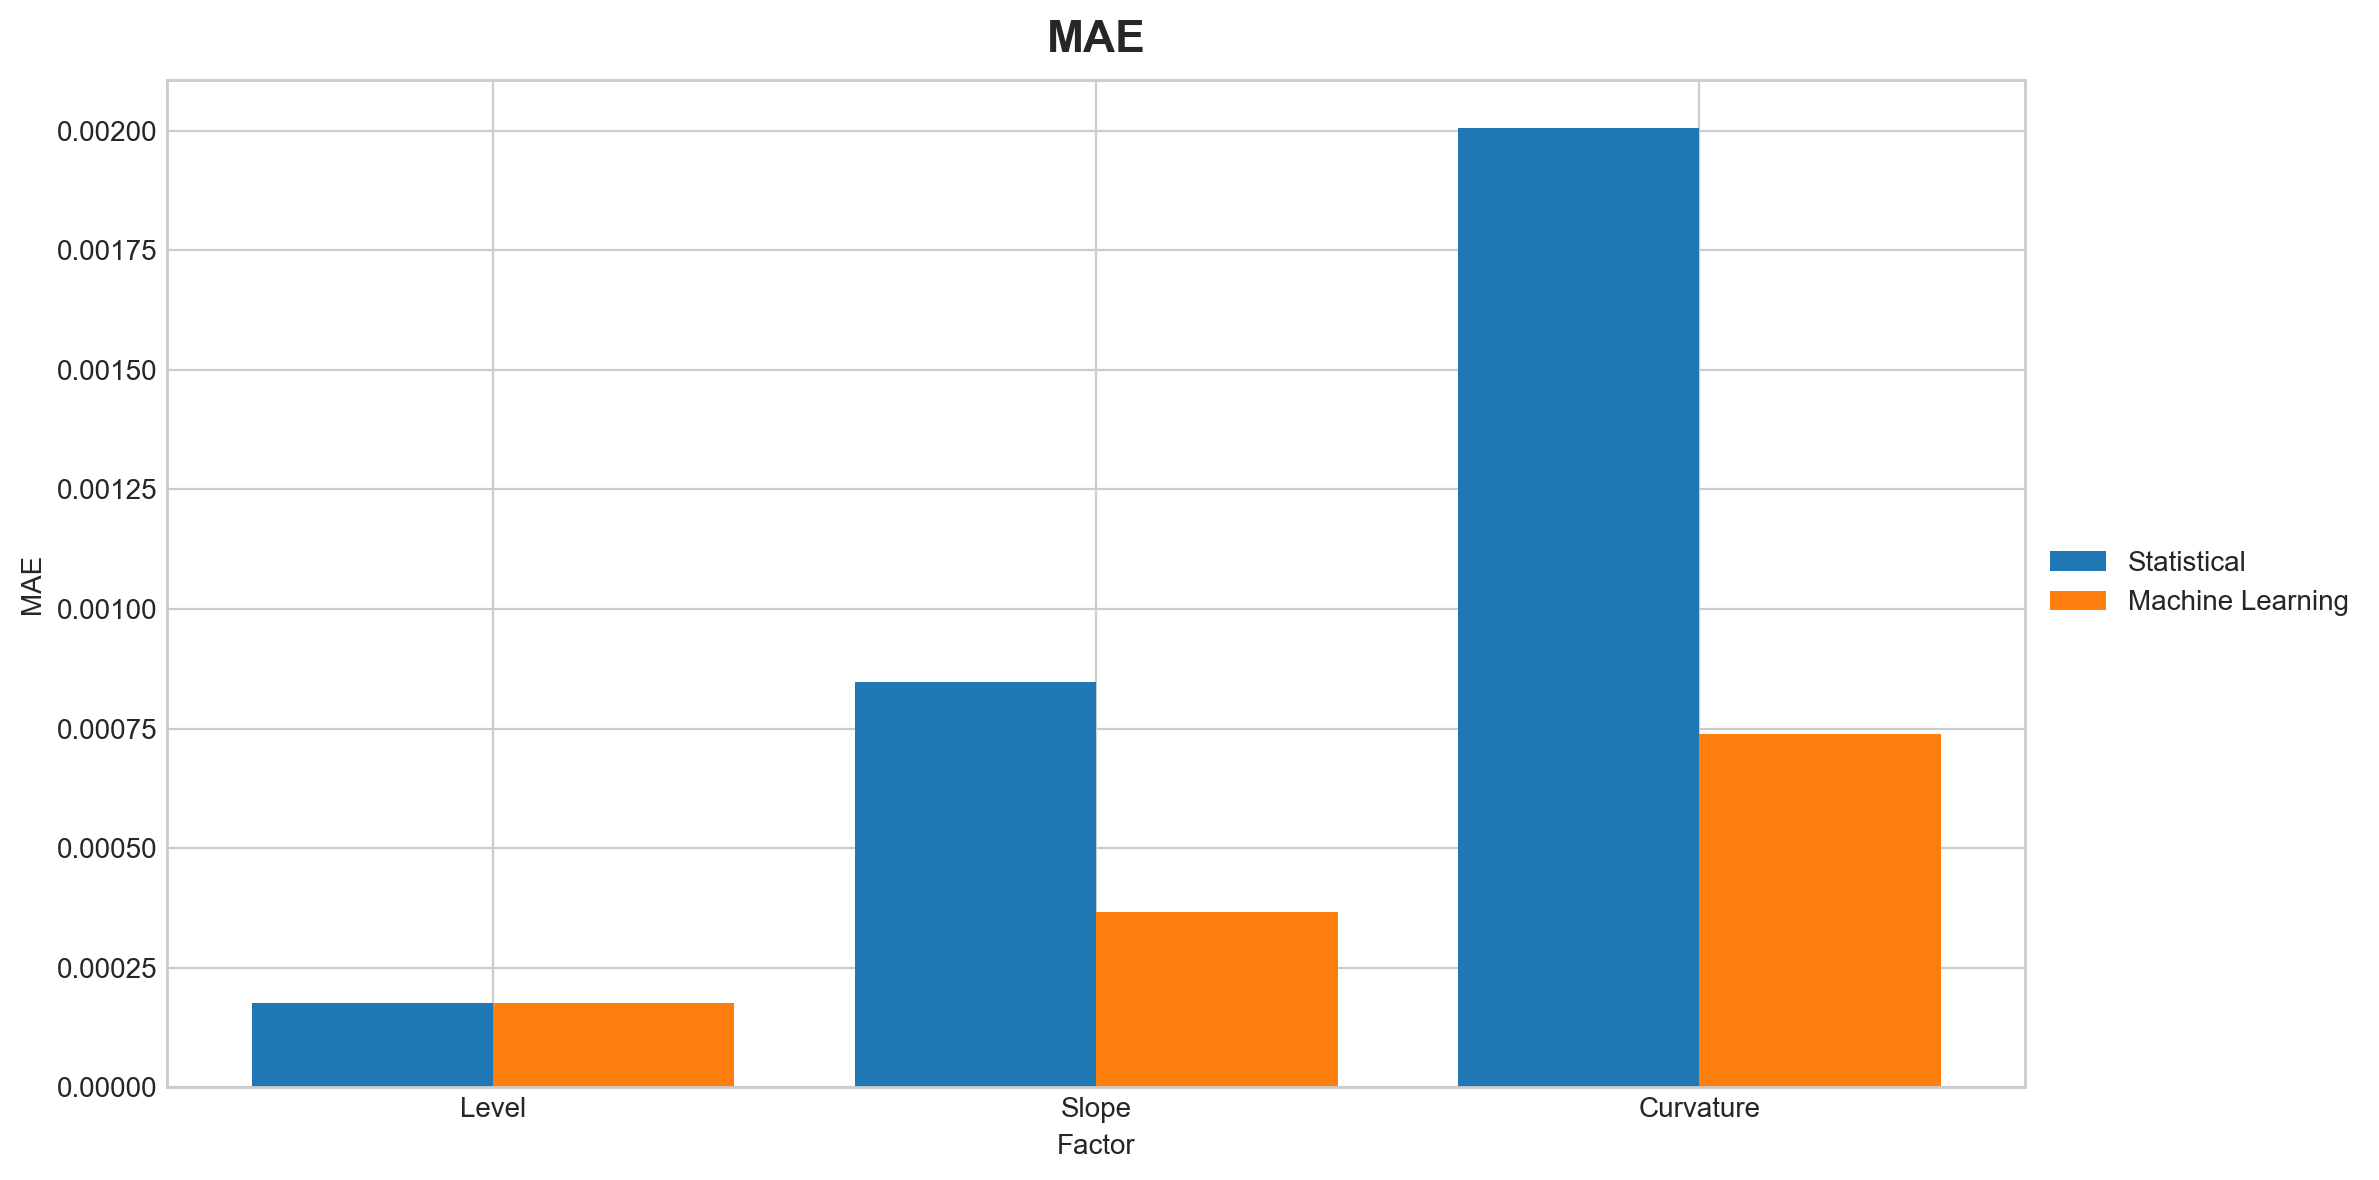

In [41]:
# MAE 可视化
# 

mae_dns_stats = [dns_stats_beta0_indicator_list[0], dns_stats_beta1_indicator_list[0], dns_stats_beta2_indicator_list[0]]
mae_dns_ml = [dns_ml_beta0_indicator_list[0], dns_ml_beta1_indicator_list[0], dns_ml_beta2_indicator_list[0]]

def plot_model_indicator(dns_stats, dns_ml, label_nums, label_name="MAE"):
    fig, ax = plt.subplots(figsize=(12, 6))

    label_list = ["Level", "Slope", "Curvature"]

    totalWidth=0.8 # 一组柱状体的宽度
    #labelNums=2 # 一组有两种类别
    barWidth=totalWidth/label_nums # 单个柱体的宽度
    seriesNums=len(label_list) # 一共有多少组

    ax.bar([x for x in range(seriesNums)], dns_stats, label="Statistical", width=barWidth)
    ax.bar([x+1*barWidth for x in range(seriesNums)], dns_ml, label="Machine Learning", width=barWidth)
    #ax.bar([x+2*barWidth for x in range(seriesNums)], anfs_error_df['MAPE'], label="AFNS", width=barWidth)

    plt.xticks([x+barWidth/2*(label_nums-1) for x in range(3)], label_list)
    plt.xlabel("Factor")
    plt.ylabel(label_name)
    plt.title(label_name)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
plot_model_indicator(mae_dns_stats, mae_dns_ml, 2)

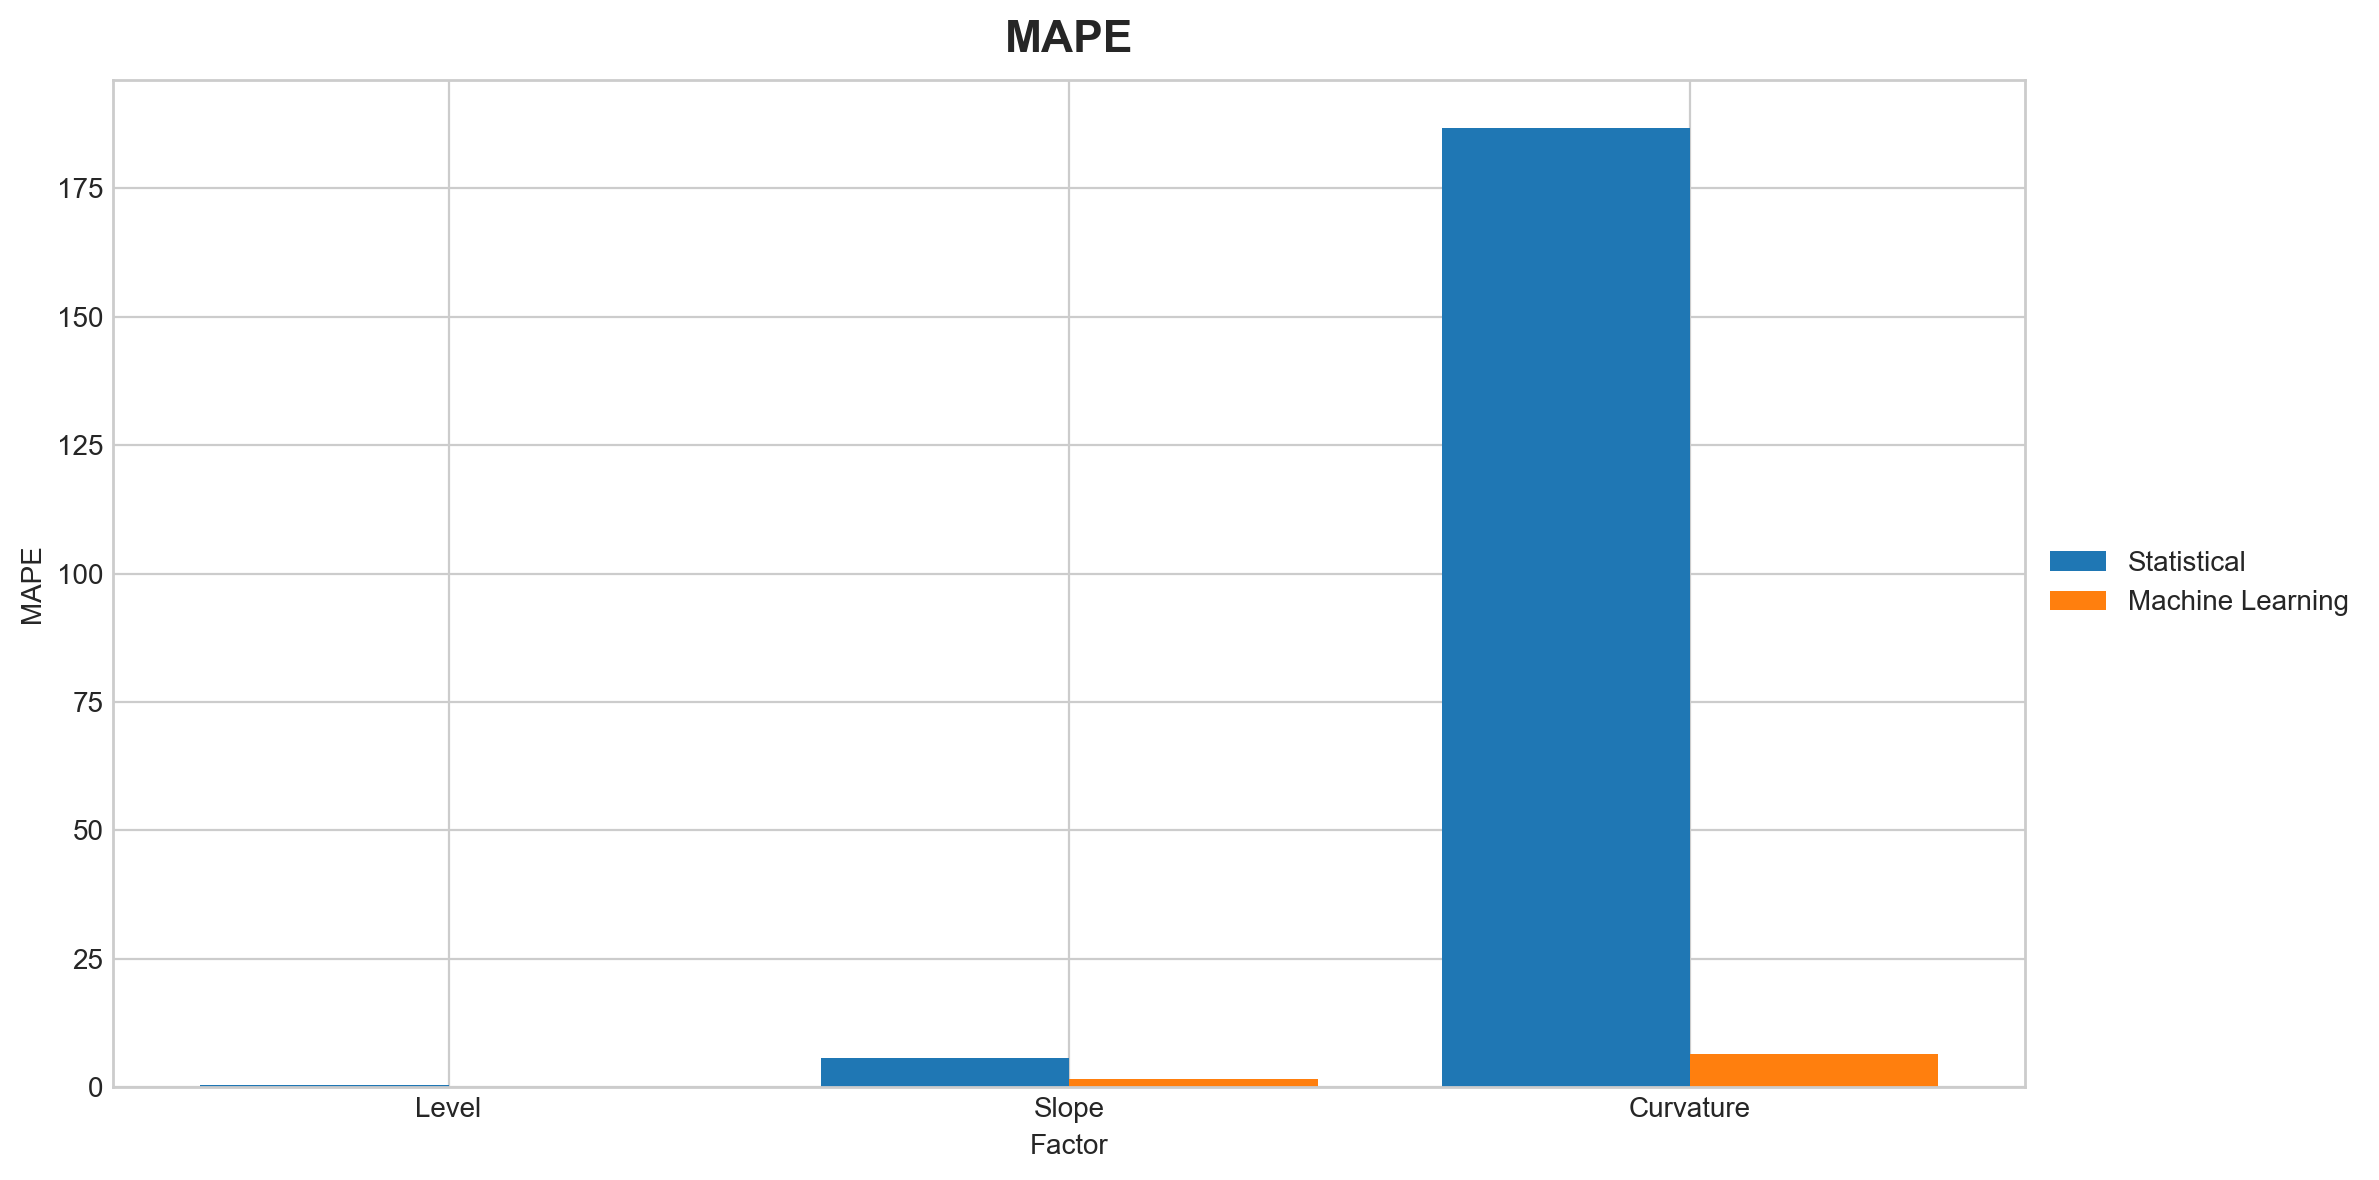

In [42]:
mape_dns_stats = [dns_stats_beta0_indicator_list[1], dns_stats_beta1_indicator_list[1], dns_stats_beta2_indicator_list[1]]
mape_afns_ml = [dns_ml_beta0_indicator_list[1], dns_ml_beta1_indicator_list[1], dns_ml_beta2_indicator_list[1]]
plot_model_indicator(mape_dns_stats, mape_afns_stats, 2, "MAPE")

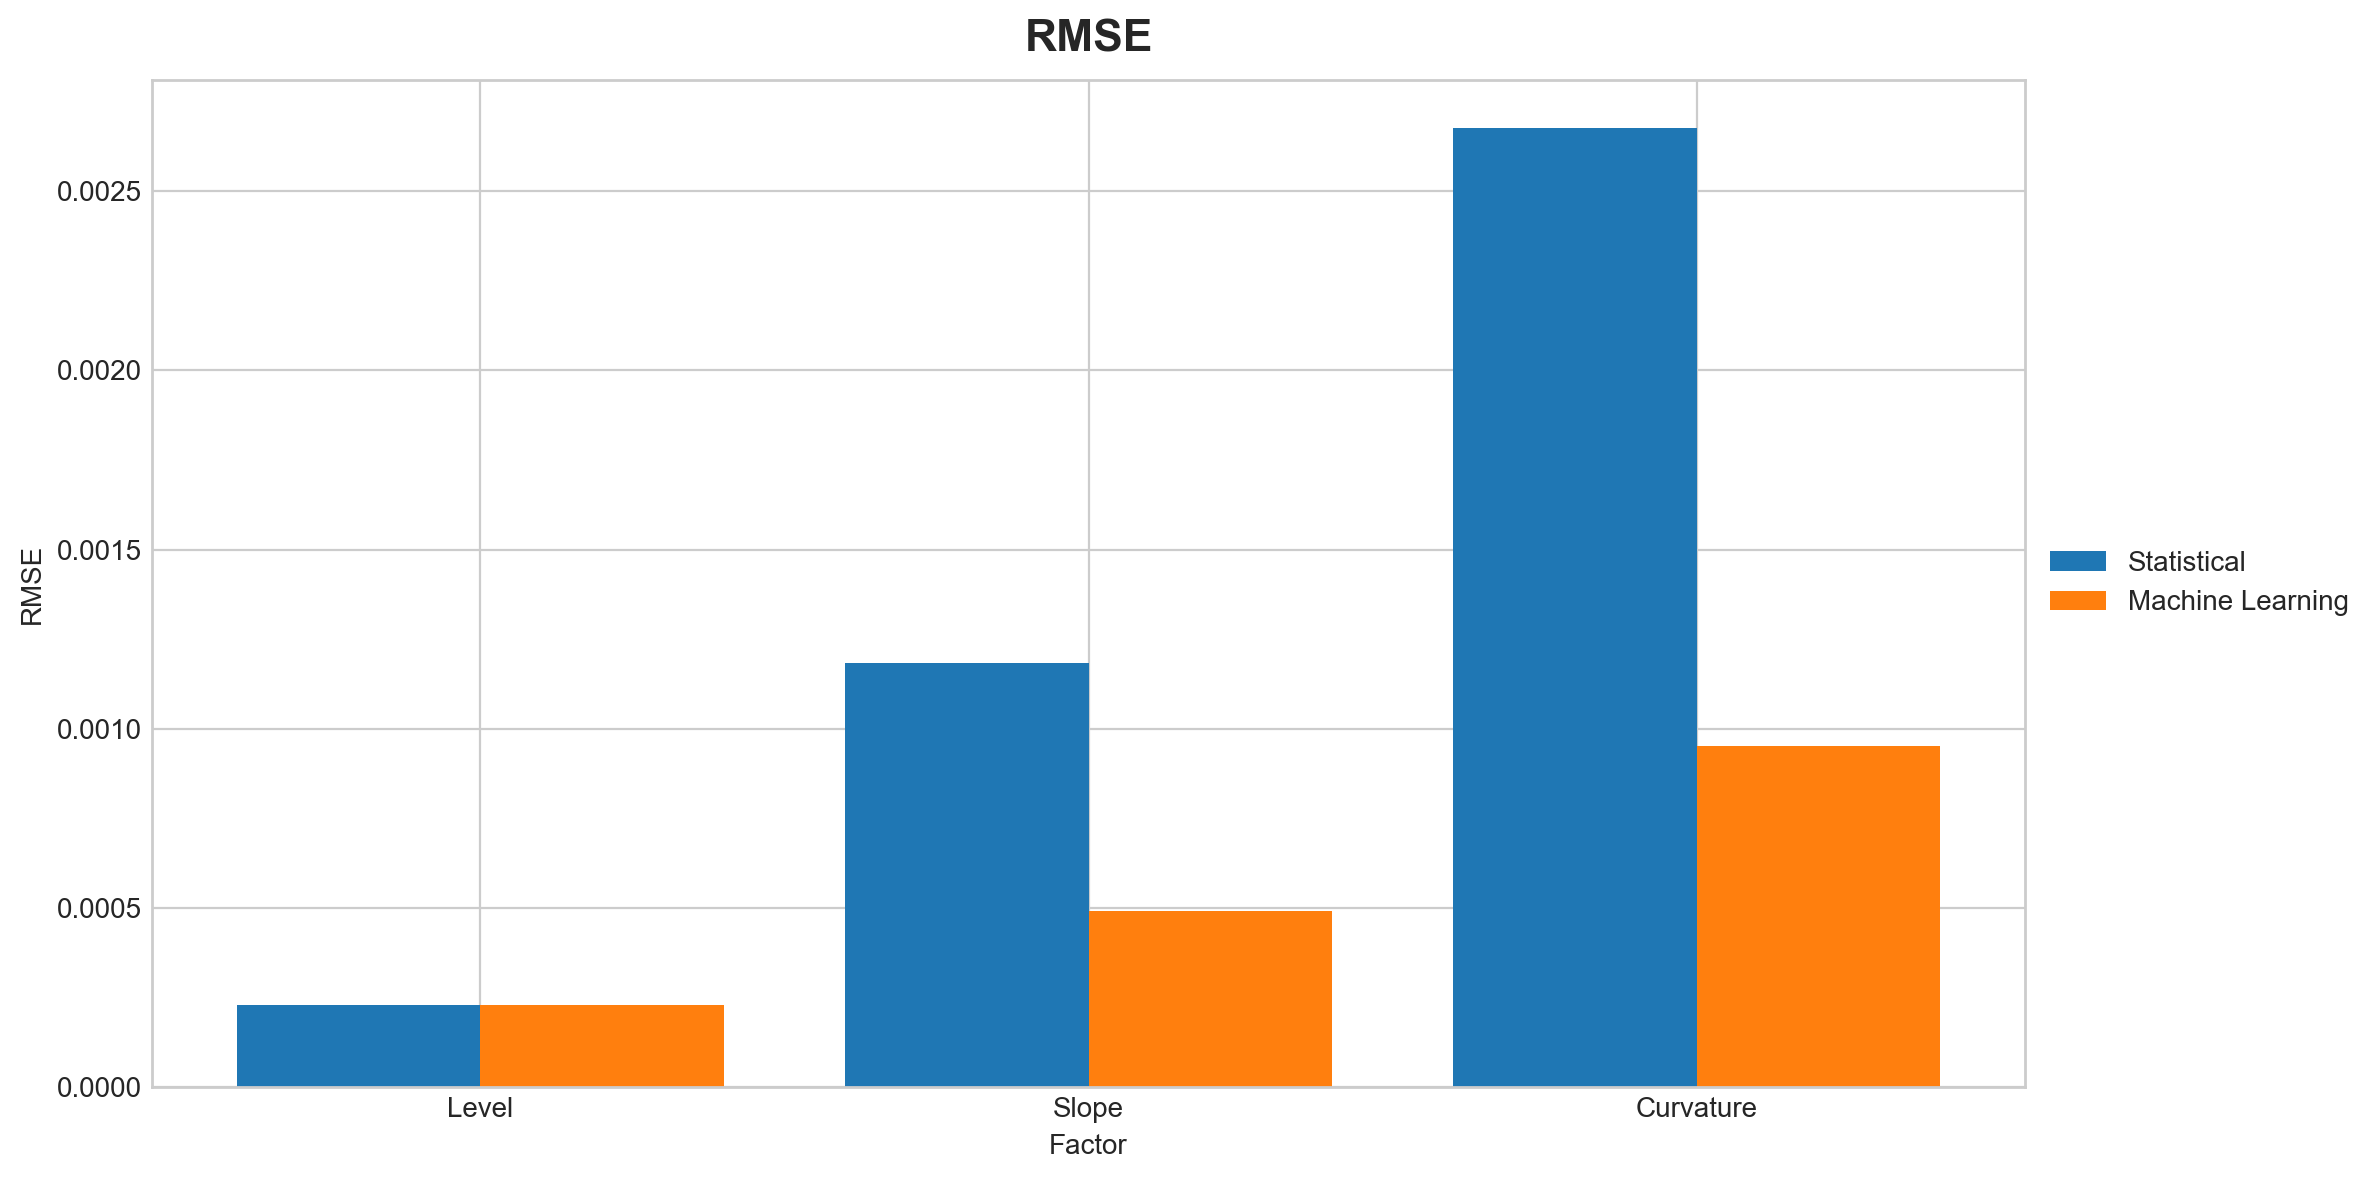

In [43]:
rmse_dns_stats = [dns_stats_beta0_indicator_list[2], dns_stats_beta1_indicator_list[2], dns_stats_beta2_indicator_list[2]]
mape_dns_ml = [dns_ml_beta0_indicator_list[2], dns_ml_beta1_indicator_list[2], dns_ml_beta2_indicator_list[2]]
plot_model_indicator(rmse_dns_stats, mape_dns_ml, 2, "RMSE")

## 2.关键期限预测-DNS

比较统计学方法跟机器学习方法

In [44]:
# 加载nelson siegel svensson模型代码
%run ../src/nelson_siegel_svensson/__init__.py
%run ../src/nelson_siegel_svensson/calibrate.py
%run ../src/nelson_siegel_svensson/cli.py
%run ../src/nelson_siegel_svensson/ns.py
%run ../src/nelson_siegel_svensson/nss.py

Usage: cli.py [OPTIONS] COMMAND [ARGS]...

  Commandline interface for nelson_siegel_svensson.

Options:
  --help  Show this message and exit.

Commands:
  calibrate  Calibrate a curve to the given data points.
  evaluate   Evaluate a curve at given points.
  plot       Plot a curve at given points.


<Figure size 1100x400 with 0 Axes>

In [45]:
# 获取真实值
actual_dns_ytm_df = pd.read_csv(actual_dns_ytm_file)
actual_dns_ytm_df['Date'] = pd.to_datetime(actual_dns_ytm_df['Date'])
actual_dns_ytm_df

# 获取模型值
model_dns_ytm_df = pd.read_csv(model_dns_ytm_file)
model_dns_ytm_df['Date'] = pd.to_datetime(model_dns_ytm_df['Date'])

print(actual_dns_ytm_df.shape, model_dns_ytm_df.shape)

(2744, 15) (2744, 15)


In [46]:
# 对其数据
new_actual_dns_ytm_df = datetime_df.merge(actual_dns_ytm_df, on ='Date')
new_actual_dns_ytm_df

new_model_dns_ytm_df = datetime_df.merge(model_dns_ytm_df, on ='Date')
new_model_dns_ytm_df

new_model_dns_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2020-11-27,3.005351,2.979538,2.975980,3.012710,3.070572,3.137739,3.207119,3.274636,3.338114,3.396549,3.449641,3.644097,3.757759,3.876297
1,2020-11-30,2.927593,2.898929,2.893310,2.931113,2.991781,3.062615,3.135986,3.207503,3.274810,3.336814,3.393177,3.599766,3.720588,3.846612
2,2020-12-01,2.881114,2.870663,2.890720,2.944066,3.013692,3.089256,3.164683,3.236601,3.303322,3.364180,3.419109,3.618296,3.733863,3.854135
3,2020-12-02,2.899948,2.895353,2.922761,2.979484,3.050047,3.125095,3.199191,3.269362,3.334168,3.393091,3.446152,3.637890,3.748839,3.864221
4,2020-12-03,2.921721,2.912862,2.933844,2.986187,3.053762,3.126770,3.199472,3.268689,3.332842,3.391317,3.444069,3.635218,3.746057,3.861391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2022-12-26,2.180359,2.243047,2.358972,2.461774,2.551816,2.630083,2.697821,2.756338,2.806888,2.850613,2.888526,3.017419,3.088455,3.161289
520,2022-12-27,2.204023,2.271169,2.392231,2.496784,2.586553,2.663396,2.729111,2.785347,2.833564,2.875023,2.910800,3.031452,3.097489,3.165058
521,2022-12-28,2.224025,2.287330,2.402763,2.503654,2.591071,2.666432,2.731239,2.786944,2.834874,2.876203,2.911948,3.032954,3.099403,3.167461
522,2022-12-29,2.152341,2.223857,2.351752,2.461236,2.554598,2.634087,2.701774,2.759500,2.808858,2.851204,2.887682,3.010322,3.077271,3.145718


In [47]:
# 获取统计方法获取DNS因子的预测值
pred_stats_ytm_df = pd.DataFrame(columns= model_dns_ytm_df.columns)

tau = actual_dns_df['Tau'].unique()[0]
time_list = [0.50, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']
    
for i in range(pred_stats_dns_df.shape[0]):
    date = pred_stats_dns_df['Date'][i]
    beta0 = pred_stats_dns_df['Beta0'][i]
    beta1 = pred_stats_dns_df['Beta1'][i]
    beta2 = pred_stats_dns_df['Beta2'][i]
    
    #print(beta0, beta1, beta2, tau)
    curve = NelsonSiegelCurve(beta0, beta1, beta2, tau)
    
    model_value_list = [date]
    for temp_time in time_list:
        temp_time_value = curve(temp_time) * 100
        model_value_list.append(temp_time_value)
        
    pred_stats_ytm_df.loc[len(pred_stats_ytm_df.index)] = model_value_list
    
pred_stats_ytm_df   

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2020-11-27,3.076482,3.039043,3.017532,3.041545,3.090328,3.150960,3.215586,3.279605,3.340476,3.396939,3.448515,3.638938,3.750899,3.867853
1,2020-11-30,3.101676,3.069700,3.054225,3.079917,3.127807,3.186108,3.247682,3.308366,3.365881,3.419116,3.467670,3.646536,3.751530,3.861156
2,2020-12-01,2.748251,2.733173,2.751040,2.808192,2.884855,2.968966,3.053411,3.134213,3.209351,3.277998,3.340030,3.565377,3.696296,3.832599
3,2020-12-02,3.004357,2.958683,2.928177,2.949840,3.000192,3.064567,3.134021,3.203281,3.269405,3.330910,3.387200,3.595620,3.718416,3.846761
4,2020-12-03,2.947489,2.921462,2.918896,2.957761,3.018298,3.088322,3.160527,3.230724,3.296679,3.357367,3.412488,3.614283,3.732195,3.855152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2022-12-26,2.234947,2.298862,2.414959,2.516021,2.603320,2.678402,2.742850,2.798165,2.845705,2.886659,2.922053,3.041723,3.107368,3.174579
520,2022-12-27,2.217117,2.280725,2.396642,2.497894,2.585584,2.661153,2.726122,2.781954,2.829984,2.871394,2.907205,3.028412,3.094961,3.163118
521,2022-12-28,2.201168,2.272411,2.399209,2.507187,2.598884,2.676699,2.742787,2.799030,2.847038,2.888169,2.923561,3.042320,3.107044,3.173182
522,2022-12-29,2.343606,2.354607,2.396593,2.453366,2.515678,2.578107,2.637648,2.692799,2.742966,2.788088,2.828399,2.972284,3.054764,3.140311


In [48]:
# 获取统计方法获取DNS因子的预测值
pred_ml_ytm_df = pd.DataFrame(columns= model_dns_ytm_df.columns)

tau = actual_dns_df['Tau'].unique()[0]
time_list = [0.50, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']
    
for i in range(pred_ml_dns_df.shape[0]):
    date = pred_ml_dns_df['Date'][i]
    beta0 = pred_ml_dns_df['Beta0'][i]
    beta1 = pred_ml_dns_df['Beta1'][i]
    beta2 = pred_ml_dns_df['Beta2'][i]
    
    #print(beta0, beta1, beta2, tau)
    curve = NelsonSiegelCurve(beta0, beta1, beta2, tau)
    
    model_value_list = [date]
    for temp_time in time_list:
        temp_time_value = curve(temp_time) * 100
        model_value_list.append(temp_time_value)
        
    pred_ml_ytm_df.loc[len(pred_ml_ytm_df.index)] = model_value_list
    
pred_ml_ytm_df 

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2020-11-27,3.006956,2.990334,2.998379,3.040531,3.100004,3.166512,3.233949,3.298861,3.359461,3.414975,3.465239,3.648374,3.755005,3.866090
1,2020-11-30,2.973835,2.957235,2.966096,3.009674,3.070847,3.139131,3.208302,3.274846,3.336946,3.393820,3.445305,3.632839,3.742009,3.855731
2,2020-12-01,2.967591,2.951819,2.961871,3.006193,3.067819,3.136365,3.205675,3.272281,3.334393,3.391251,3.442703,3.630017,3.739015,3.852545
3,2020-12-02,2.960479,2.935621,2.933773,2.971970,3.031082,3.099315,3.169603,3.237895,3.302036,3.361040,3.414622,3.610726,3.725289,3.844747
4,2020-12-03,2.962044,2.945266,2.954175,2.998134,3.059861,3.128768,3.198575,3.265733,3.328406,3.385807,3.437769,3.627044,3.737228,3.852007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2022-12-26,2.208552,2.268857,2.380833,2.480547,2.568150,2.644472,2.710643,2.767886,2.817388,2.860244,2.897428,3.023987,3.093804,3.165409
520,2022-12-27,2.181367,2.243791,2.359415,2.462117,2.552179,2.630534,2.698396,2.757052,2.807744,2.851606,2.889648,3.019039,3.090377,3.163529
521,2022-12-28,2.186029,2.246115,2.358277,2.458691,2.547253,2.624633,2.691873,2.750139,2.800595,2.844324,2.882296,3.011725,3.083210,3.156553
522,2022-12-29,2.174738,2.244291,2.369579,2.477675,2.570417,2.649757,2.717577,2.775592,2.825320,2.868068,2.904951,3.029288,3.097324,3.166931


In [49]:
# 比较统计模型跟机器学习模型
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']


stats_mae_list = []
stats_mape_list = []
stats_rmse_list = []

ml_mae_list = []
ml_mape_list = []
ml_rmse_list = []

for tenor in tenor_list:
    actual_value = new_actual_dns_ytm_df[tenor]
    pred_stats_value = pred_stats_ytm_df[tenor]
    pred_ml_value = pred_ml_ytm_df[tenor]
    
    
    pred_stats_mae = mae(actual_value, pred_stats_value)
    pred_ml_mae = mae(actual_value, pred_ml_value)
    
    pred_stats_mape = mape(actual_value, pred_stats_value)
    pred_ml_mape = mape(actual_value, pred_ml_value)
    
    pred_stats_rmse = rmse(actual_value, pred_stats_value)
    pred_ml_rmse = rmse(actual_value, pred_ml_value)
    
    
    stats_mae_list.append(pred_stats_mae)
    stats_mape_list.append(pred_stats_mape)
    stats_rmse_list.append(pred_stats_rmse)
    
    ml_mae_list.append(pred_ml_mae)
    ml_mape_list.append(pred_ml_mape)
    ml_rmse_list.append(pred_ml_rmse)
    
    


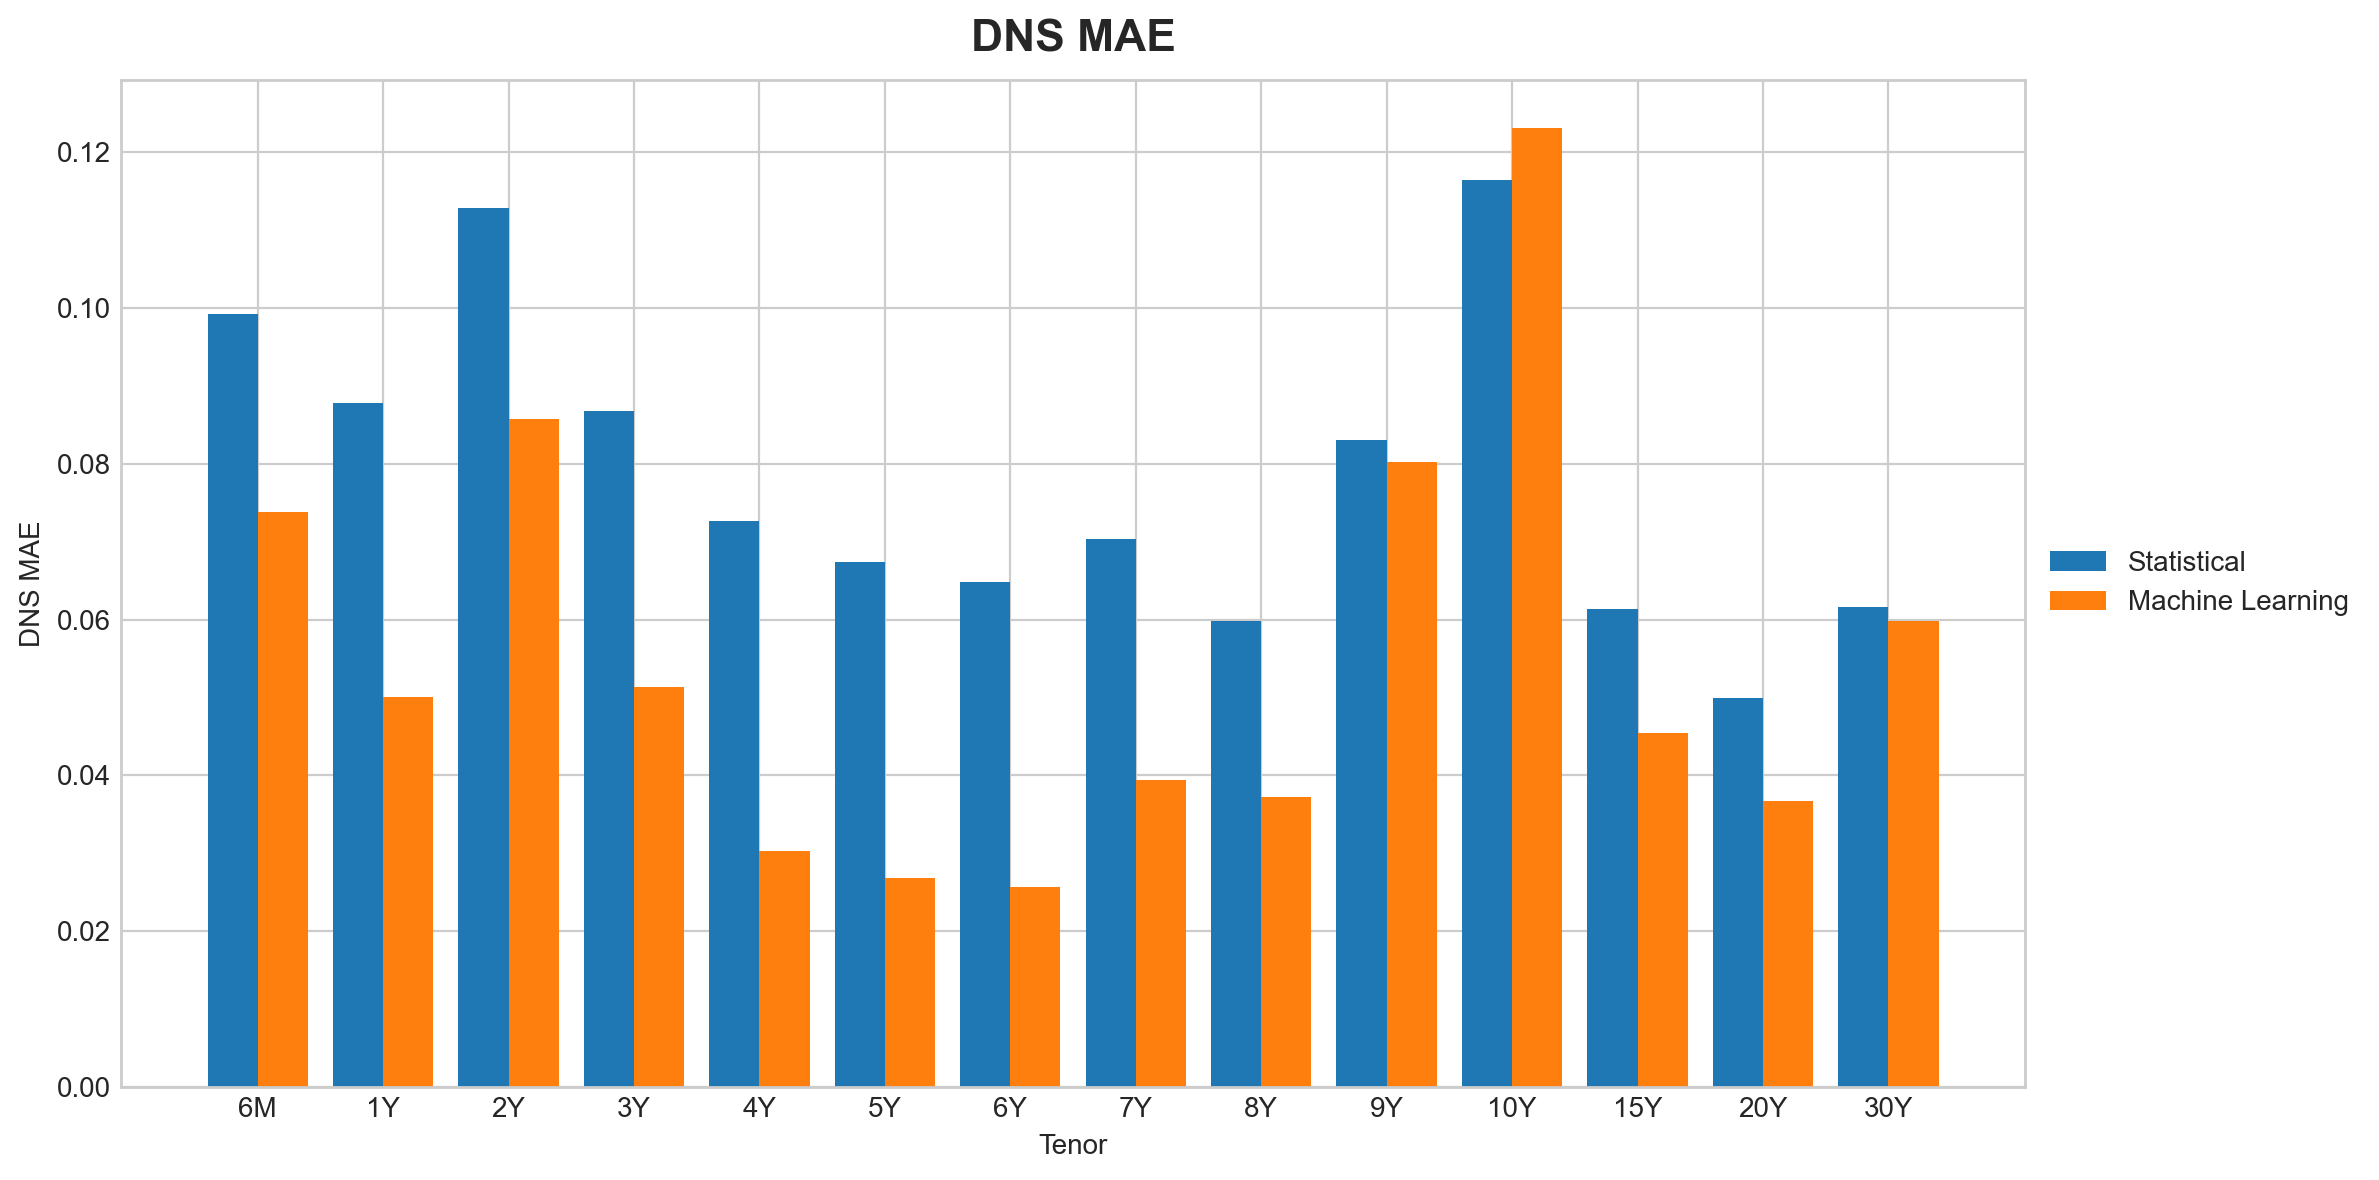

In [50]:
# 可视化


def plot_model_pred(data_list, label):
    fig, ax = plt.subplots(figsize=(12, 6))
    tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
                  '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

    totalWidth=0.8 # 一组柱状体的宽度
    labelNums=2 # 一组有两种类别
    barWidth=totalWidth/labelNums # 单个柱体的宽度
    seriesNums=len(tenor_list) # 一共有多少组

    ax.bar([x for x in range(seriesNums)], data_list[0], label="Statistical", width=barWidth)
    ax.bar([x+1*barWidth for x in range(seriesNums)], data_list[1], label="Machine Learning", width=barWidth)


    plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
    plt.xlabel("Tenor")
    plt.ylabel(label)
    plt.title(label)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
plot_model_pred(data_list= [stats_mae_list, ml_mae_list], label="DNS MAE")

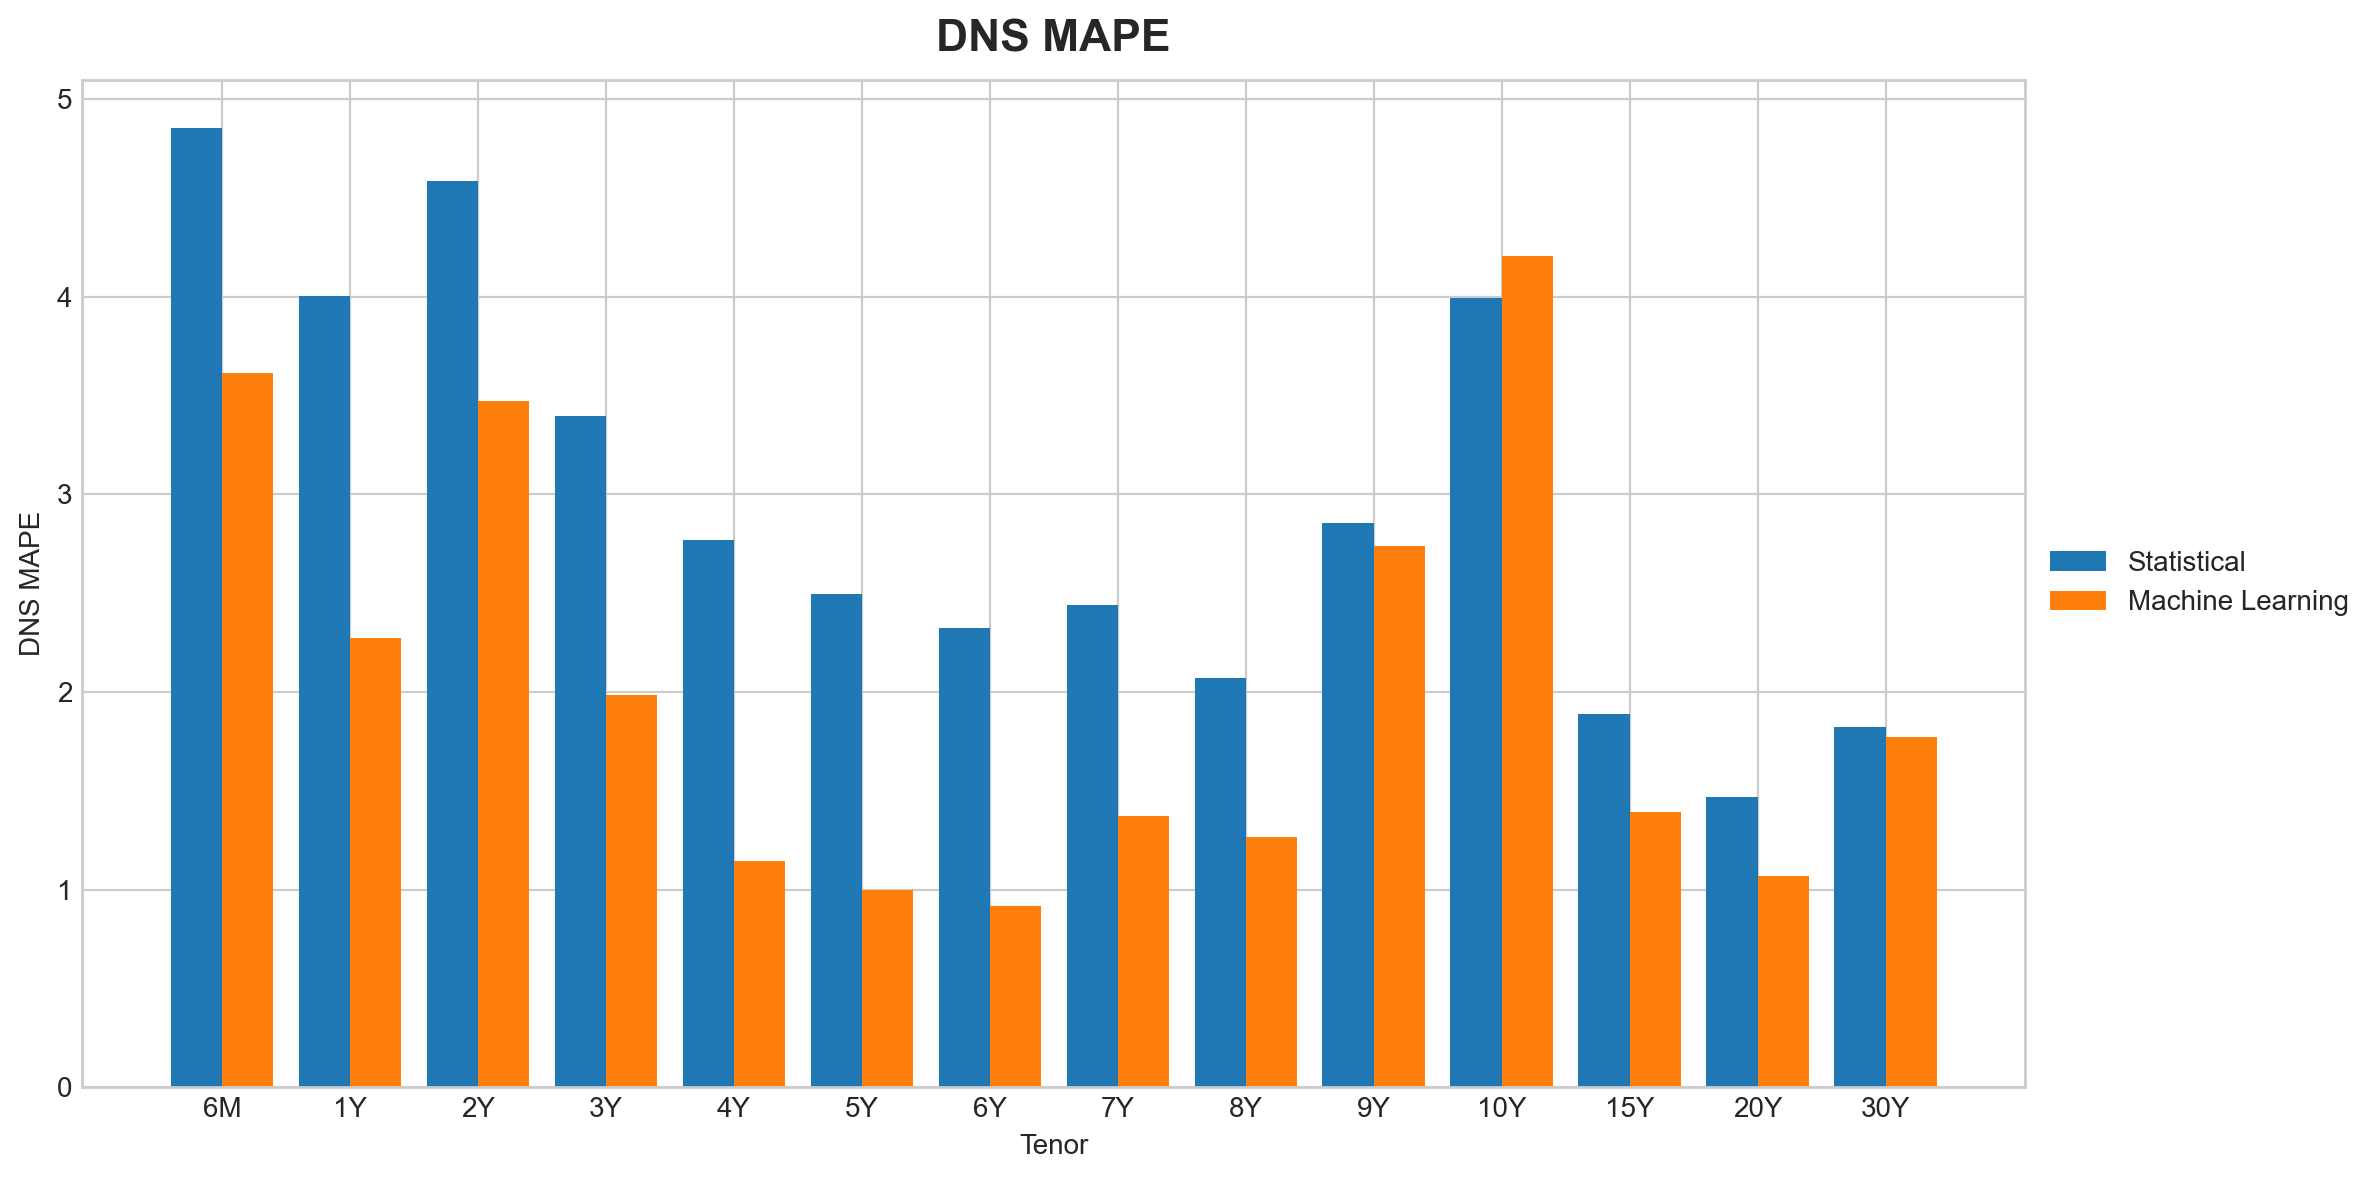

In [51]:
plot_model_pred(data_list= [stats_mape_list, ml_mape_list], label="DNS MAPE")

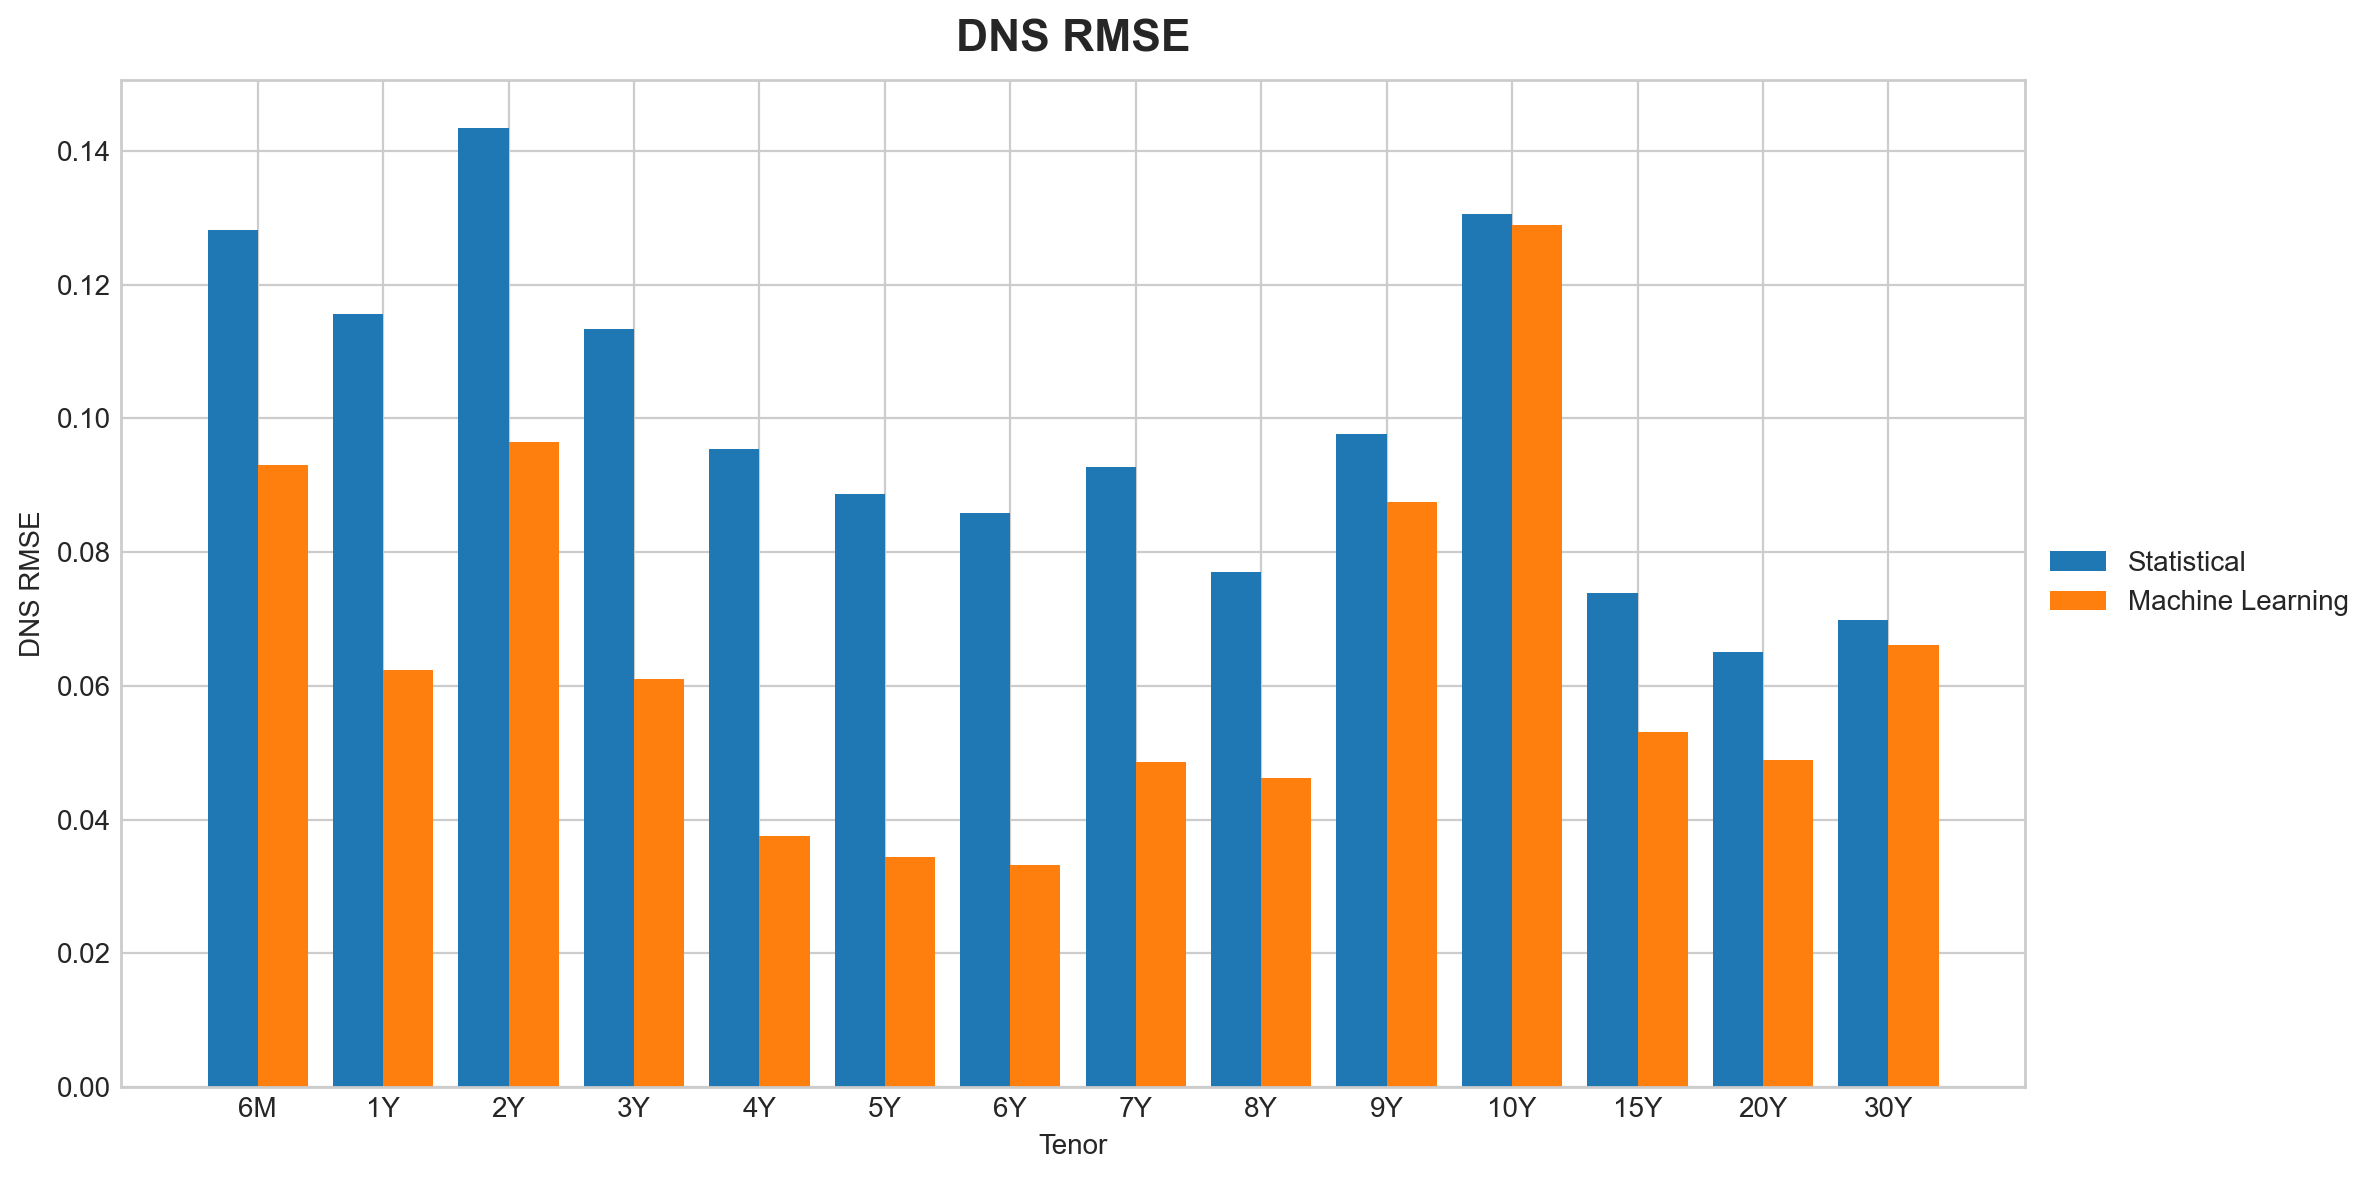

In [52]:
plot_model_pred(data_list= [stats_rmse_list, ml_rmse_list], label="DNS RMSE")

In [53]:
# 数据保存
pred_stats_ytm_df.to_csv("./data/CN_DNS_Pred_Stats_Yield_6M.csv", index=False, encoding="utf-8-sig")

In [54]:
# 数据保存
pred_ml_ytm_df.to_csv("./data/CN_DNS_Pred_ML_Yield_6M.csv", index=False, encoding="utf-8-sig")

In [55]:
pred_stats_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2020-11-27,3.076482,3.039043,3.017532,3.041545,3.090328,3.150960,3.215586,3.279605,3.340476,3.396939,3.448515,3.638938,3.750899,3.867853
1,2020-11-30,3.101676,3.069700,3.054225,3.079917,3.127807,3.186108,3.247682,3.308366,3.365881,3.419116,3.467670,3.646536,3.751530,3.861156
2,2020-12-01,2.748251,2.733173,2.751040,2.808192,2.884855,2.968966,3.053411,3.134213,3.209351,3.277998,3.340030,3.565377,3.696296,3.832599
3,2020-12-02,3.004357,2.958683,2.928177,2.949840,3.000192,3.064567,3.134021,3.203281,3.269405,3.330910,3.387200,3.595620,3.718416,3.846761
4,2020-12-03,2.947489,2.921462,2.918896,2.957761,3.018298,3.088322,3.160527,3.230724,3.296679,3.357367,3.412488,3.614283,3.732195,3.855152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2022-12-26,2.234947,2.298862,2.414959,2.516021,2.603320,2.678402,2.742850,2.798165,2.845705,2.886659,2.922053,3.041723,3.107368,3.174579
520,2022-12-27,2.217117,2.280725,2.396642,2.497894,2.585584,2.661153,2.726122,2.781954,2.829984,2.871394,2.907205,3.028412,3.094961,3.163118
521,2022-12-28,2.201168,2.272411,2.399209,2.507187,2.598884,2.676699,2.742787,2.799030,2.847038,2.888169,2.923561,3.042320,3.107044,3.173182
522,2022-12-29,2.343606,2.354607,2.396593,2.453366,2.515678,2.578107,2.637648,2.692799,2.742966,2.788088,2.828399,2.972284,3.054764,3.140311


## 3.关键期限预测-AFNS

In [56]:


# 获取实际利率
actual_afns_ytm_df = pd.read_csv(actual_afns_ytm_file)
actual_afns_ytm_df['Date'] = pd.to_datetime(actual_afns_ytm_df['Date'])



actual_afns_ytm_df = datetime_df.merge(actual_afns_ytm_df, on ='Date')
actual_afns_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2020-11-27,2.9747,2.9469,3.0330,3.0675,3.1006,3.1338,3.2277,3.3215,3.3126,3.3036,3.2947,3.6925,3.8189,3.8981
1,2020-11-30,2.9050,2.8606,2.9442,2.9856,3.0217,3.0579,3.1567,3.2555,3.2508,3.2460,3.2413,3.6485,3.7863,3.8605
2,2020-12-01,2.8360,2.8463,2.9625,3.0055,3.0419,3.0783,3.1776,3.2769,3.2744,3.2720,3.2695,3.6712,3.7952,3.8764
3,2020-12-02,2.8525,2.8660,2.9998,3.0479,3.0842,3.1205,3.2099,3.2994,3.2972,3.2950,3.2928,3.7012,3.8123,3.8869
4,2020-12-03,2.8750,2.8775,3.0163,3.0535,3.0928,3.1320,3.2098,3.2875,3.2892,3.2908,3.2925,3.6935,3.8248,3.8790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2022-12-26,2.1778,2.2398,2.3669,2.4616,2.5396,2.6175,2.7175,2.8175,2.8249,2.8324,2.8398,2.9777,3.0579,3.2225
520,2022-12-27,2.2125,2.2615,2.3889,2.4898,2.5777,2.6656,2.7526,2.8395,2.8475,2.8556,2.8636,3.0014,3.0676,3.2182
521,2022-12-28,2.2398,2.2732,2.4056,2.4746,2.5771,2.6795,2.7595,2.8395,2.8496,2.8598,2.8699,3.0078,3.0679,3.2125
522,2022-12-29,2.1737,2.1952,2.3605,2.4405,2.5415,2.6425,2.7314,2.8202,2.8255,2.8309,2.8362,2.9741,3.0459,3.2021


In [57]:
afns_pred_stats_ytm_df = pd.read_csv(pred_stats_afns_ytm_file)
afns_pred_stats_ytm_df['Date'] = pd.to_datetime(afns_pred_stats_ytm_df['Date'])
afns_pred_stats_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2020-11-27,2.939904,3.006568,3.112829,3.195150,3.263367,3.323602,3.379574,3.433455,3.486435,3.539091,3.591620,3.848081,4.073097,4.343887
1,2020-11-30,2.924820,2.984264,3.078397,3.151226,3.212127,3.266837,3.318753,3.369779,3.420881,3.472449,3.524527,3.784492,4.016831,4.301692
2,2020-12-01,2.450872,2.536687,2.678365,2.792614,2.889657,2.975957,3.055533,3.130823,3.203252,3.273603,3.342259,3.660926,3.926964,4.246044
3,2020-12-02,2.745552,2.815968,2.929846,3.019833,3.095663,3.163387,3.226665,3.287629,3.347439,3.406654,3.465459,3.749032,3.994702,4.292822
4,2020-12-03,2.883832,2.958735,3.079368,3.173626,3.251733,3.320141,3.382844,3.442248,3.499740,3.556062,3.611549,3.875718,4.102272,4.371019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2022-12-26,2.158278,2.272069,2.455452,2.595493,2.705556,2.794703,2.869099,2.932946,2.989121,3.039592,3.085709,3.274513,3.413859,3.539170
520,2022-12-27,2.123072,2.236273,2.418892,2.558629,2.668751,2.758242,2.833201,2.897780,2.954809,3.006223,3.053343,3.247413,3.391567,3.523990
521,2022-12-28,2.108610,2.226589,2.417387,2.563726,2.679137,2.772827,2.851082,2.918209,2.977170,3.030010,3.078140,3.273299,3.415489,3.542683
522,2022-12-29,1.948926,2.052255,2.219229,2.347936,2.450773,2.536001,2.609120,2.673785,2.732419,2.786619,2.837429,3.056910,3.228511,3.404866


In [58]:
afns_pred_ml_ytm_df = pd.read_csv(pred_ml_afns_ytm_file)
afns_pred_ml_ytm_df['Date'] = pd.to_datetime(afns_pred_ml_ytm_df['Date'])
afns_pred_ml_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2020-11-27,2.811958,2.883771,2.999519,3.090351,3.166215,3.233334,3.295513,3.354999,3.413051,3.470303,3.527005,3.799414,4.034801,4.317641
1,2020-11-30,2.805512,2.876910,2.992003,3.082379,3.157947,3.224899,3.287014,3.346519,3.404654,3.462039,3.518912,3.792465,4.029071,4.313850
2,2020-12-01,2.825975,2.897554,3.012861,3.103285,3.178772,3.245543,3.307399,3.366587,3.424363,3.481360,3.537826,3.809285,4.044011,4.326036
3,2020-12-02,2.779461,2.851667,2.968350,3.060269,3.137327,3.205709,3.269192,3.330000,3.389375,3.447935,3.505920,3.784166,4.024250,4.313542
4,2020-12-03,2.806376,2.879825,2.998469,3.091762,3.169717,3.238612,3.302299,3.363069,3.422211,3.480390,3.537881,3.812783,4.049290,4.332880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2022-12-26,2.100518,2.214552,2.398683,2.539752,2.651050,2.741581,2.817461,2.882857,2.940614,2.992676,3.040376,3.236567,3.382012,3.515838
520,2022-12-27,2.108869,2.222415,2.405676,2.545999,2.656655,2.746635,2.822041,2.887028,2.944432,2.996190,3.043626,3.238939,3.383936,3.517377
521,2022-12-28,2.109528,2.224697,2.410707,2.553213,2.665583,2.756888,2.833300,2.899030,2.956962,3.009074,3.056721,3.251771,3.395567,3.526474
522,2022-12-29,2.086151,2.200771,2.386002,2.528079,2.640301,2.731681,2.808341,2.874453,2.932869,2.985539,3.033799,3.232210,3.379178,3.514860


In [59]:
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']


afns_stats_mae_list = []
afns_stats_mape_list = []
afns_stats_rmse_list = []


afns_ml_mae_list = []
afns_ml_mape_list = []
afns_ml_rmse_list = []


for tenor in tenor_list:
    actual_value = actual_afns_ytm_df[tenor]
    afns_pred_stats_value = afns_pred_stats_ytm_df[tenor]
    afns_pred_ml_value = afns_pred_ml_ytm_df[tenor]
    
    
    afns_pred_stats_mae = mae(actual_value, afns_pred_stats_value)
    afns_pred_ml_mae = mae(actual_value, afns_pred_ml_value)
    
    afns_pred_stats_mape = mape(actual_value, afns_pred_stats_value)
    afns_pred_ml_mape = mape(actual_value, afns_pred_ml_value)
    
    afns_pred_stats_rmse = rmse(actual_value, afns_pred_stats_value)
    afns_pred_ml_rmse = rmse(actual_value, afns_pred_ml_value)
    
    afns_stats_mae_list.append(afns_pred_stats_mae)
    afns_stats_mape_list.append(afns_pred_stats_mape)
    afns_stats_rmse_list.append(afns_pred_stats_rmse)
    
    afns_ml_mae_list.append(afns_pred_ml_mae)
    afns_ml_mape_list.append(afns_pred_ml_mape)
    afns_ml_rmse_list.append(afns_pred_ml_rmse)

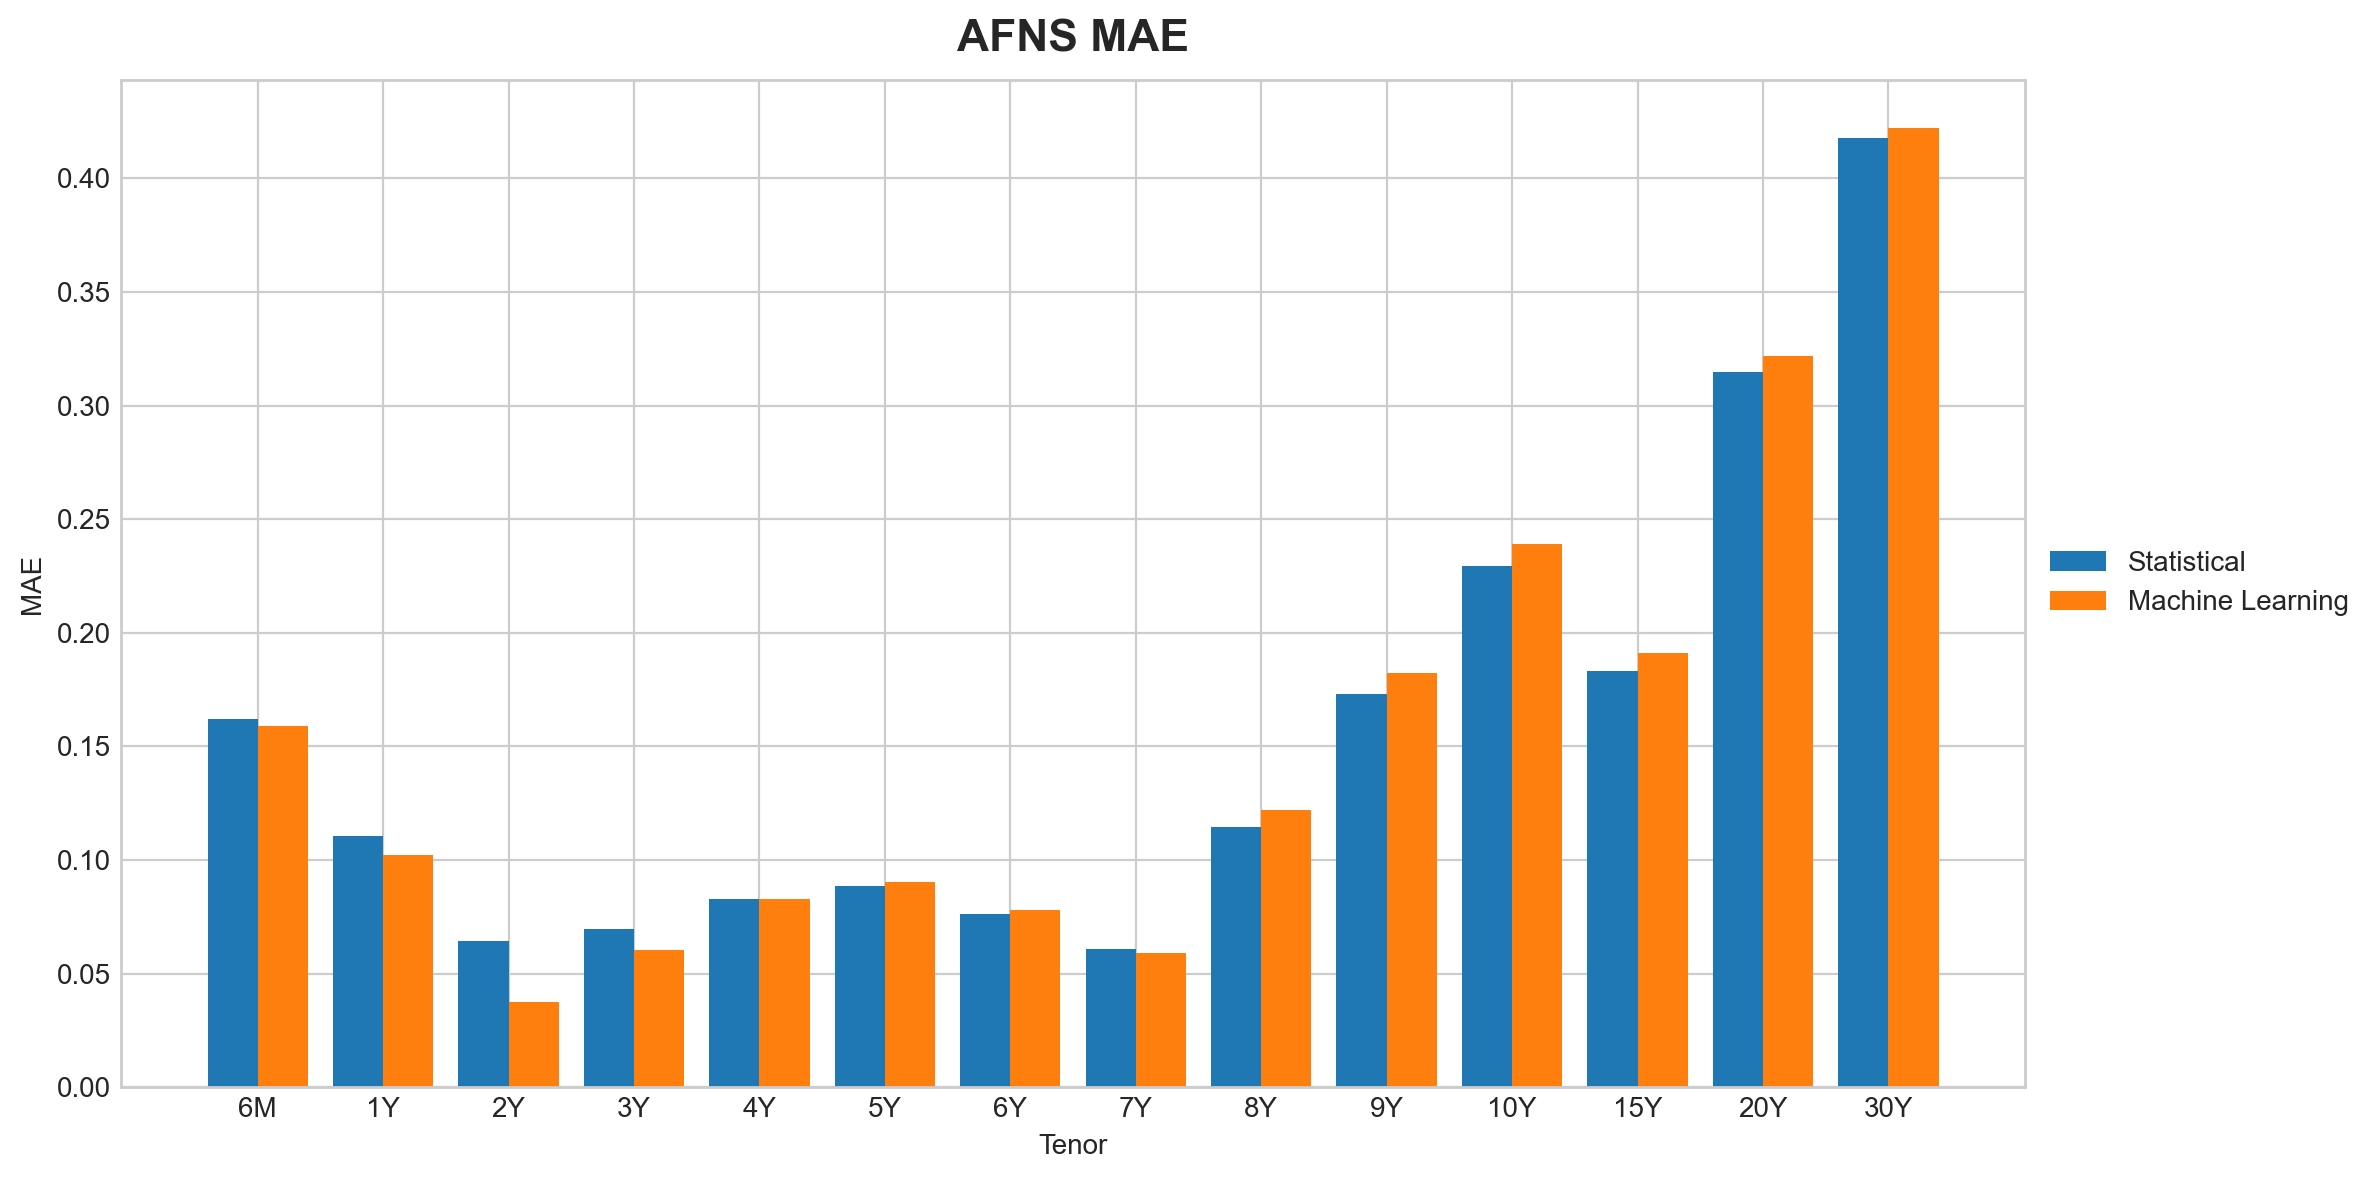

In [60]:
#plot_model_pred(data_list= [afns_model_mae_list, afns_stats_mae_list], label="MAE")

label="MAE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], afns_stats_mae_list, label="Statistical", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_mae_list, label="Machine Learning", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

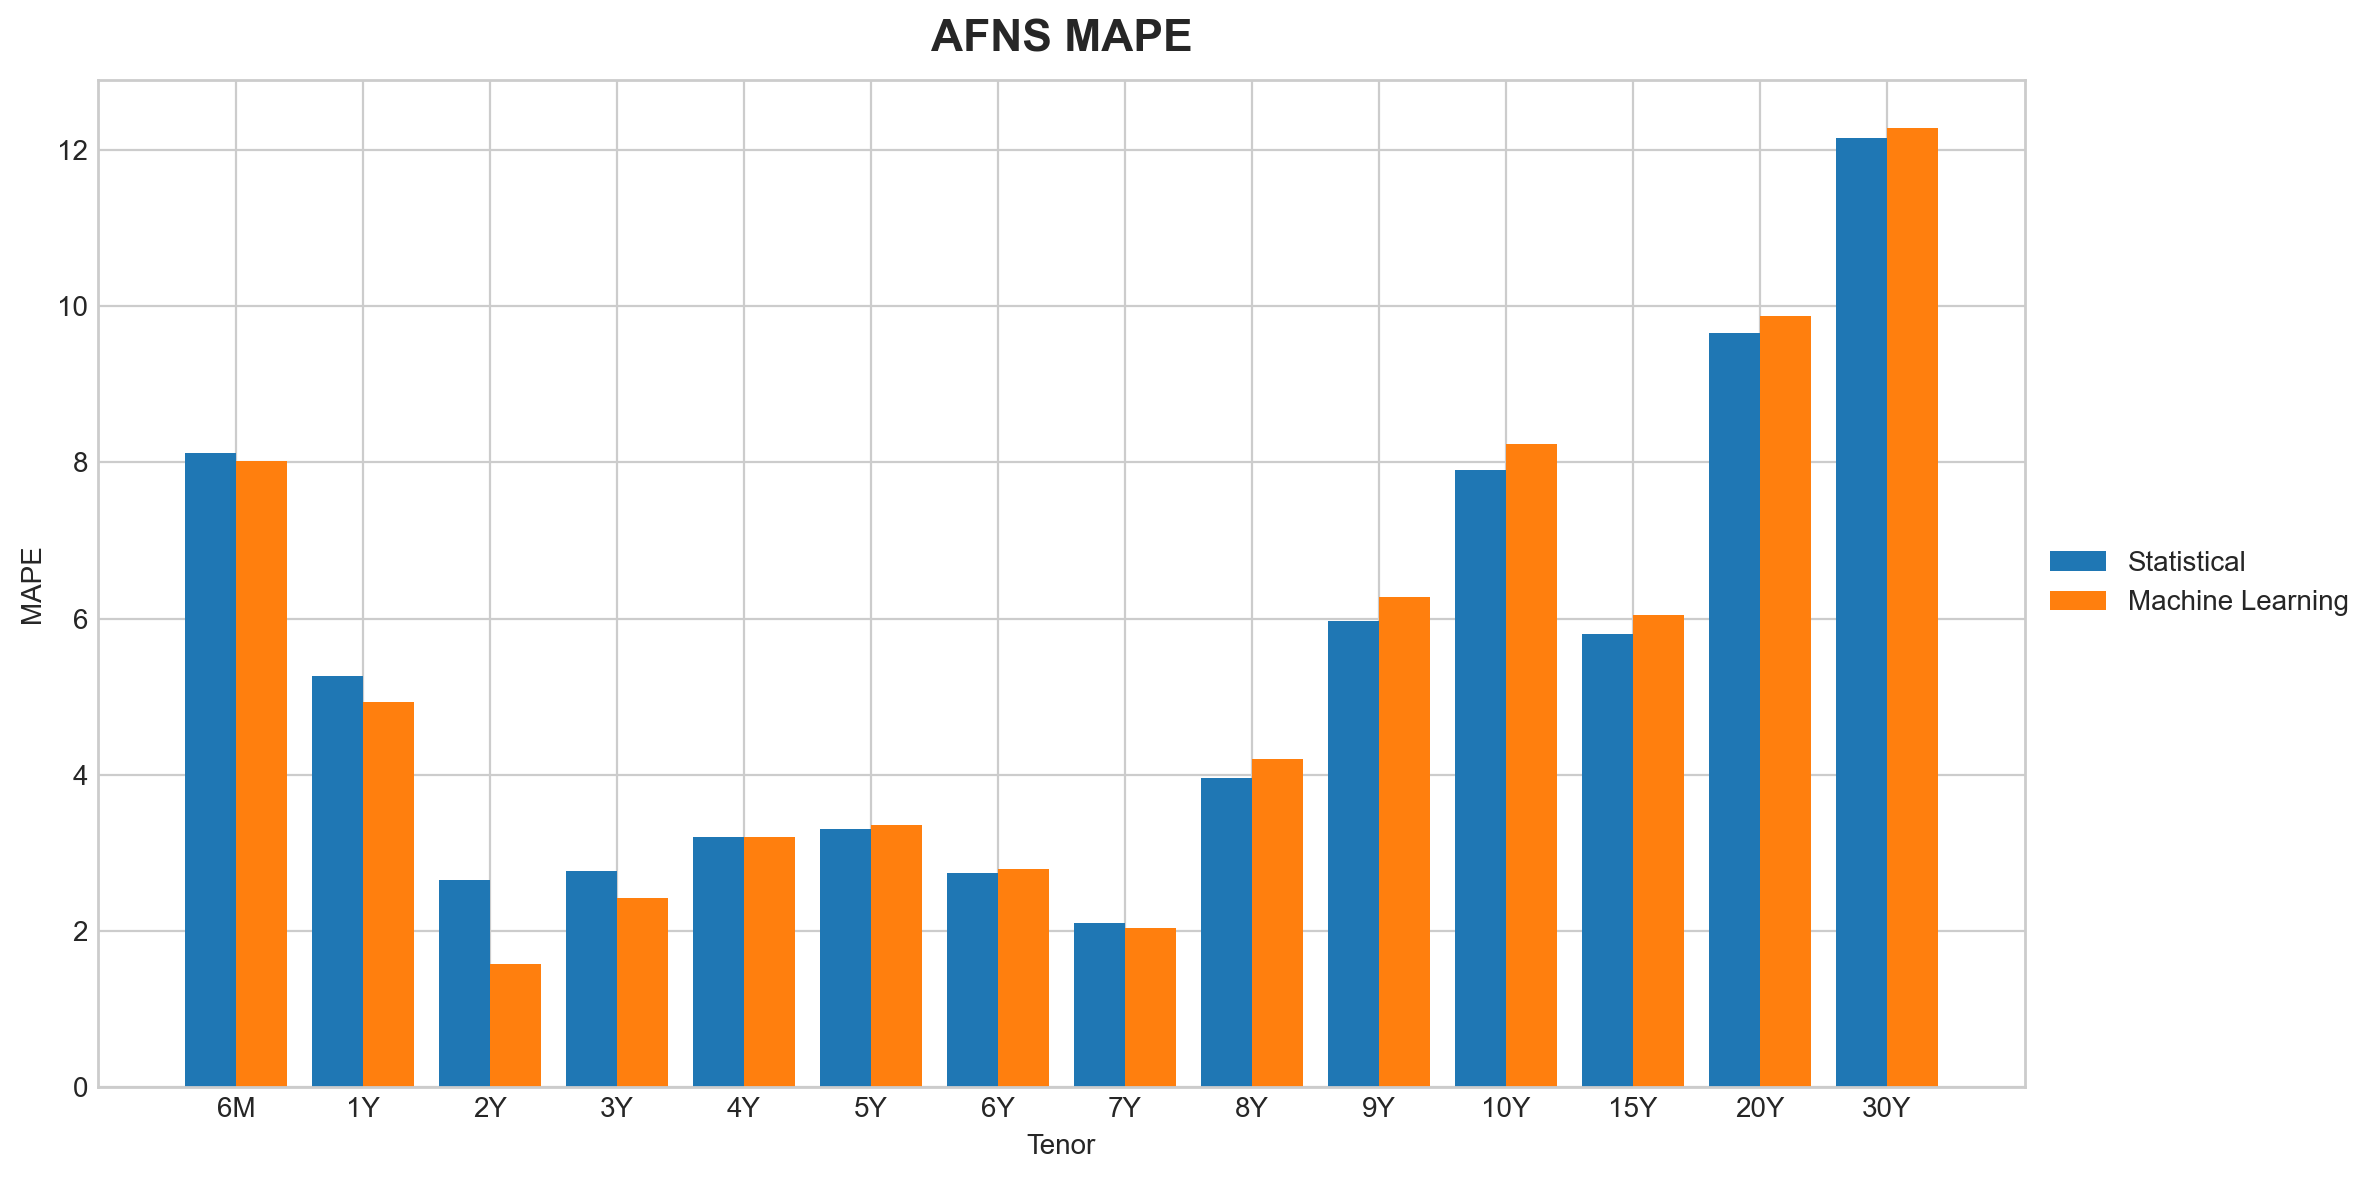

In [61]:
label="MAPE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], afns_stats_mape_list, label="Statistical", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_mape_list, label="Machine Learning", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

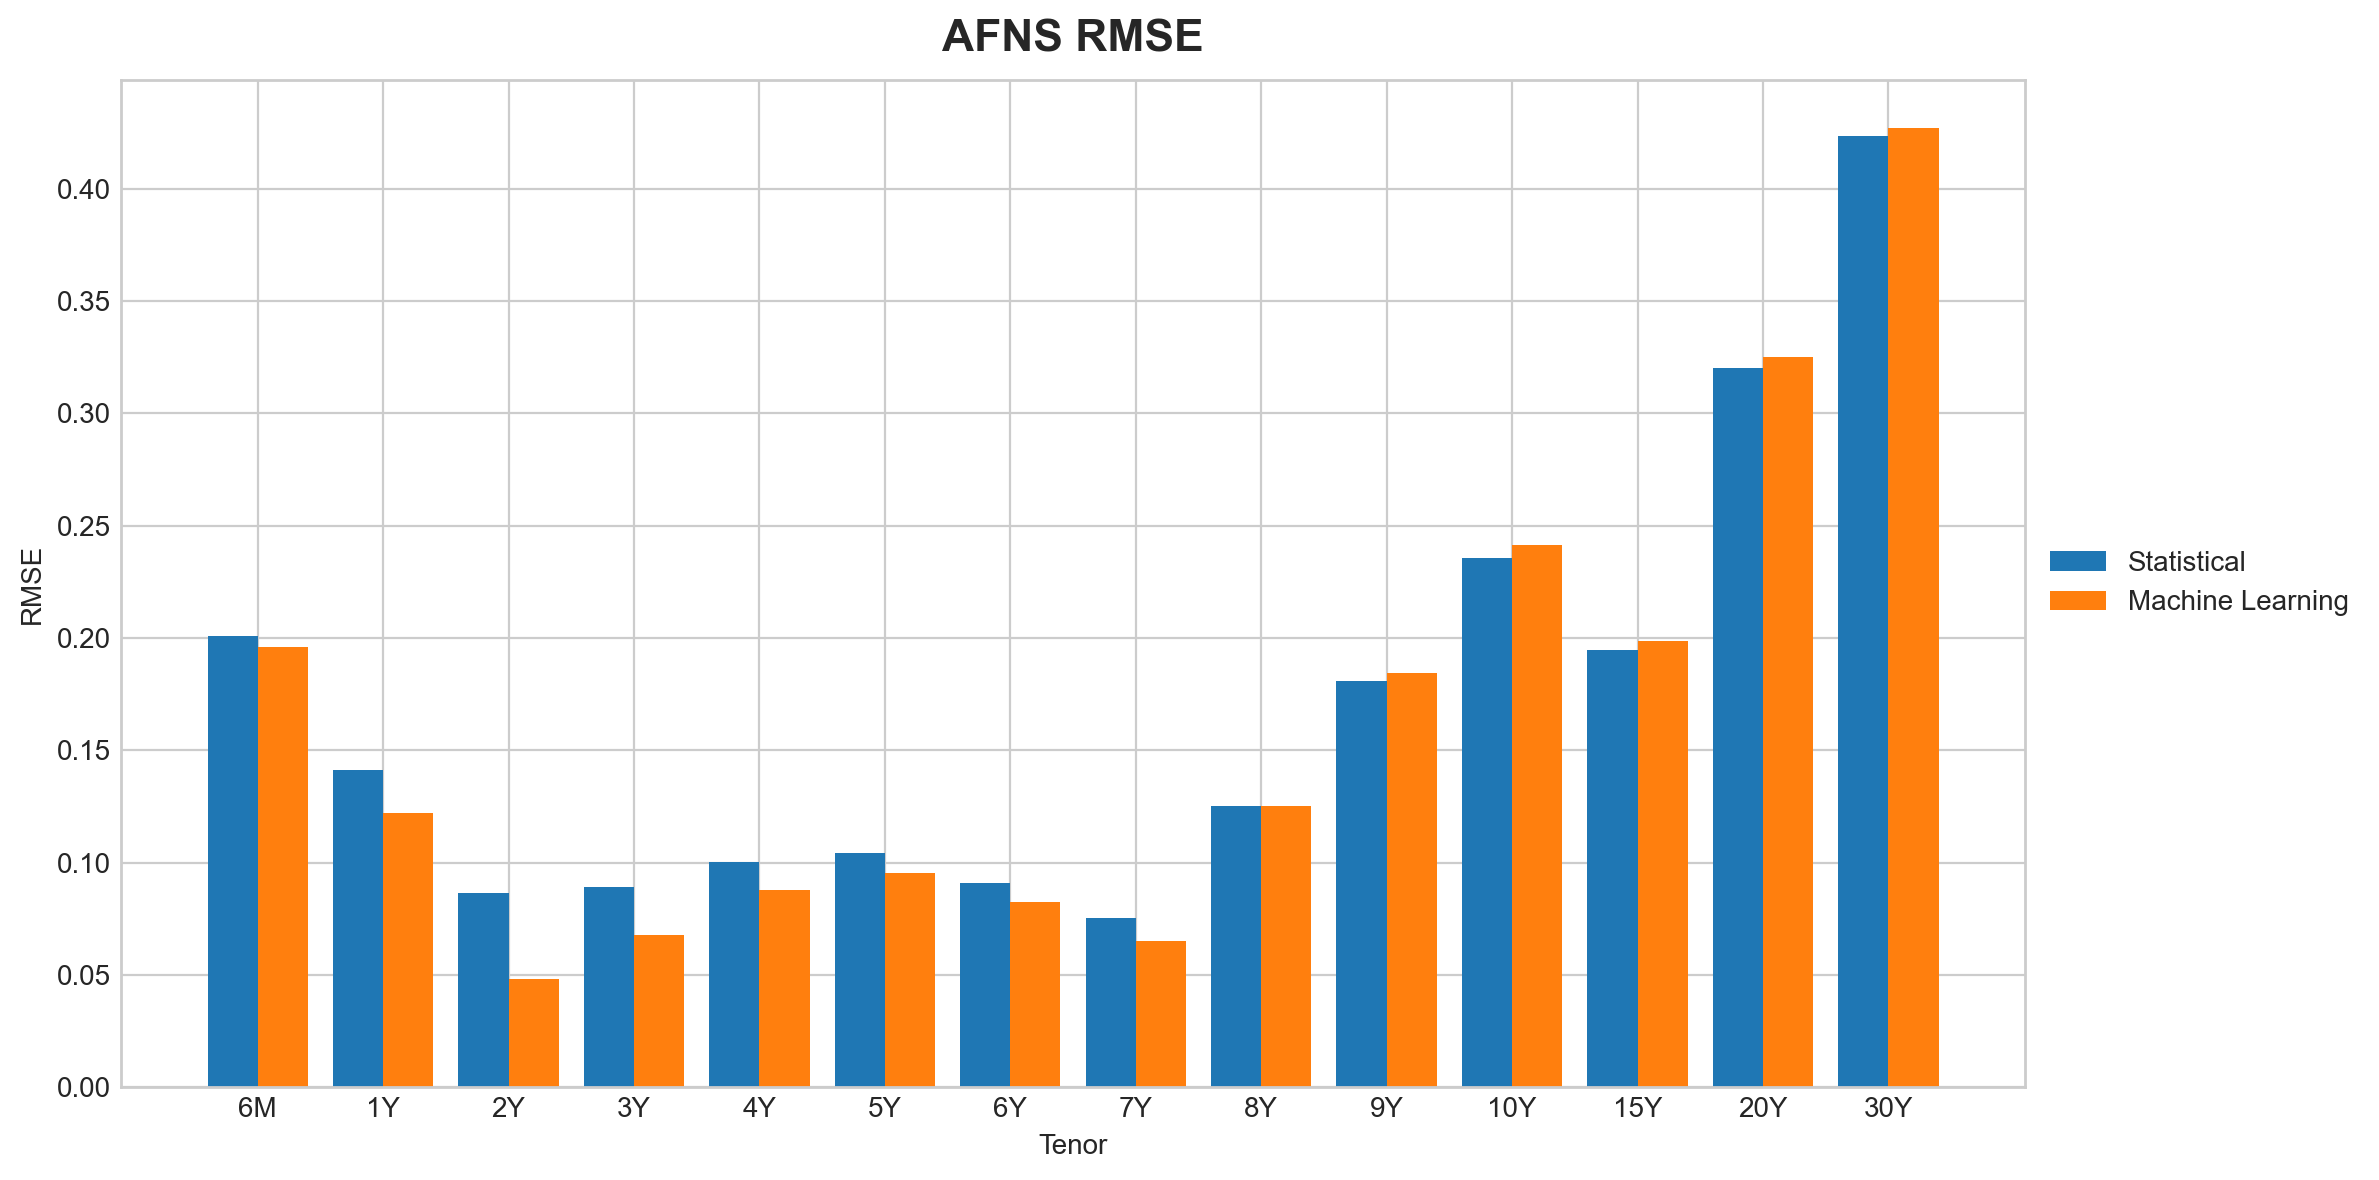

In [62]:
label="RMSE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], afns_stats_rmse_list, label="Statistical", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_rmse_list, label="Machine Learning", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## 比较DNS跟AFNS 预测效果-用机器学习

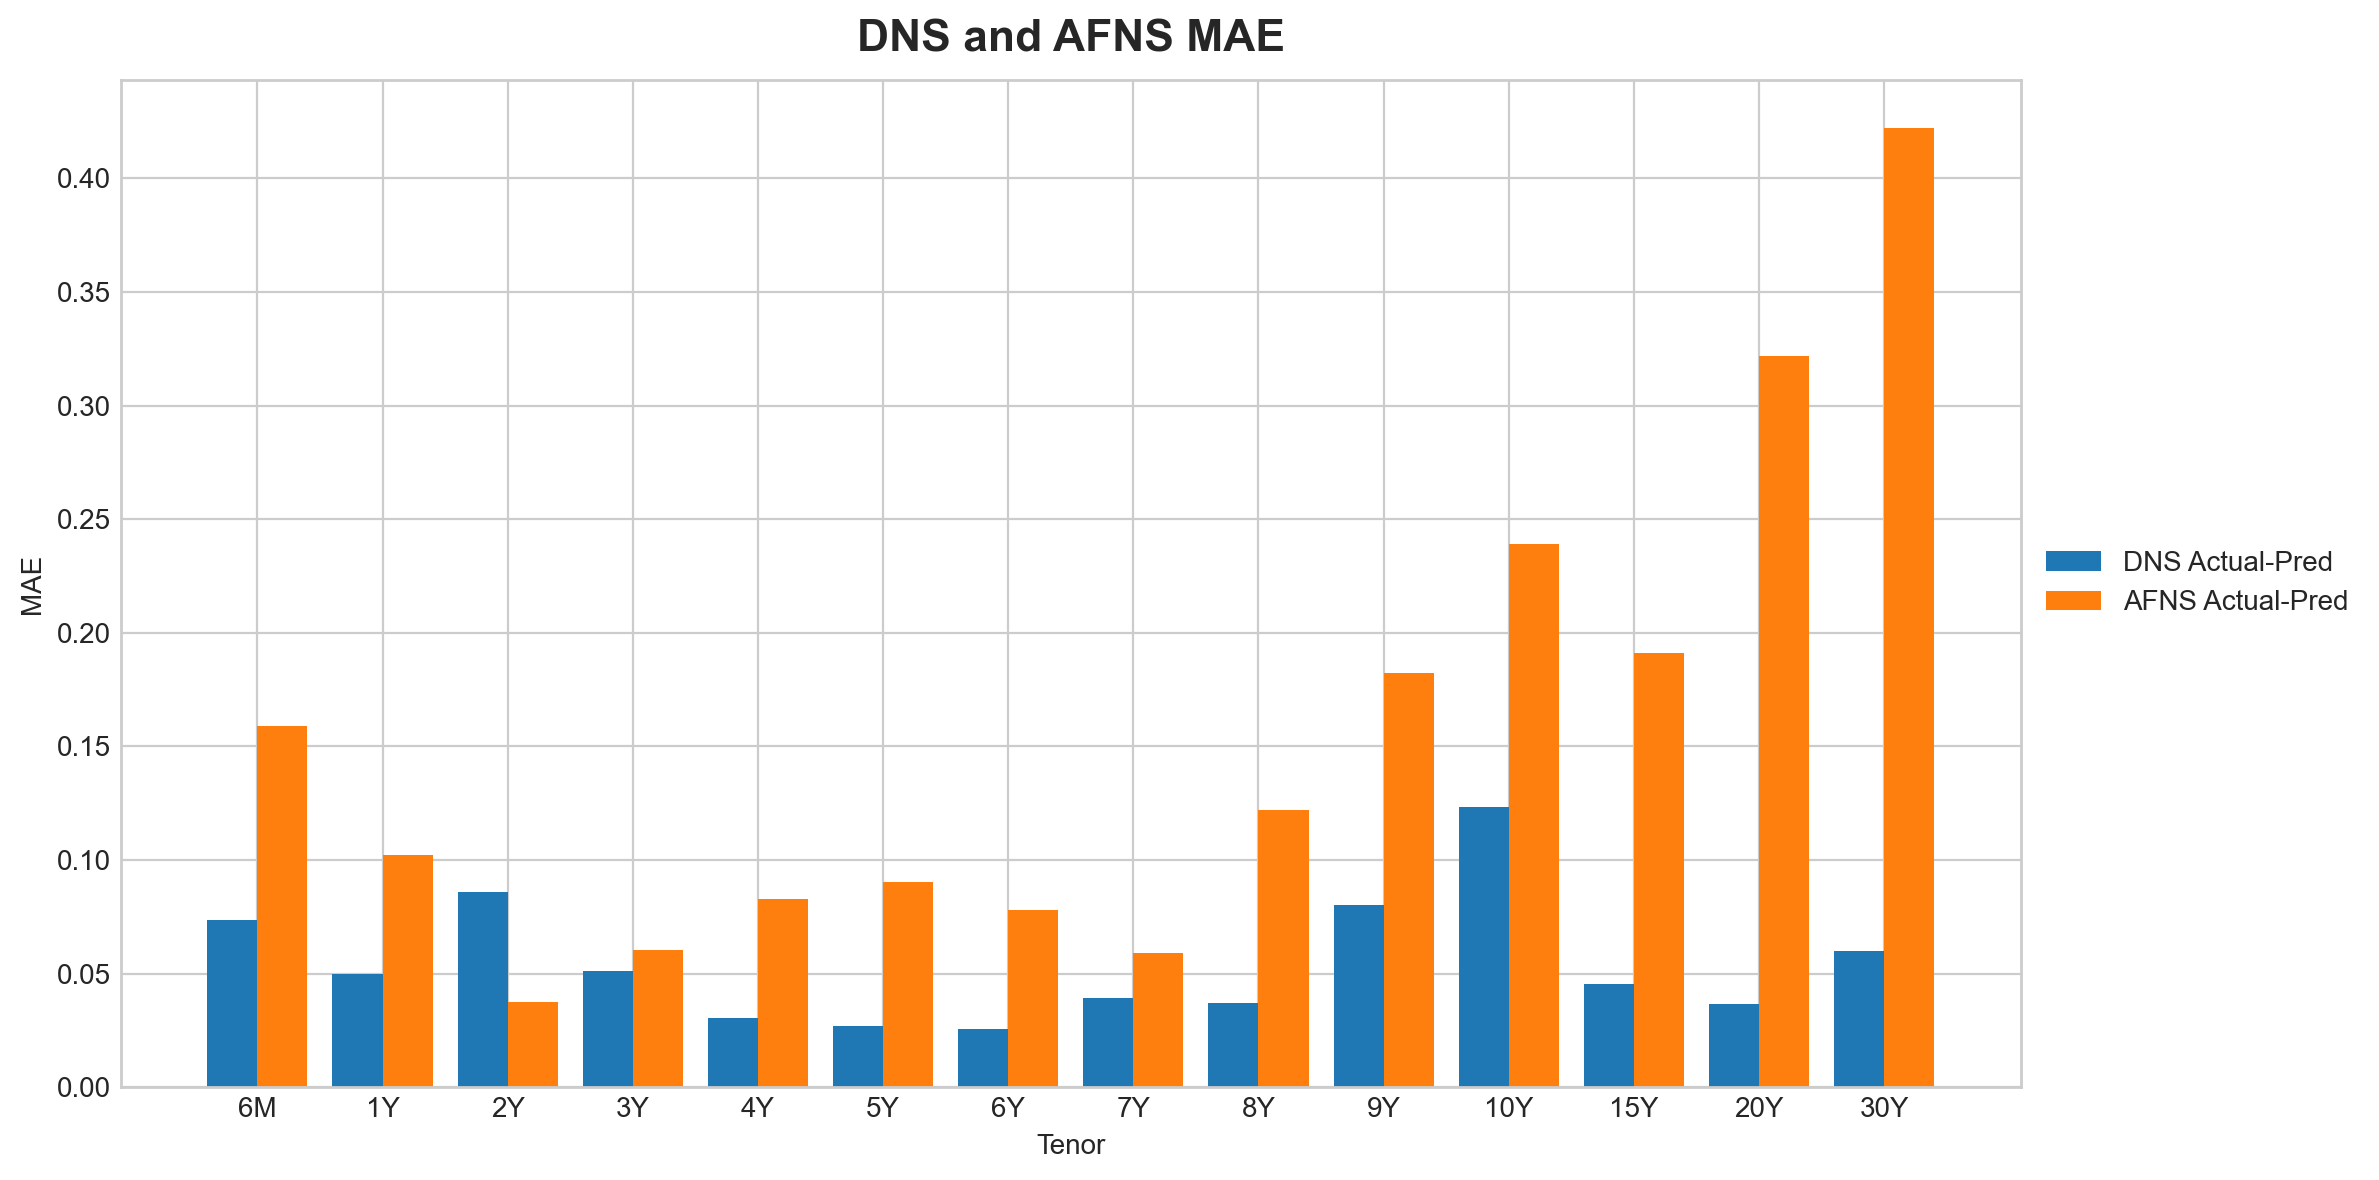

In [63]:
label="MAE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], ml_mae_list, label="DNS Actual-Pred", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_mae_list, label="AFNS Actual-Pred", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("DNS and AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

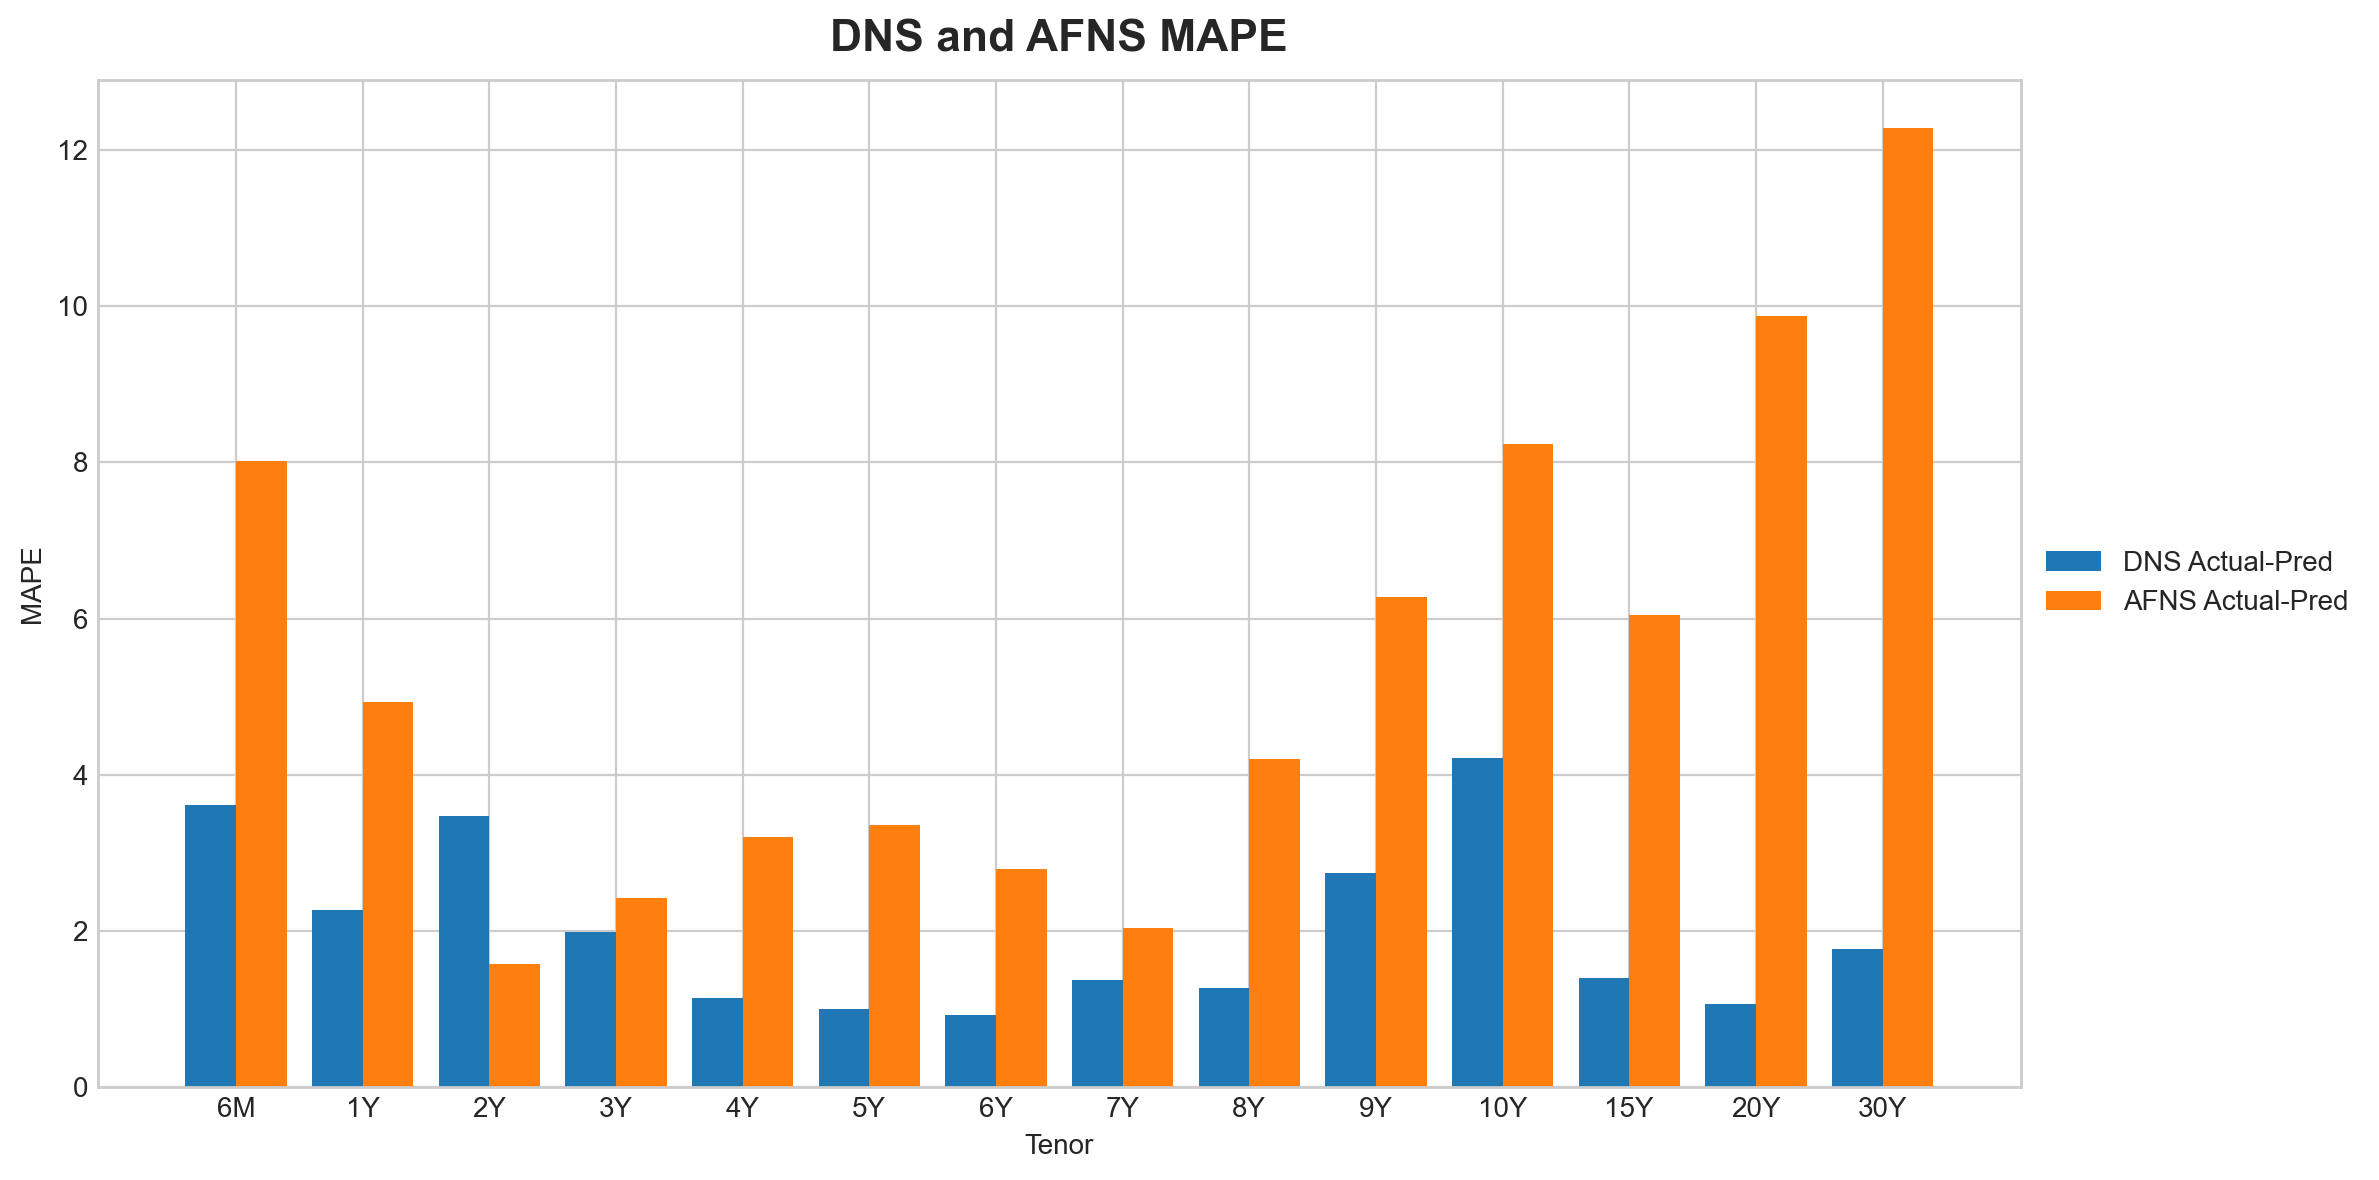

In [64]:
label="MAPE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], ml_mape_list, label="DNS Actual-Pred", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_mape_list, label="AFNS Actual-Pred", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("DNS and AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

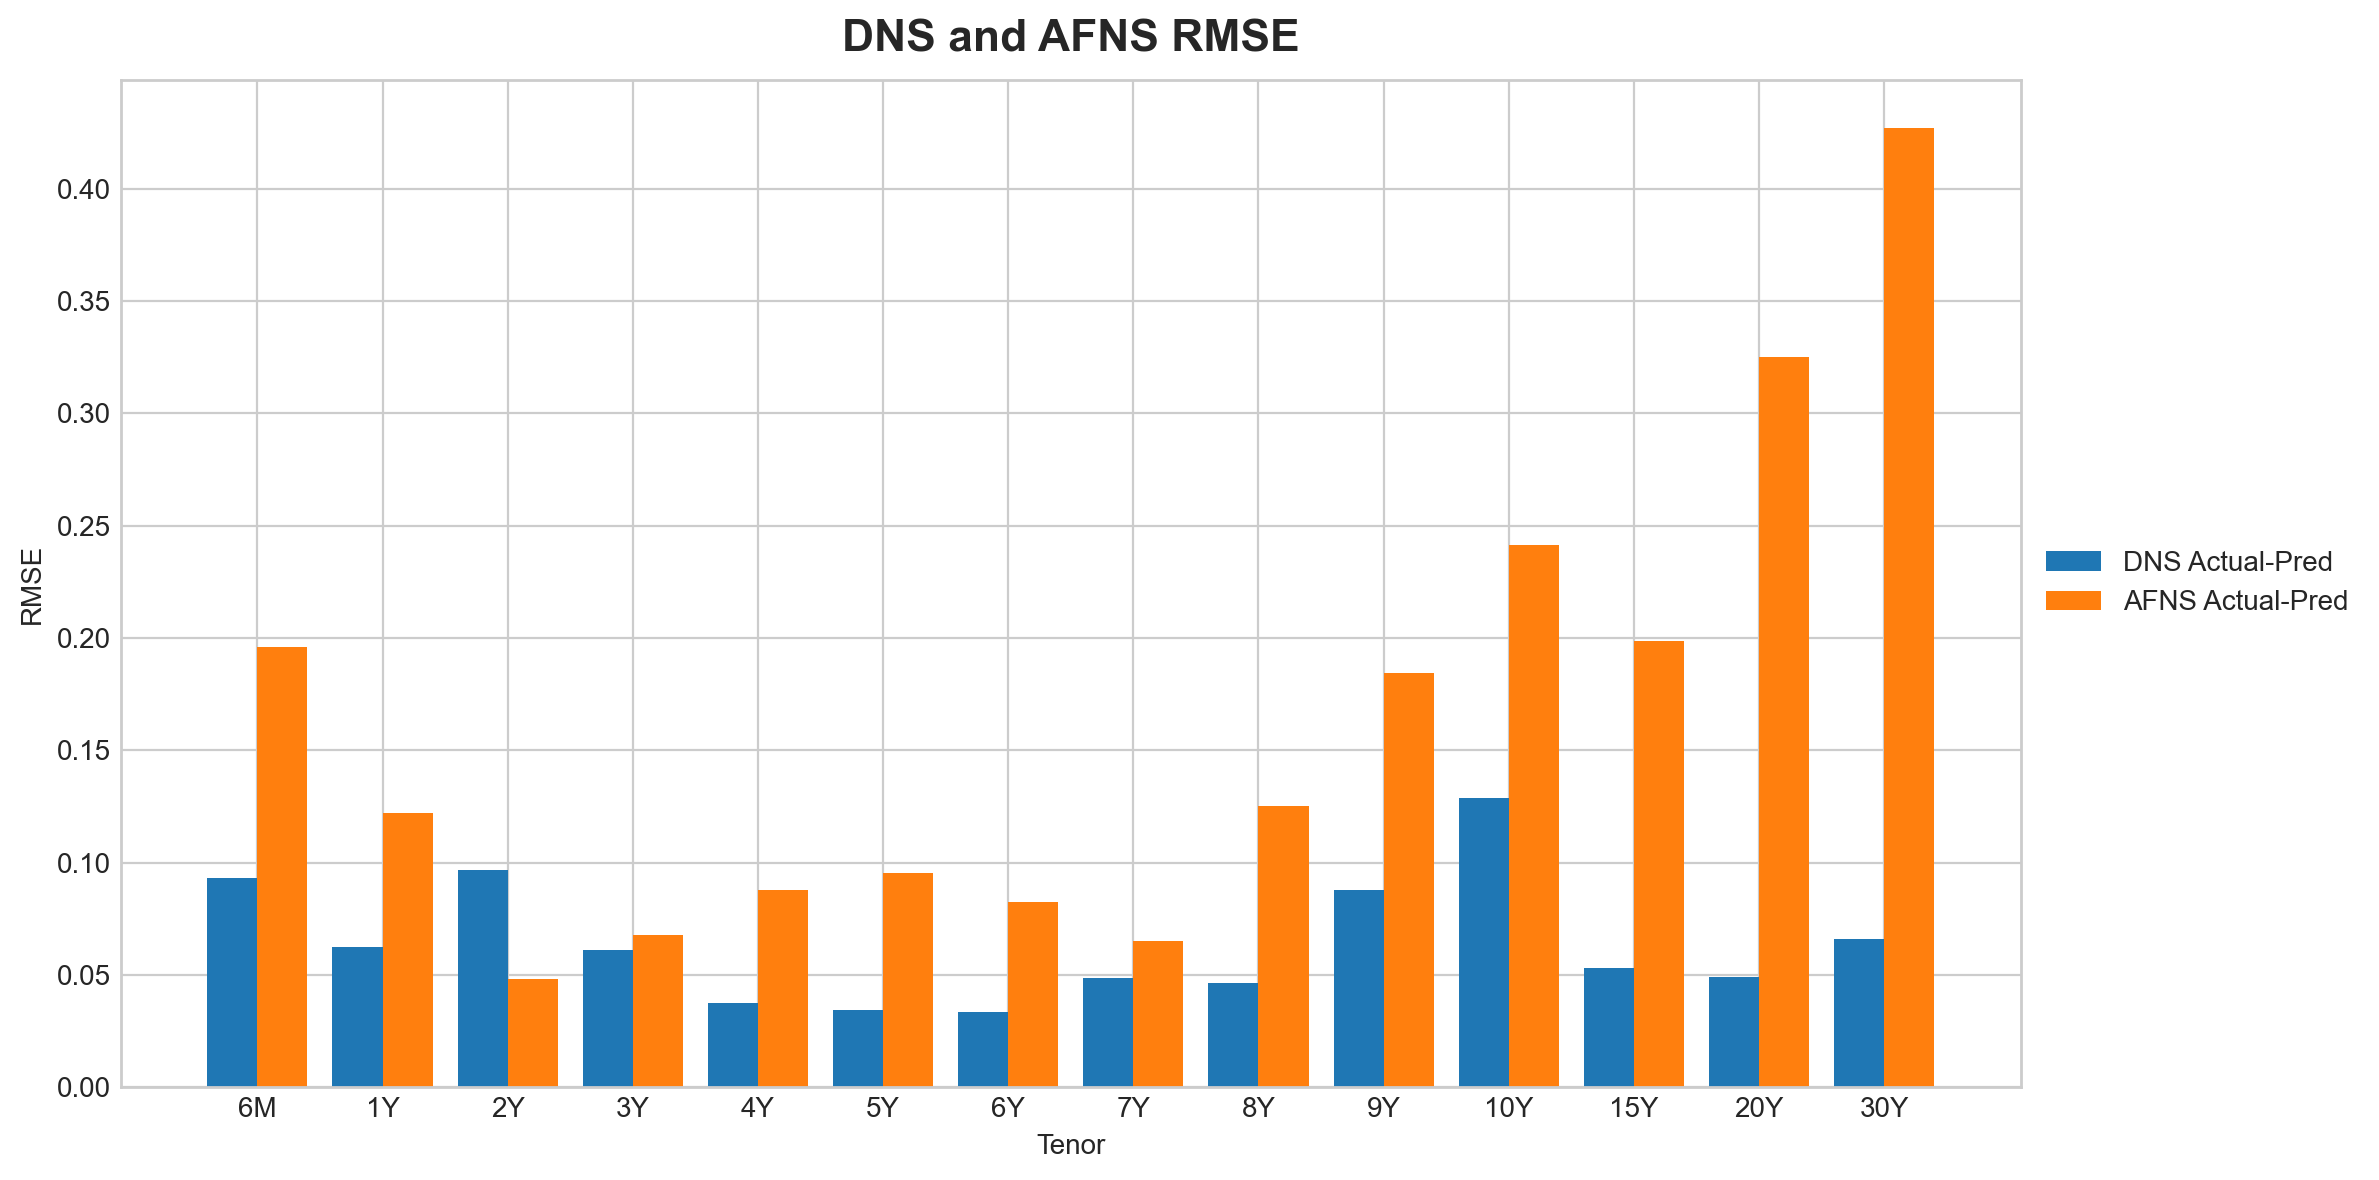

In [65]:
label="RMSE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], ml_rmse_list, label="DNS Actual-Pred", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_rmse_list, label="AFNS Actual-Pred", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("DNS and AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## 比较DNS跟AFNS 预测效果-用统计模型

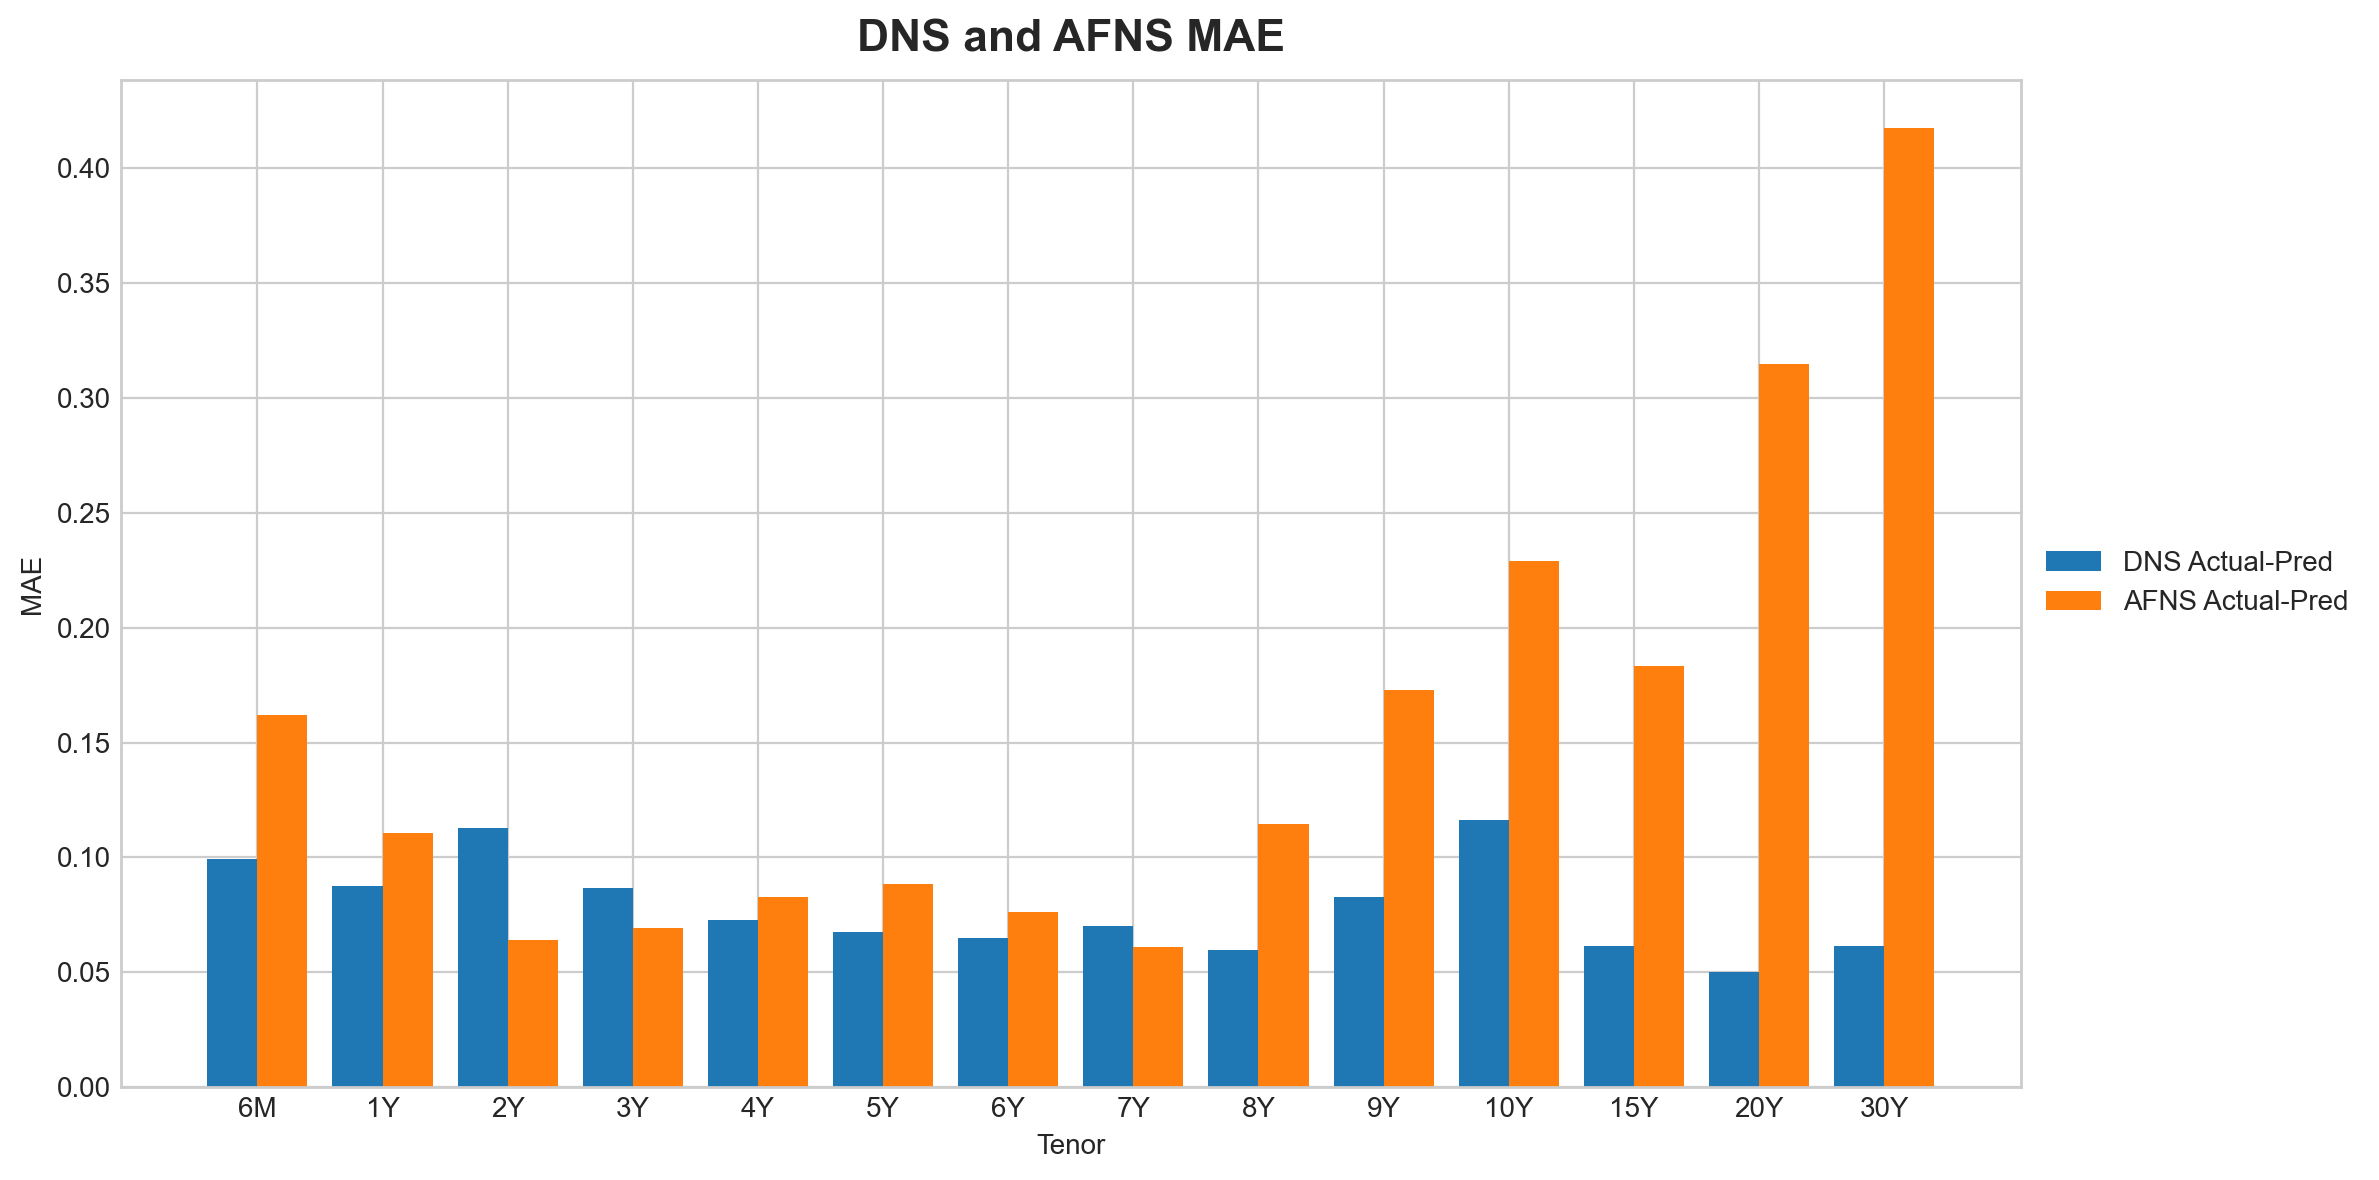

In [68]:
label="MAE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], stats_mae_list, label="DNS Actual-Pred", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_stats_mae_list, label="AFNS Actual-Pred", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("DNS and AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

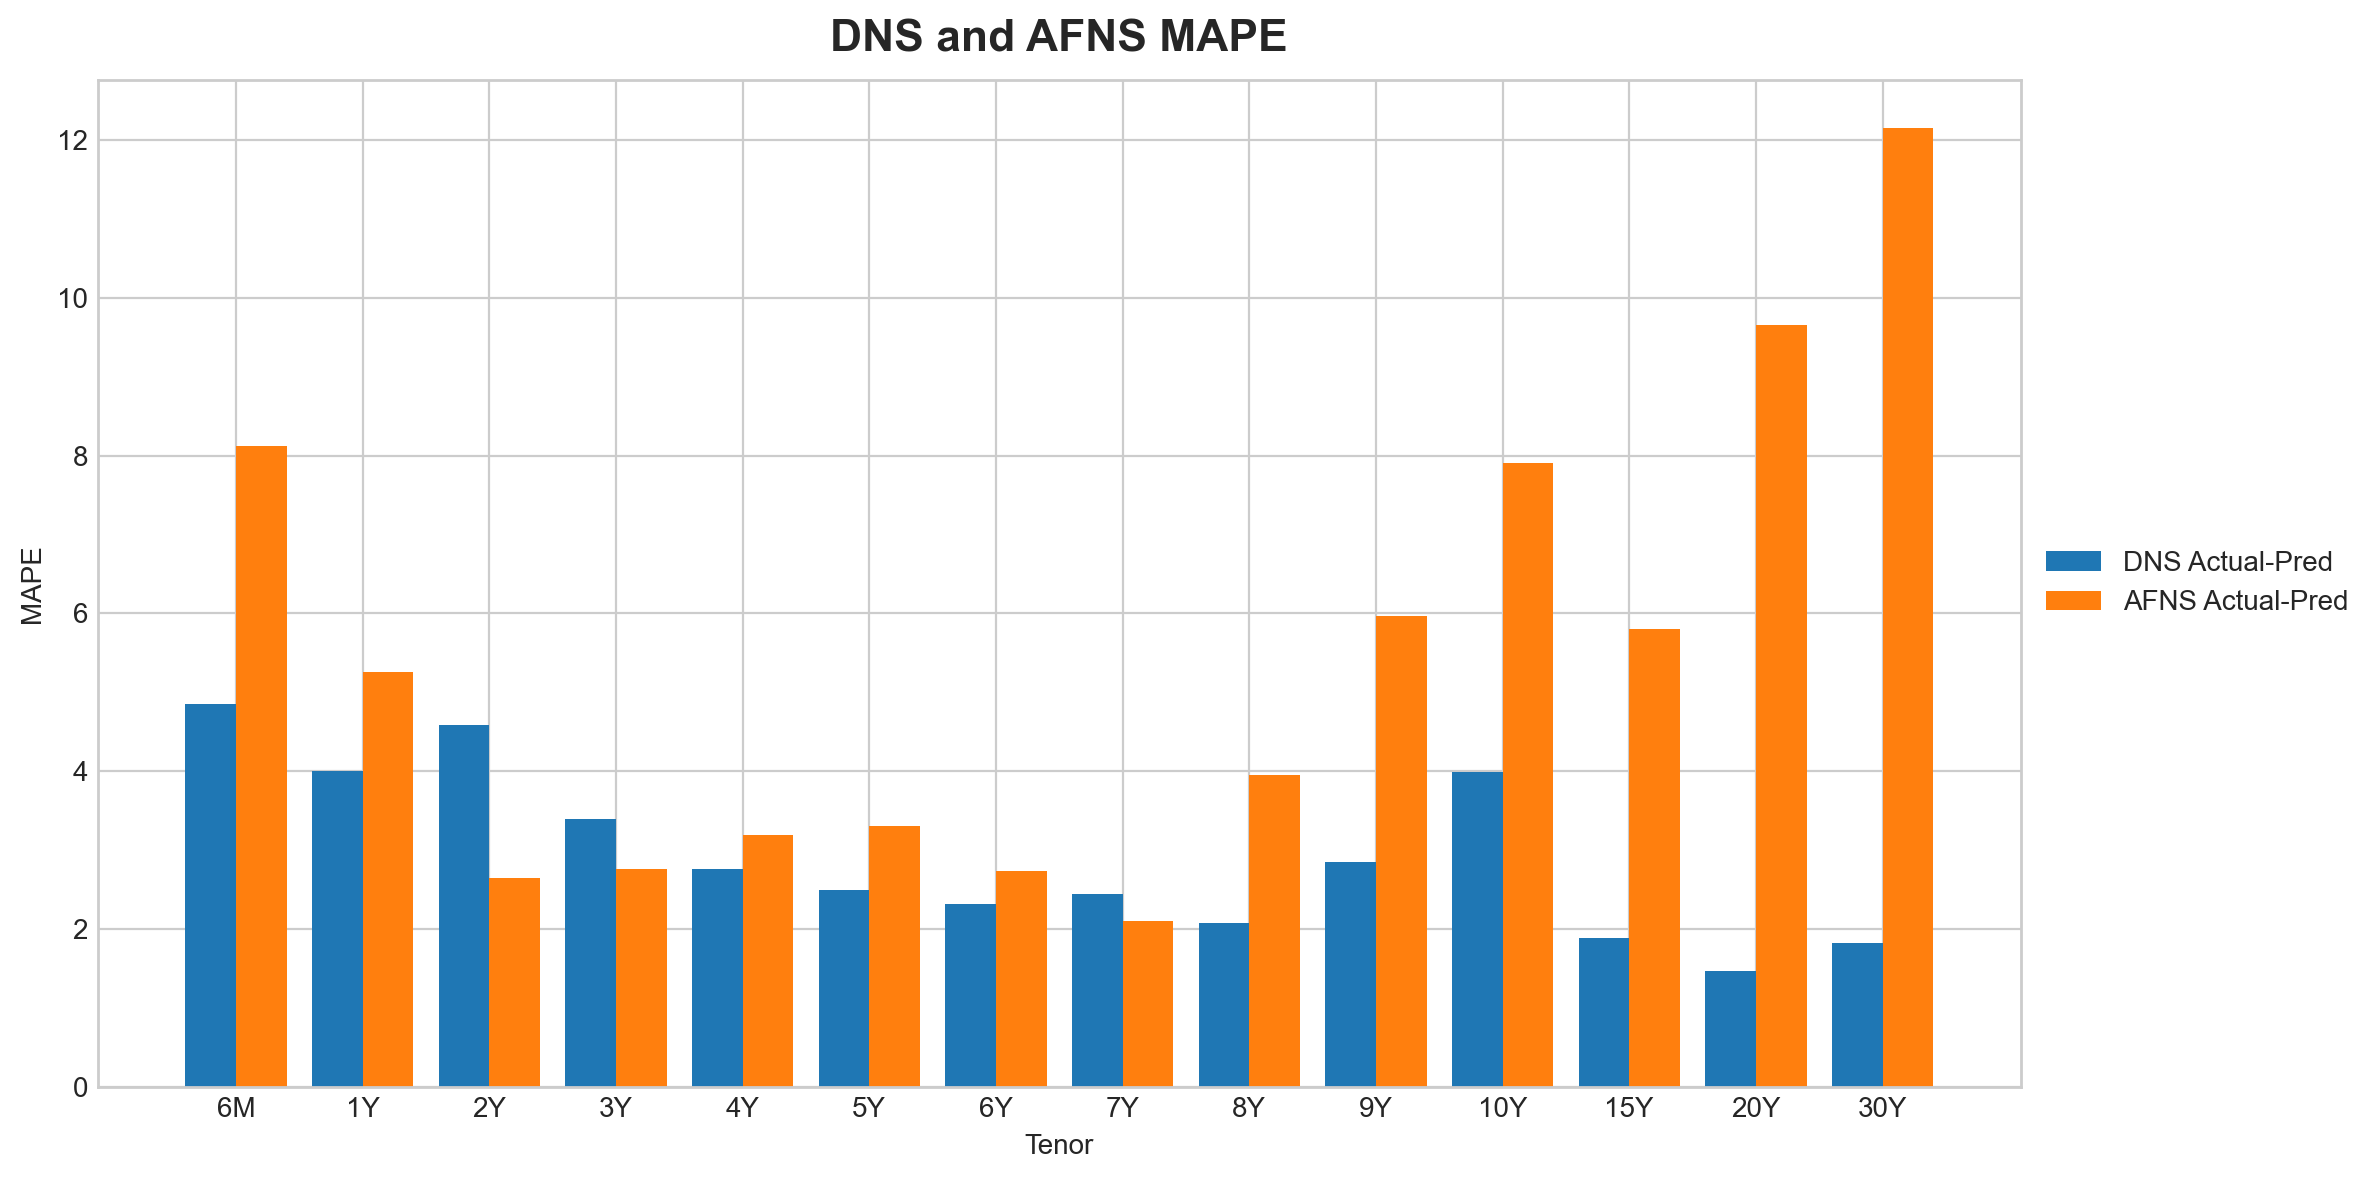

In [69]:
label="MAPE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], stats_mape_list, label="DNS Actual-Pred", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_stats_mape_list, label="AFNS Actual-Pred", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("DNS and AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

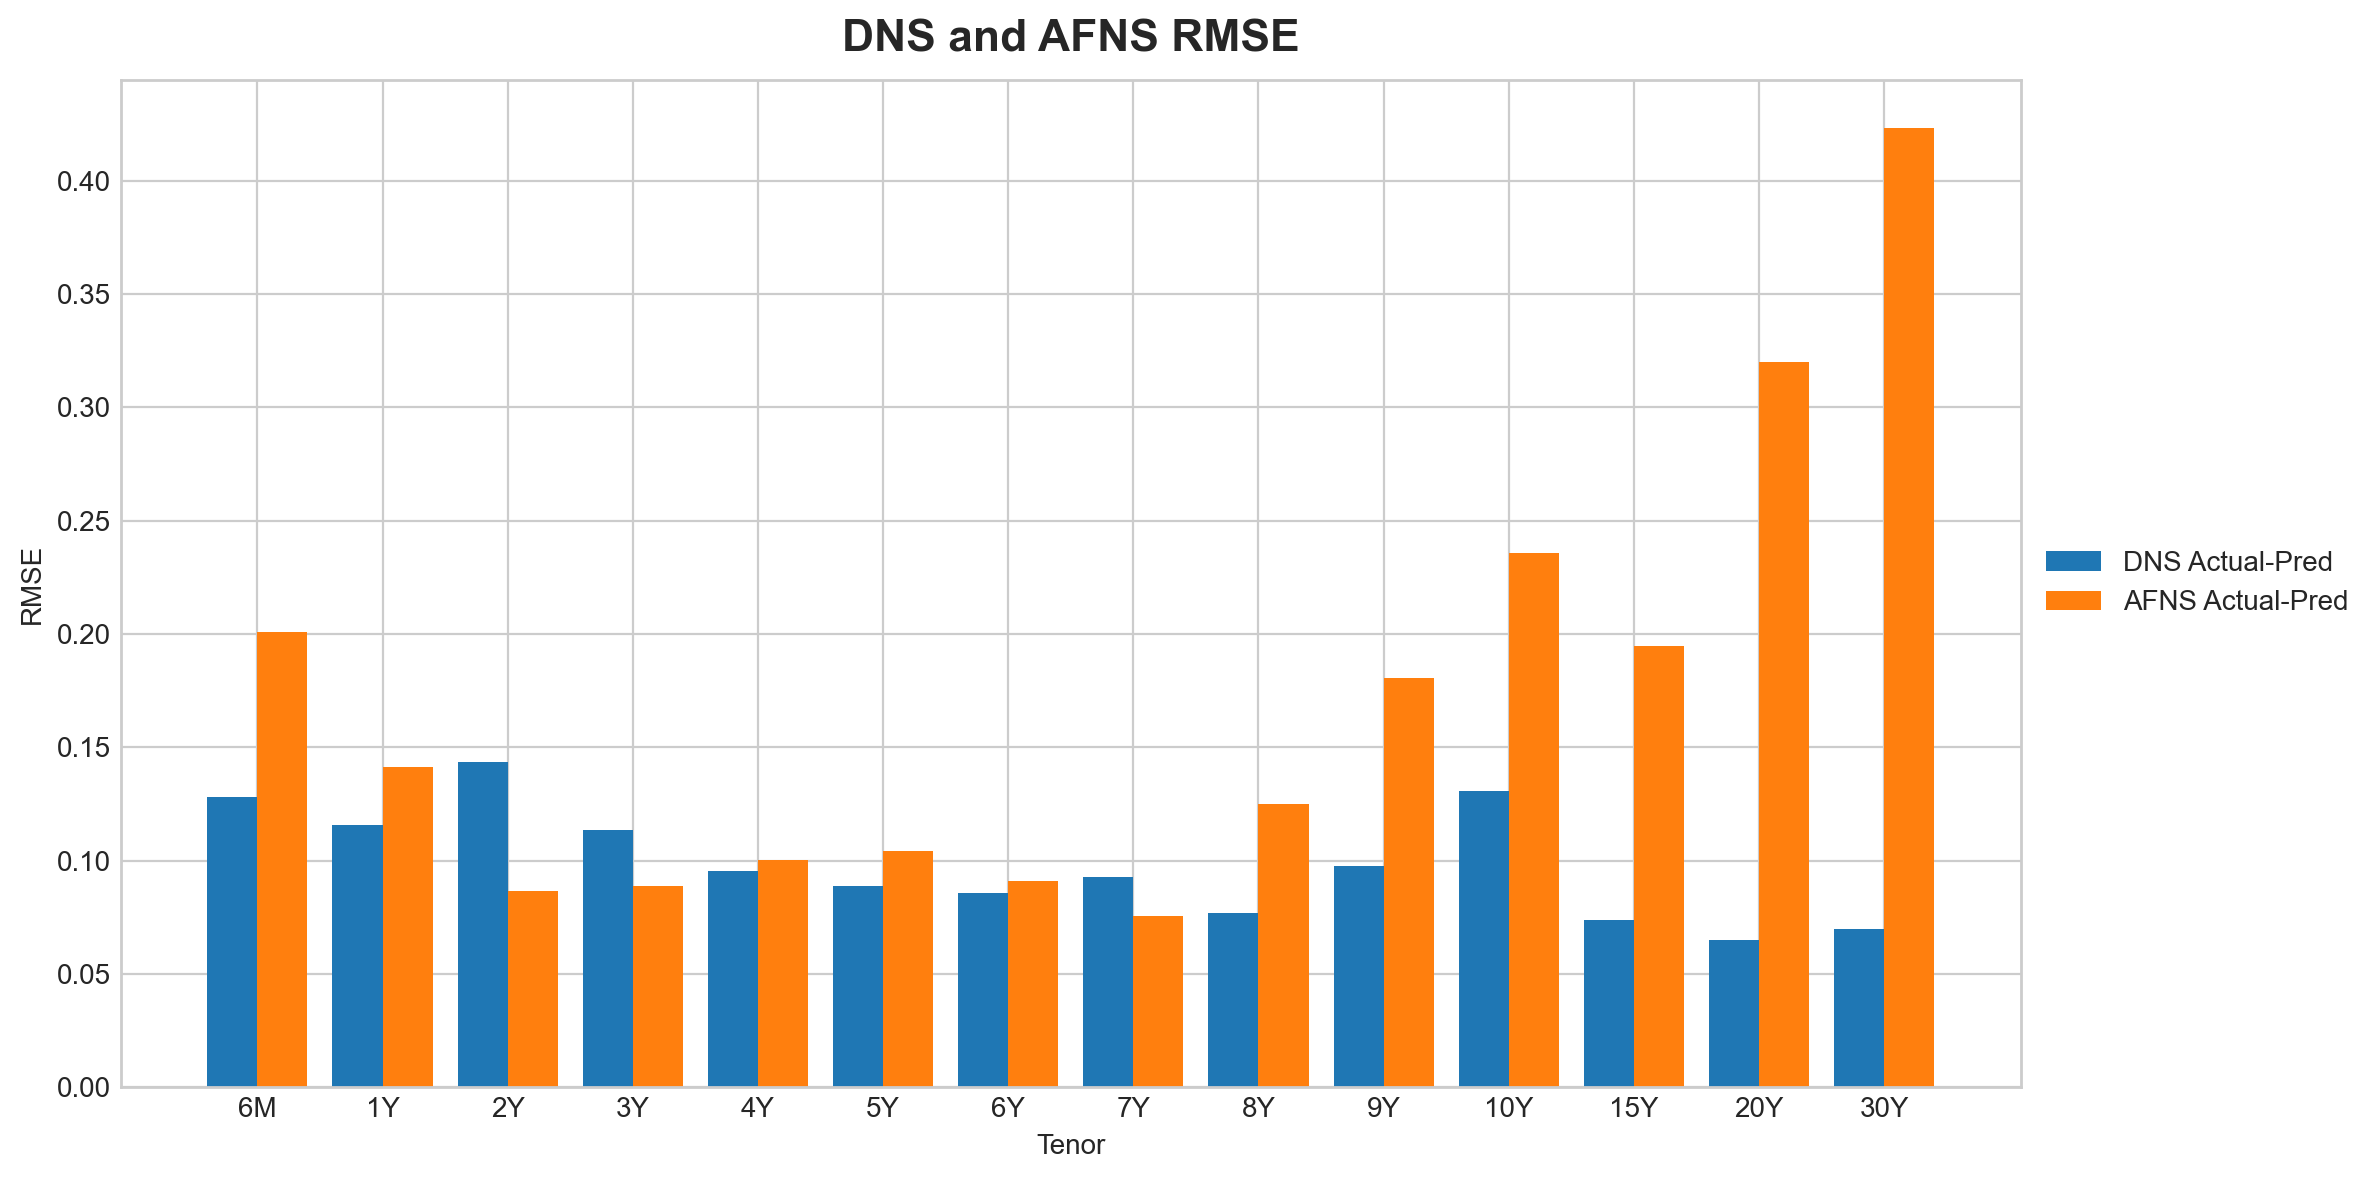

In [70]:
label="RMSE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], stats_rmse_list, label="DNS Actual-Pred", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_stats_rmse_list, label="AFNS Actual-Pred", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("DNS and AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [75]:
# 保存数据

tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']
error_list = ['MAE', 'MAPE', 'RMSE']

DNS_ARIMA_list = []
for i in range(len(tenor_list)):
    temp_list = [stats_mae_list[i], stats_mape_list[i], stats_rmse_list[i]]
    DNS_ARIMA_list = DNS_ARIMA_list + temp_list

DNS_ML_list = []
for i in range(len(tenor_list)):
    temp_list = [ml_mae_list[i], ml_mape_list[i], ml_rmse_list[i]]
    DNS_ML_list = DNS_ML_list + temp_list

AFNS_ARIMA_list = []
for i in range(len(tenor_list)):
    temp_list = [afns_stats_mae_list[i], afns_stats_mape_list[i], afns_stats_rmse_list[i]]
    AFNS_ARIMA_list = AFNS_ARIMA_list + temp_list
    
AFNS_ML_list = []
for i in range(len(tenor_list)):
    temp_list = [afns_ml_mae_list[i], afns_ml_mape_list[i], afns_ml_rmse_list[i]]
    AFNS_ML_list = AFNS_ML_list + temp_list

result_df = pd.DataFrame()
result_df['DNS_ARIMA'] = DNS_ARIMA_list
result_df['DNS_ML'] = DNS_ML_list
result_df['AFNS_ARIMA'] = AFNS_ARIMA_list
result_df['AFNS_ML'] = AFNS_ML_list
result_df

,DNS_ARIMA,DNS_ML,AFNS_ARIMA,AFNS_ML
0,0.099240,0.073776,0.161861,0.159060
1,4.856219,3.615222,8.126032,8.021007
2,0.128182,0.092998,0.200704,0.195934
3,0.087768,0.050004,0.110605,0.102331
4,4.003037,2.274621,5.258341,4.926437
5,0.115573,0.062392,0.141401,0.122221
6,0.112793,0.085720,0.064248,0.037288
7,4.588652,3.474266,2.651137,1.575433
8,0.143474,0.096542,0.086402,0.048102
9,0.086765,0.051323,0.069456,0.060492
